# <font color='#E8800A'>Newland, the City of the Future<a class="anchor"><a id='Newland'></a></b><br>

**Group08 members:** <br>
Carolina Pina - R20170790<br>
Mariana Camarneiro - R20170744<br>
Matilde Pires - R20170783<br>
Rui Monteiro - R20170796<br>
Vasco Pestana - R20170803<br>

**MSc:** Data Science and Advanced Analytics - Nova IMS <br>
**Course:** Machine Learning <br>
2020/2021

## Introduction
In 2048, mission “Newland” had a major goal: send spaceships with thousands of humans to a habitable planet, found some years earlier, as life on Earth was becoming infeasible. The citizens were segregated into three groups: Group A had volunteers, Group B had important people that were paid by the State to participate, and Group C had people who paid to go. 

On the new planet, some citizens had incomes that were higher than average, so they started to pay taxes to the Government, which intends to create a predictive model that classifies new residents as someone who has “income higher than average” or “income lower or equal to the average”. 

This study aims to develop that model, which should get the best possible performance on a test dataset, by implementing binary classification on 10 100 unseen records. To implement this, several predictive models will be tested, in order to assess their performance and pick the best one. Furthermore, those models will be analysed against 4 slightly different datasets, considering different approaches to deal with the data, as will be explained.  

The training dataset is composed of 22 400 observations. The target variable is Income and equals 1 if a specific local has an income higher than the average, and 0 if it is lower or equal to the average. The datasets are mainly composed of socio-economic features, that range from general basic information about the participants (Name, Birthday, Native Continent, Marital Status, Education Level and Years of Education), to specific information about them in the experiment: Citizen ID, Lives With, Base Area, Employment Sector, Role, Working Hours per Week, Money Received and Ticket Price.  

## Setup Environment
To run this Notebook without issues, the user should either fork and clone our **GitHub repository** available at https://github.com/VascoPestana/ml_2020, or put this Notebook on a folder, with a "Data Folder" inside it, that includes the Train and Test datasets.

Furthermore, the user needs an Anaconda environment with all the used libraries. A yml file is provided on our GitHub repository (link above) for that purpose. The user can **create the environment** with the group08.yml file, by following these steps: <br>
1. Put the yml file on a folder or even on the Desktop
2. Open Anaconda Navigator
3. Go to "Environments"
4. Click on "Import"
5. Name the new environment on "Name", and find the path to your file on "Specification File" (you may need to specify you want to search for txt files on the "Import Environment" box)
6. Click on "Import" so that Anaconda starts loading all the packages
7. Finally, navigate to the new environment on "Home" and launch Jupyter Notebook

As an alternative for creating the environment, if the user already has the most "common" libraries (i.e. pandas, numpy, seaborn, sklearn, etc) on his/her own environment, the next code cell can also be uncommented, in order to pip install the "extra" libraries: mlxtend and imbalanced-learn.

In [1]:
# pip install mlxtend
# pip install -U imbalanced-learn

## Notebook's Structure
**The user does not need to run the entirety of this Notebook at once.** The best approach was our baseline model, which is on the "Baseline" and "First Baseline Models" hyperlinks at the top of the Notebook. Those are the most important models to run. The other approaches were tests, to see if we could improve the performance of our predictive model, which did not actually happen. These approaches are described in more detail on the report of our Project.

It is also important to say that the "Data Exploration and pre-processing" phase is common to all approaches.

## Importing Packages and Data

In [2]:
# Note: The predictive algorithm's functions are imported on the Predictive Modelling section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import ceil
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn import preprocessing
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.preprocessing import RobustScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics.cluster import normalized_mutual_info_score
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split

# For better resolution plots
%config InlineBackend.figure_format = 'retina'

# Setting seaborn style
sns.set()

# To filter warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Get the dataset and check its first rows
df_train = pd.read_excel(r'Data Folder/Train.xlsx')
df_train.head()

CITIZEN_ID                  Name          Birthday Native Continent  \
0       12486       Mr. Adam Glover       July 1,2003           Europe   
1       12487  Mr. Cameron McDonald   January 25,2006           Europe   
2       12488    Mr. Keith Davidson       May 10,2009           Europe   
3       12489    Mr. Alexander Gill     March 25,1985           Europe   
4       12490        Mr. Neil Piper       May 29,2015           Europe   

  Marital Status    Lives with  Base Area               Education Level  \
0        Married          Wife  Northbury  High School + PostGraduation   
1        Married          Wife  Northbury           Professional School   
2        Married          Wife  Northbury           Professional School   
3        Married          Wife  Northbury       High School - 2nd Cycle   
4         Single  Other Family  Northbury                           PhD   

   Years of Education           Employment Sector                    Role  \
0                  13  Private Sector - Services   Repair & constructions   
1                  12      Public Sector - Others  Repair & constructions   
2                  12  Private Sector - Services                    Sales   
3                  11  Private Sector - Services                 Security   
4                  21  Self-Employed (Individual)               Professor   

   Working Hours per week  Money Received  Ticket Price  Income  
0                      40               0          2273       1  
1                      40               0             0       1  
2                      46               0          2321       1  
3                      37            5395             0       1  
4                      45               0             0       1

In [5]:
df_test = pd.read_excel(r'Data Folder/Test.xlsx')

# <font color='#E8800A'>Data Exploration and Pre-processing</font> <a class="anchor" id="first-bullet"></a>
  [Back to Newland](#Newland)

In [6]:
# Checking data types and nulls in the dataset --> there are no NaNs
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
dtypes:

In [7]:
# Birthday is type object, so we're transforming it to type datetime
# For that we must first fix the problem of having February 29 for non-leap years --> turn all February 29 to February 28

# Note: This change will make it possible to transform the column type to datetime, without clearly influencing the age of
# the citizens.
df_train['Birthday'] = df_train['Birthday'].map(lambda x: x.replace("February 29", "February 28"))

# Check if the replacement worked
df_train['Birthday'][df_train['Birthday'].str.contains("February 29")]

Series([], Name: Birthday, dtype: object)

In [8]:
# Change the format the date appears and the data type to datetime
df_train['Birthday'] = df_train['Birthday'].map(lambda x: datetime.strptime(x, " %B %d,%Y").date())
df_train['Birthday'] = pd.to_datetime(df_train['Birthday'])

In [9]:
# Same for the test dataset
df_test['Birthday'] = df_test['Birthday'].map(lambda x: x.replace("February 29", "February 28"))
df_test['Birthday'] = df_test['Birthday'].map(lambda x: datetime.strptime(x, " %B %d,%Y").date())
df_test['Birthday'] = pd.to_datetime(df_test['Birthday'])

In [10]:
# Get a descriptive overview of the variables (both metric and non-metric)
df_train.describe(include="all")

CITIZEN_ID            Name             Birthday Native Continent  \
count   22400.000000           22400                22400            22400   
unique           NaN           16074                11229                5   
top              NaN  Mr. Paul Nolan  2025-08-15 00:00:00           Europe   
freq             NaN               4                    9            19111   
first            NaN             NaN  1958-01-01 00:00:00              NaN   
last             NaN             NaN  2031-10-11 00:00:00              NaN   
mean    23685.500000             NaN                  NaN              NaN   
std      6466.467351             NaN                  NaN              NaN   
min     12486.000000             NaN                  NaN              NaN   
25%     18085.750000             NaN                  NaN              NaN   
50%     23685.500000             NaN                  NaN              NaN   
75%     29285.250000             NaN                  NaN              NaN   
max     34885.000000             NaN                  NaN              NaN   

       Marital Status Lives with  Base Area      Education Level  \
count           22400      22400      22400                22400   
unique              7          6         40                   16   
top           Married       Wife  Northbury  Professional School   
freq            10219       9012      20074                 7232   
first             NaN        NaN        NaN                  NaN   
last              NaN        NaN        NaN                  NaN   
mean              NaN        NaN        NaN                  NaN   
std               NaN        NaN        NaN                  NaN   
min               NaN        NaN        NaN                  NaN   
25%               NaN        NaN        NaN                  NaN   
50%               NaN        NaN        NaN                  NaN   
75%               NaN        NaN        NaN                  NaN   
max               NaN        NaN        NaN                  NaN   

        Years of Education           Employment Sector       Role  \
count         22400.000000                       22400      22400   
unique                 NaN                           9         15   
top                    NaN  Private Sector - Services   Professor   
freq                   NaN                       15599       2849   
first                  NaN                         NaN        NaN   
last                   NaN                         NaN        NaN   
mean             13.173884                         NaN        NaN   
std               2.512451                         NaN        NaN   
min               2.000000                         NaN        NaN   
25%              12.000000                         NaN        NaN   
50%              13.000000                         NaN        NaN   
75%              15.000000                         NaN        NaN   
max              21.000000                         NaN        NaN   

        Working Hours per week  Money Received  Ticket Price        Income  
count             22400.000000    22400.000000  22400.000000  22400.000000  
unique                     NaN             NaN           NaN           NaN  
top                        NaN             NaN           NaN           NaN  
freq                       NaN             NaN           NaN           NaN  
first                      NaN             NaN           NaN           NaN  
last                       NaN             NaN           NaN           NaN  
mean                 40.483795     1324.915357    109.145313      0.237098  
std                  12.370921     9227.771813    500.208904      0.425313  
min                   1.000000        0.000000      0.000000      0.000000  
25%                  40.000000        0.000000      0.000000      0.000000  
50%                  40.000000        0.000000      0.000000      0.000000  
75%                  45.000000        0.000000      0.000000      0.00000

In [11]:
# Define Citizen_ID as the index
df_train.set_index("CITIZEN_ID", inplace=True)

# Define Income variable as the target and remove it from the dataframe with the independent variables
target = df_train['Income']
df_train = df_train.drop(['Income'], axis=1)

# Define metric and non-metric datasets
metric = df_train.loc[:, np.array(df_train.dtypes=="int64")]
non_metric = df_train.loc[:,np.array(df_train.dtypes=="object")]

# Same division for test dataset
metric_test = df_test.loc[:, np.array(df_test.dtypes=="int64")]
non_metric_test = df_test.loc[:,np.array(df_test.dtypes=="object")]

In [12]:
# Get only the year from Birthday, so as to get a better visualization of the values
metric['Birthday'] = df_train.Birthday.map(lambda x: x.year)

# Same for test set
metric_test['Birthday'] = df_test.Birthday.map(lambda x: x.year)

# Remove Name from the list of non_metric variables since that gives us no meaning or valuable information and plotting it 
# would be useless
non_metric.drop(columns="Name", inplace=True)

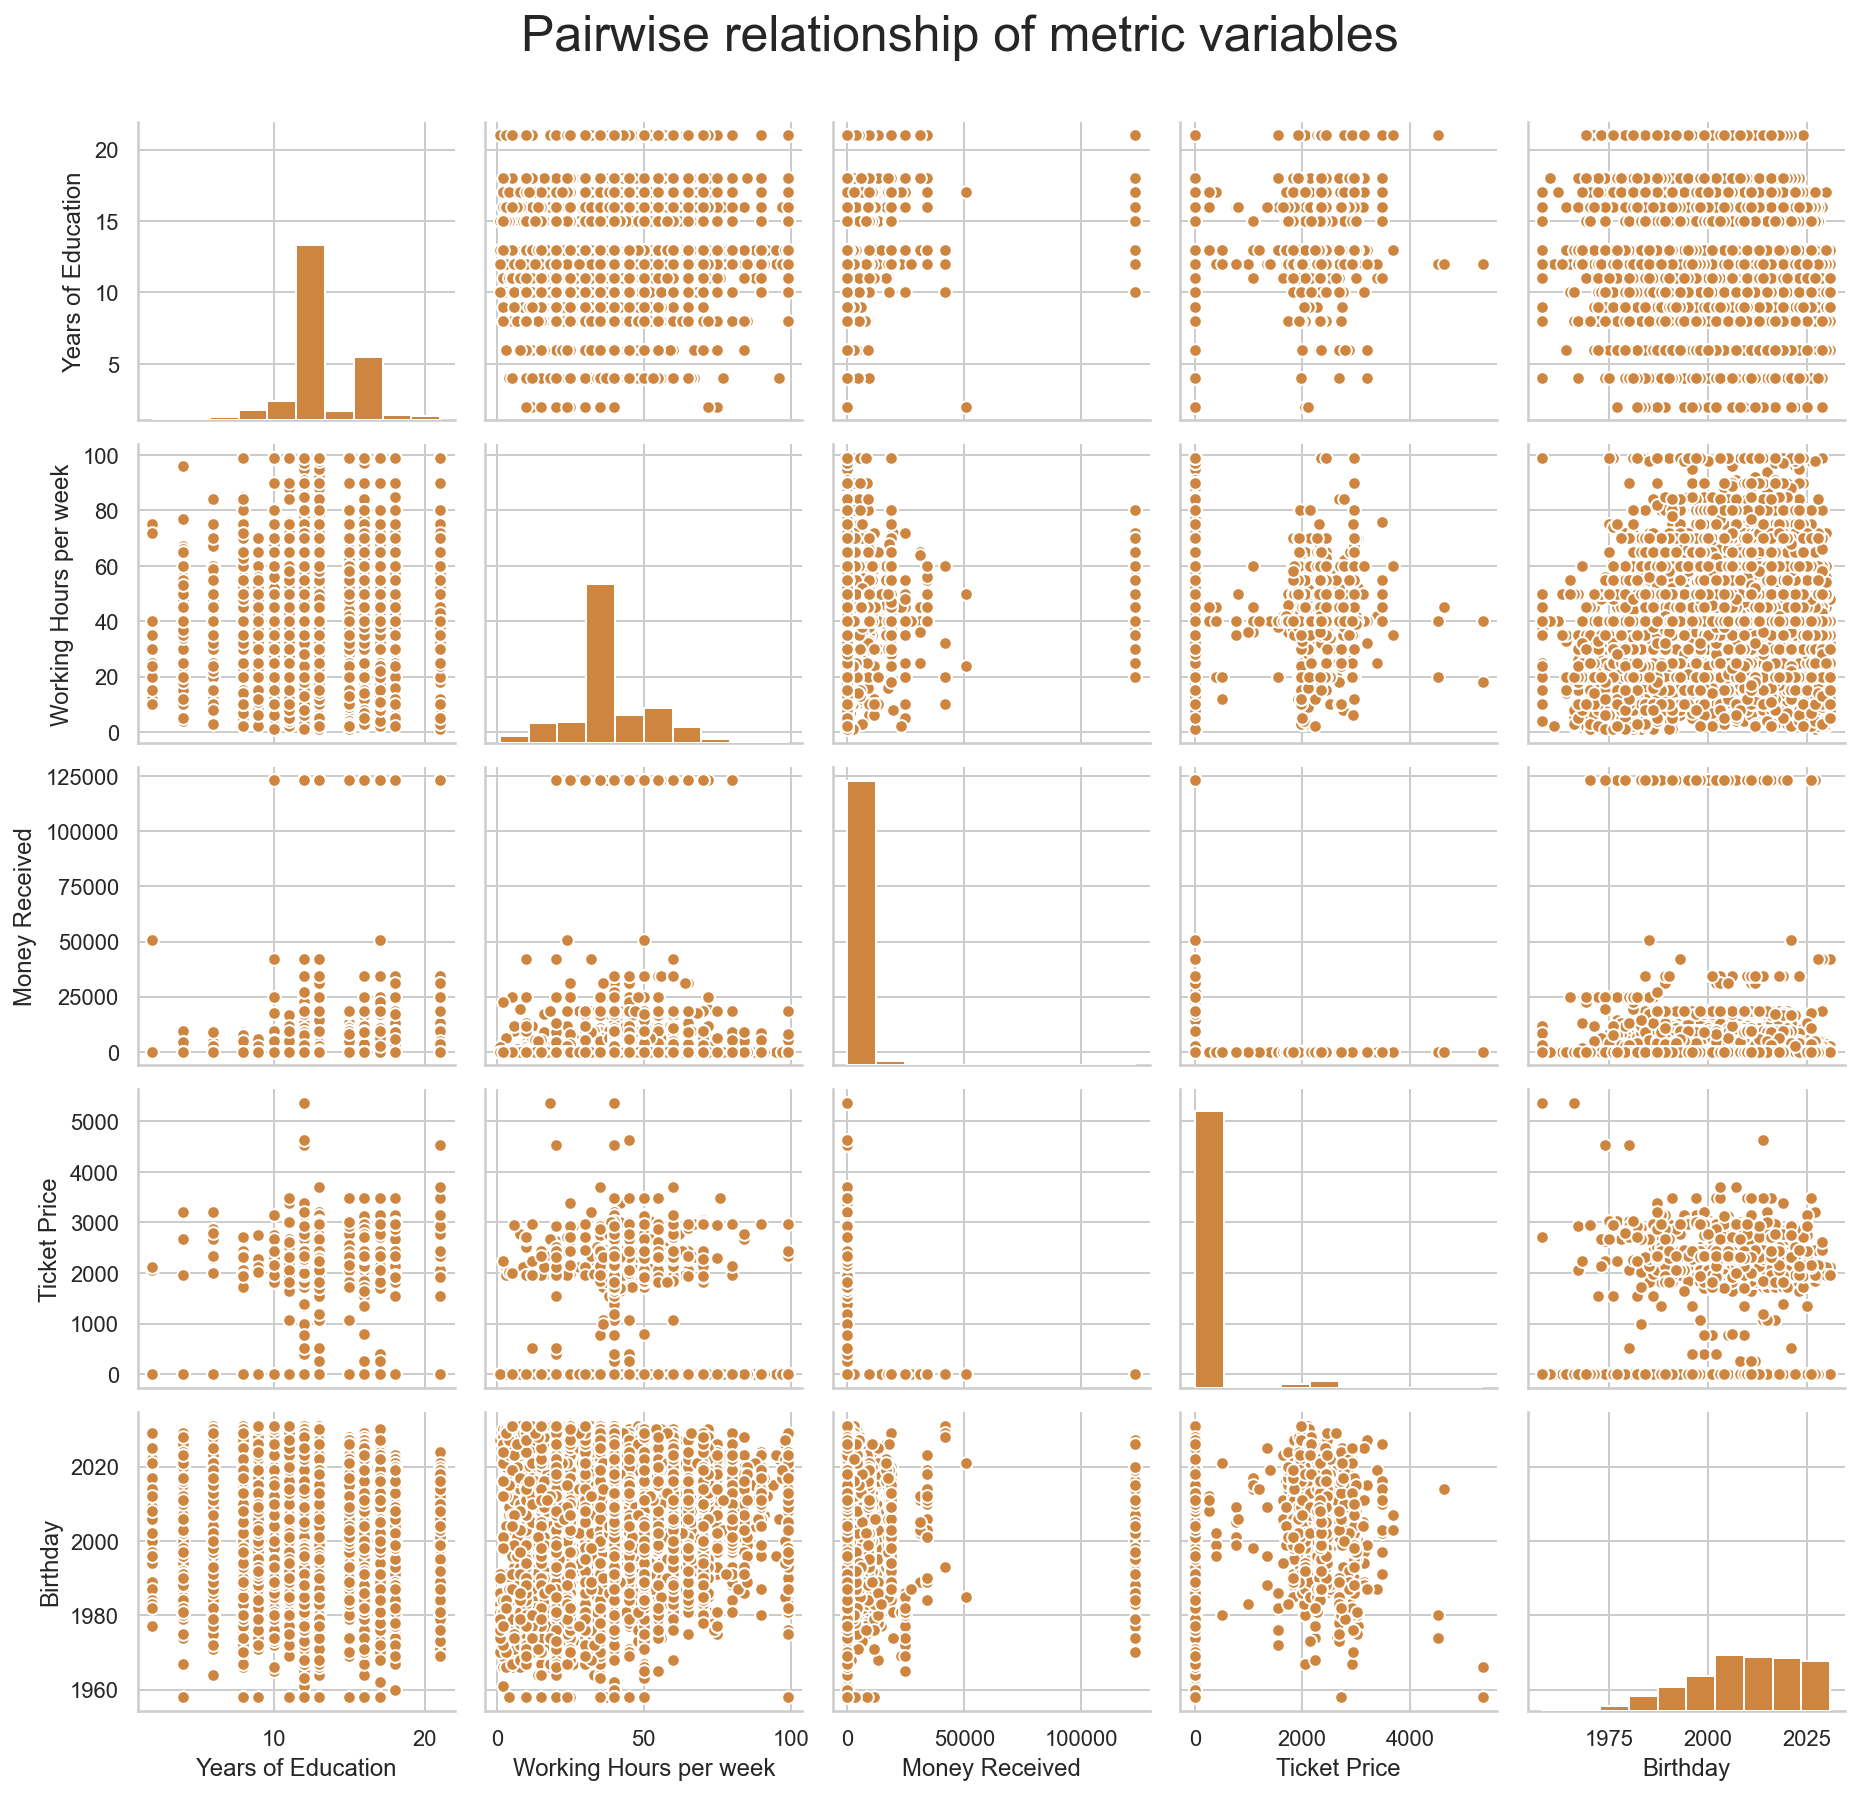

In [13]:
# Checking metrics variables' distribution and pairwise relationship
sns.set(style="whitegrid")

# Setting pairgrid
g = sns.PairGrid(metric)

# Pairgrid
mdg = g.map_diag(plt.hist, edgecolor="w", color="peru")
mog = g.map_offdiag(plt.scatter, edgecolor="w", color="peru", s=40)
  
# Layout
plt.subplots_adjust(top=0.92)
plt.suptitle("Pairwise relationship of metric variables", fontsize=25)

plt.show()

Text(0.5, 0.98, 'Distribution of non-metric variables')

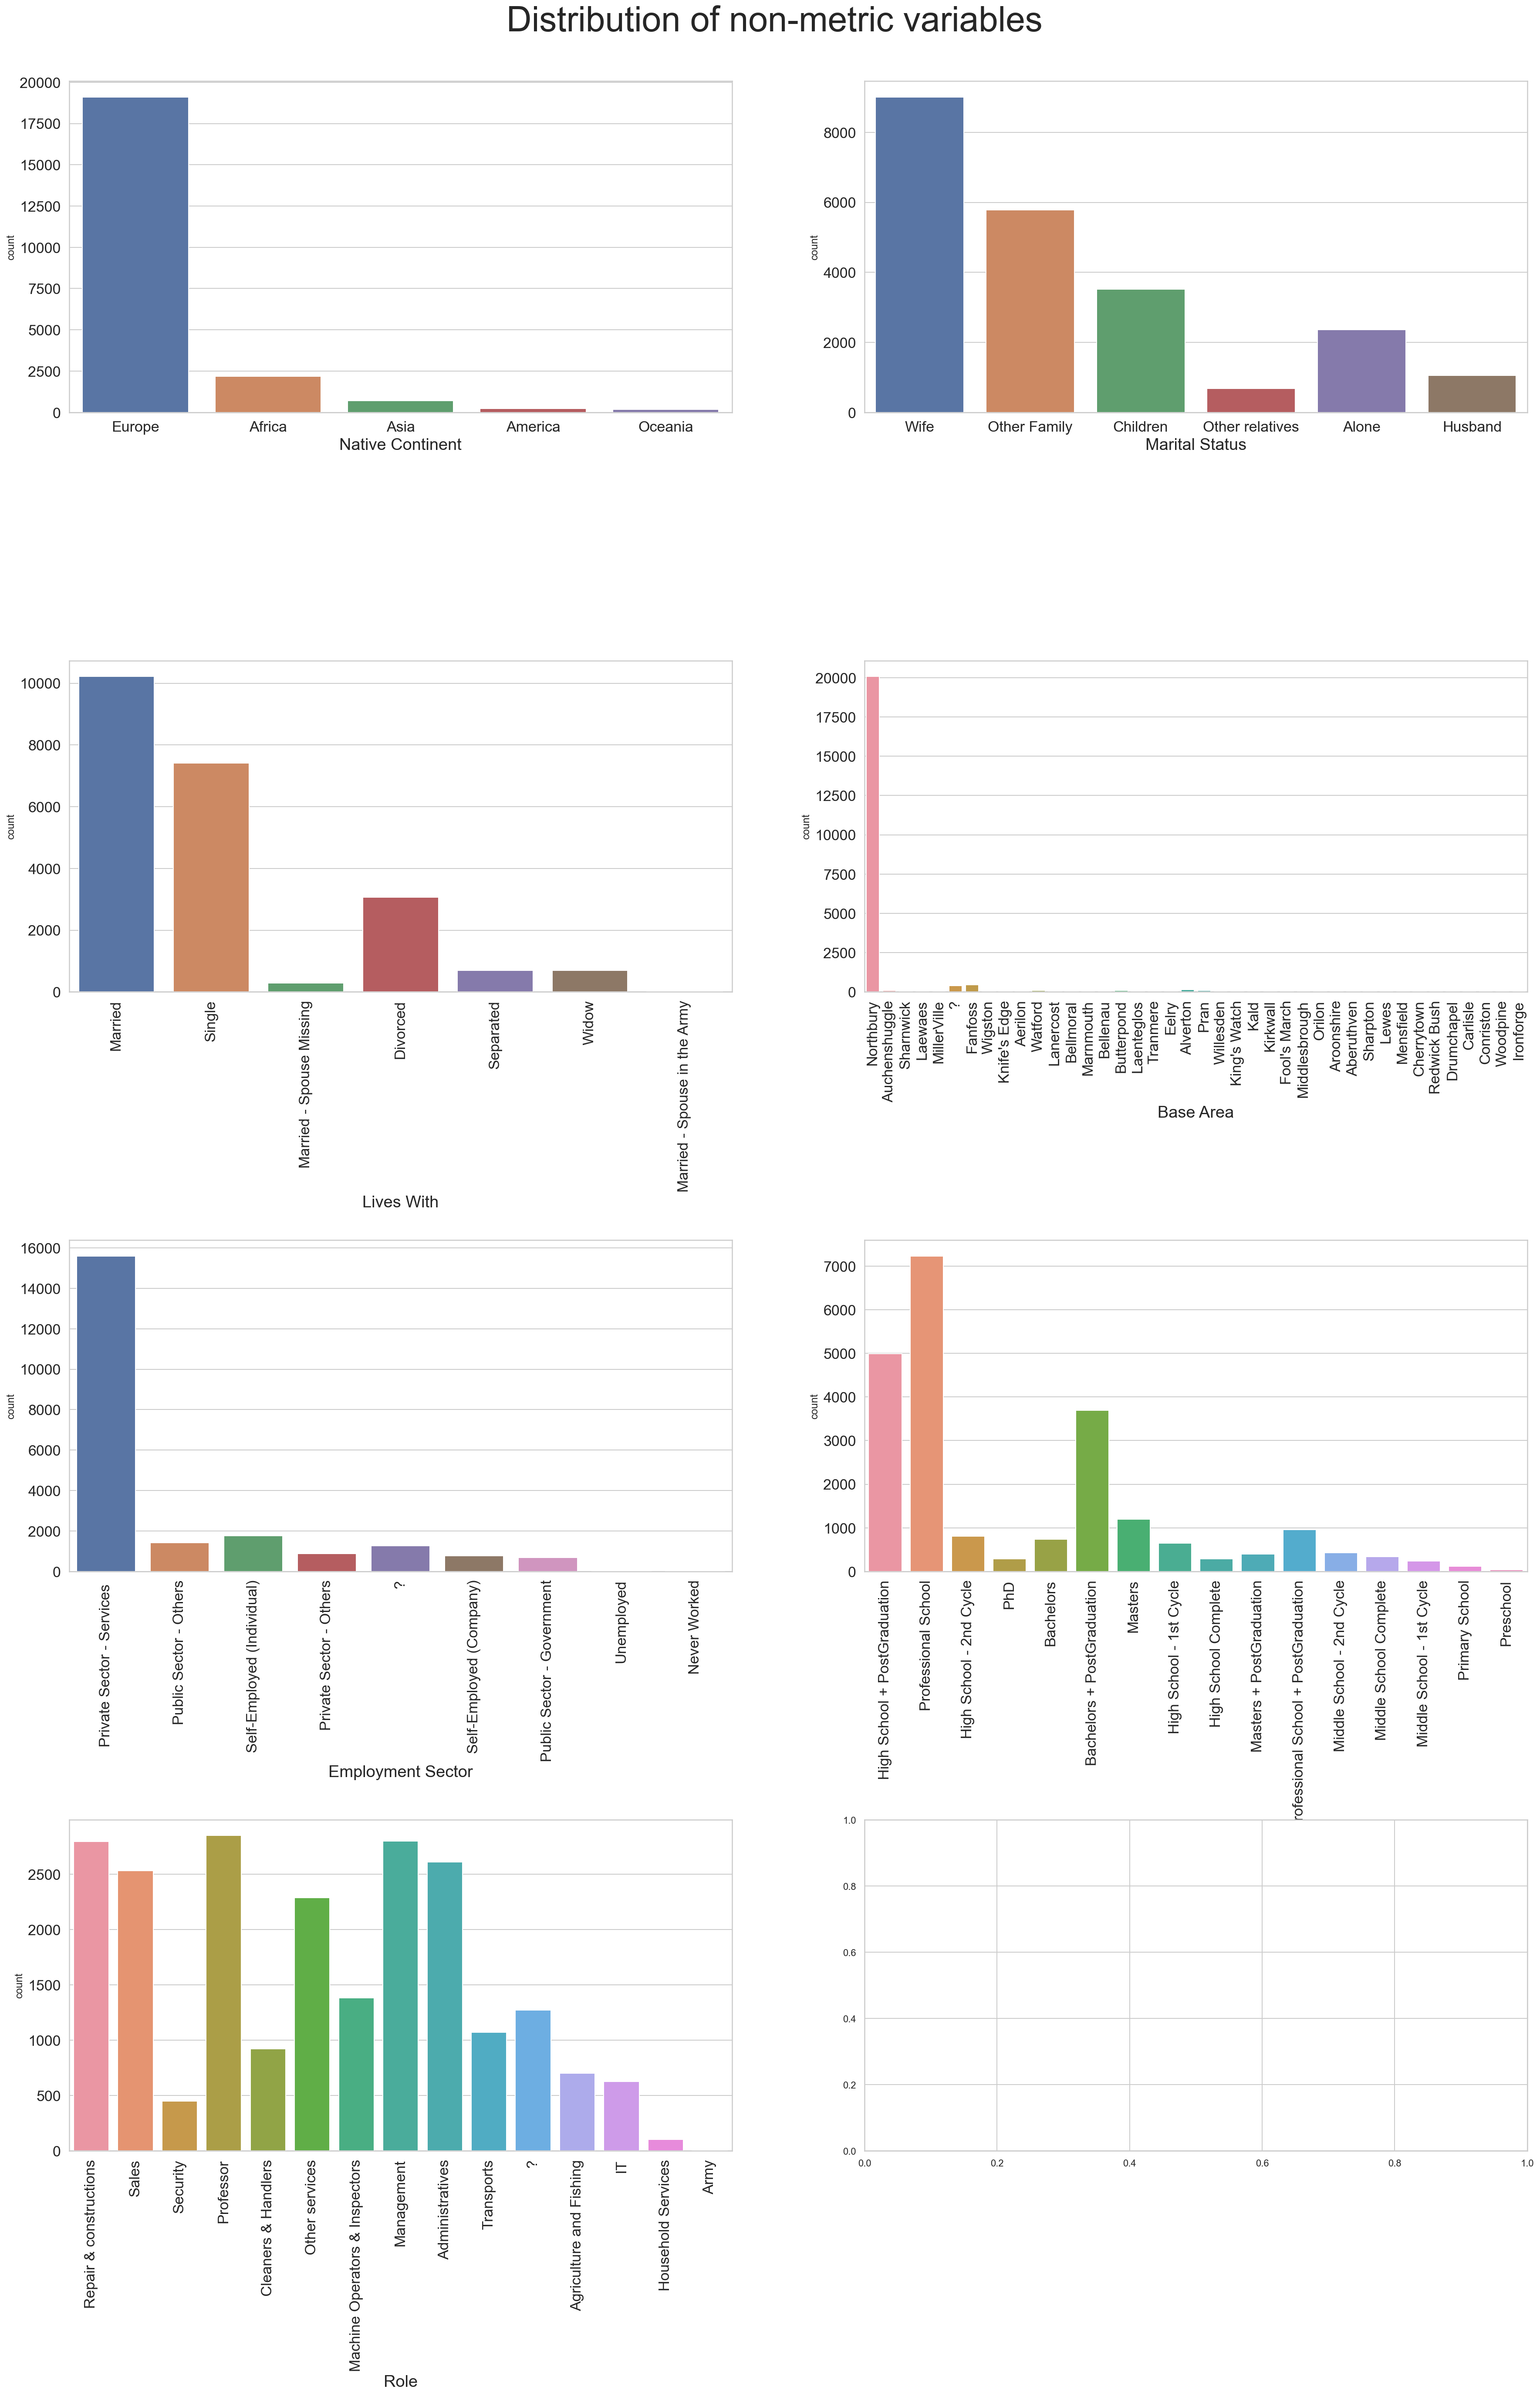

In [14]:
# Barplots for the non-metric variables
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30,40))

ax1=sns.countplot(non_metric["Native Continent"], ax=axes[0,0])
ax2=sns.countplot(non_metric["Lives with"], ax=axes[0,1])
ax3=sns.countplot(non_metric["Marital Status"], ax=axes[1,0])
ax4=sns.countplot(non_metric["Base Area"], ax=axes[1,1])
ax5=sns.countplot(non_metric["Employment Sector"], ax=axes[2,0])
ax6=sns.countplot(non_metric["Education Level"], ax=axes[2,1])
ax7=sns.countplot(non_metric["Role"], ax=axes[3,0])
# ax8=sns.countplot(non_metric["Birthday"], ax=axes[3,1])

ax1.tick_params(labelsize=17)
ax1.set_xlabel(xlabel='Native Continent',fontsize = 19)

ax2.tick_params(labelsize=17)
ax2.set_xlabel(xlabel='Marital Status',fontsize = 19)

ax3.tick_params(labelsize=17)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_xlabel(xlabel='Lives With',fontsize = 19)

ax4.tick_params(labelsize=17)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
ax4.set_xlabel(xlabel='Base Area',fontsize = 19)

ax5.tick_params(labelsize=17)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90)
ax5.set_xlabel(xlabel='Employment Sector',fontsize = 19)

ax6.tick_params(labelsize=17)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=90)
ax6.set_xlabel(xlabel='Education Level',fontsize = 19)

ax7.tick_params(labelsize=17)
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=90)
ax7.set_xlabel(xlabel='Role',fontsize = 19)

# ax8.tick_params(labelsize=17)
# ax8.set_xticklabels(ax.get_xticklabels(), rotation=90)
# ax8.set_xlabel(xlabel='Birthday',fontsize = 19)

plt.subplots_adjust(top=0.95,hspace=0.75)
plt.suptitle("Distribution of non-metric variables", fontsize=40)

In [15]:
# Looking at the plots above, we can see the distribution of the values per category, for each non-metric variable.
# With this, we see that there are 3 variables containing "?" as a value, which we understand to be null values.
# Hence, here we are replacing those "?" for null values, to analyze them more efficiently
df_train = df_train.replace('?', np.nan)

In [16]:
# Now, we can already see how many missing values each variable actually has
df_train.isna().sum()

Name                         0
Birthday                     0
Native Continent             0
Marital Status               0
Lives with                   0
Base Area                  395
Education Level              0
Years of Education           0
Employment Sector         1264
Role                      1271
Working Hours per week       0
Money Received               0
Ticket Price                 0
dtype: int64

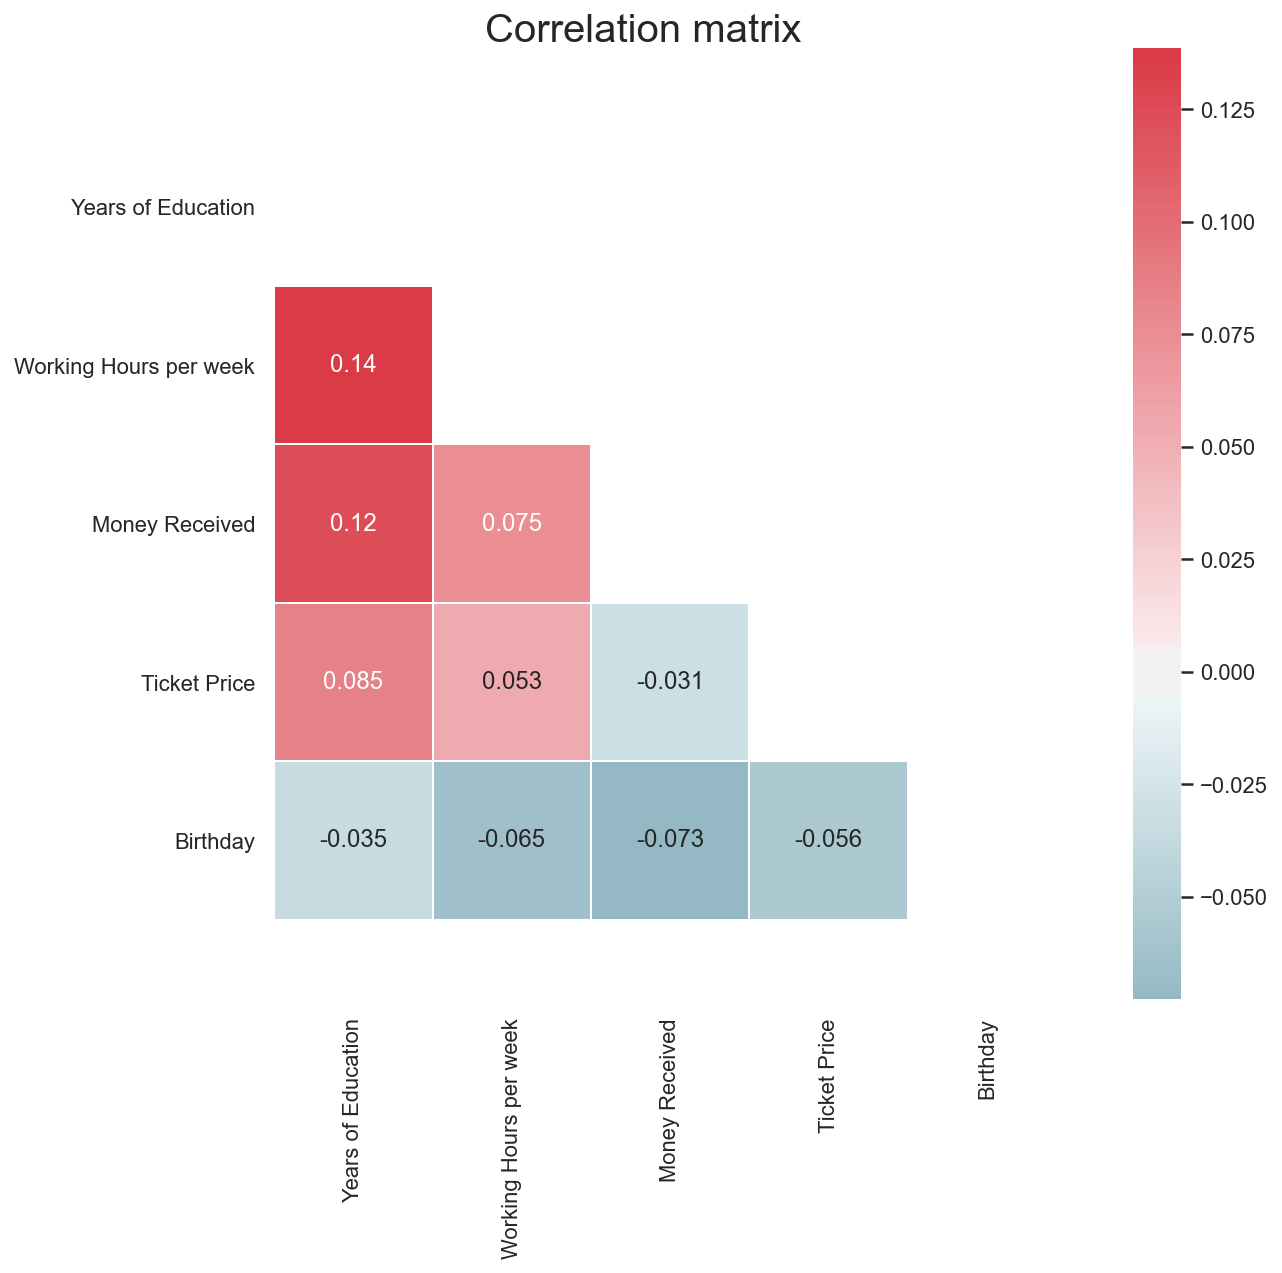

In [17]:
# Correlation matrix for the metric variables
sns.set(style="white")

# Compute the correlation matrix
corr = metric.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, ax=ax, annot=True)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix", fontsize=20)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Fixing the bug of partially cut-off bottom and top cells
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

In [18]:
# Analysis of the relation between Base Area and Role
pd.set_option('display.max_rows', 500)
df_train.groupby(["Base Area","Role"])["Role"].count()

Base Area      Role                          
Aberuthven     Administratives                      5
               Cleaners & Handlers                  3
               Household Services                   1
               IT                                   1
               Machine Operators & Inspectors       4
               Other services                       2
               Professor                            1
               Repair & constructions               4
               Sales                                2
Aerilon        Administratives                      2
               Agriculture and Fishing              1
               Cleaners & Handlers                  6
               Household Services                   1
               IT                                   2
               Machine Operators & Inspectors       6
               Management                           3
               Other services                       1
               Professor            

In [19]:
# Analysis of the relation between Marital Status and Lives with
pd.crosstab(df_train['Marital Status'], df_train['Lives with'], margins=True)

Lives with                    Alone  Children  Husband  Other Family  \
Marital Status                                                         
Divorced                       1113       227        0          1657   
Married                           0        73     1042            12   
Married - Spouse Missing         85        33        0           141   
Married - Spouse in the Army      0         1        7             0   
Separated                       302        69        0           289   
Single                          607      3106        0          3281   
Widow                           255        10        0           397   
All                            2362      3519     1049          5777   

Lives with                    Other relatives  Wife    All  
Marital Status                                              
Divorced                                   75     0   3072  
Married                                    85  9007  10219  
Married - Spouse Missing                   25     0    284  
Married - Spouse in the Army                1     5     14  
Separated                                  39     0    699  
Single                                    422     0   7416  
Widow                                      34     0    696  
All                                       681  9012  22400

## Coherence Checks

In [20]:
# Check if there is anyone born after the year of this experiment (2048) 
len(df_train[(metric.Birthday>2048)])

0

In [21]:
# Check the oldest year of birth and most recent one
print(metric.Birthday.min(), metric.Birthday.max())

1958 2031


In [22]:
# Check if there are negative amounts of money
df_train[(df_train["Money Received"]<0) | (df_train["Ticket Price"]<0)]

Empty DataFrame
Columns: [Name, Birthday, Native Continent, Marital Status, Lives with, Base Area, Education Level, Years of Education, Employment Sector, Role, Working Hours per week, Money Received, Ticket Price]
Index: []

In [23]:
# Check if there is anyone who paid for the ticket and, at the same time, received money to join the experiment
df_train[(df_train["Ticket Price"]!=0) & (df_train["Money Received"]!=0)]

Empty DataFrame
Columns: [Name, Birthday, Native Continent, Marital Status, Lives with, Base Area, Education Level, Years of Education, Employment Sector, Role, Working Hours per week, Money Received, Ticket Price]
Index: []

In [24]:
# Check if there is anyone with a certain level of education and years of education that don't match at all
df_train.groupby(["Years of Education","Education Level"])["Years of Education"].mean()

Years of Education  Education Level                     
2                   Preschool                                2
4                   Primary School                           4
6                   Middle School - 1st Cycle                6
8                   Middle School - 2nd Cycle                8
9                   Middle School Complete                   9
10                  High School - 1st Cycle                 10
11                  High School - 2nd Cycle                 11
12                  High School Complete                    12
                    Professional School                     12
13                  High School + PostGraduation            13
                    Professional School + PostGraduation    13
15                  Bachelors                               15
16                  Bachelors + PostGraduation              16
17                  Masters                                 17
18                  Masters + PostGraduation                1

In [25]:
# We did not consider Preschool relevant (in academic terms), so we gave it a more intuitive label
df_train['Education Level'] = df_train['Education Level'].replace('Preschool', 'No Relevant Education')

In [26]:
df_train["Education Level"].unique()

array(['High School + PostGraduation', 'Professional School',
       'High School - 2nd Cycle', 'PhD', 'Bachelors',
       'Bachelors + PostGraduation', 'Masters', 'High School - 1st Cycle',
       'High School Complete', 'Masters + PostGraduation',
       'Professional School + PostGraduation',
       'Middle School - 2nd Cycle', 'Middle School Complete',
       'Middle School - 1st Cycle', 'Primary School',
       'No Relevant Education'], dtype=object)

In [27]:
# We also replaced the "Preschool" years of education to 0, instead of 2
df_train['Years of Education'] = df_train['Years of Education'].replace(2, 0)

In [28]:
df_train["Years of Education"].unique()

array([13, 12, 11, 21, 15, 16, 17, 10, 18,  8,  9,  6,  4,  0],
      dtype=int64)

In [29]:
# Check if there is anyone whose marital status seems incoherent with the person he/she lives with
df_train.groupby(["Marital Status","Lives with"] )["Lives with"].count()

Marital Status                Lives with     
Divorced                      Alone              1113
                              Children            227
                              Other Family       1657
                              Other relatives      75
Married                       Children             73
                              Husband            1042
                              Other Family         12
                              Other relatives      85
                              Wife               9007
Married - Spouse Missing      Alone                85
                              Children             33
                              Other Family        141
                              Other relatives      25
Married - Spouse in the Army  Children              1
                              Husband               7
                              Other relatives       1
                              Wife                  5
Separated                     Alone 

In [30]:
# Check if there are young people with a very large/unusual amount of years of education
df_train_copy = df_train.copy()
df_train_copy["age"] = 2048 - df_train_copy.Birthday.map(lambda x: x.year)
df_train_copy[df_train_copy.Birthday.map(lambda x: 2048-x.year) < (df_train_copy["Years of Education"]+5)]

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                     
14941       Miss Yvonne Henderson 2029-03-25           Africa         Single   
16528             Miss Ava Glover 2028-07-15           Africa         Single   
24242         Miss Pippa Anderson 2024-02-01           Europe         Single   
24843           Mr. Gavin Thomson 2028-09-13           Europe         Single   
27833            Miss Sue Randall 2030-04-08           Europe         Single   
28849         Mr. Jonathan Oliver 2031-02-05           Europe         Single   
33939             Mr. Isaac Alsop 2027-04-20           Europe         Single   

                 Lives with     Base Area               Education Level  \
CITIZEN_ID                                                                
14941              Children     Lanercost    Bachelors + PostGraduation   
16528       Other relatives     Northbury    Bachelors + PostGraduation   
24242          Other Family  Fool's March                           PhD   
24843              Children     Northbury                       Masters   
27833              Children     Northbury                       Masters   
28849              Children     Northbury  High School + PostGraduation   
33939              Children     Northbury                       Masters   

            Years of Education           Employment Sector             Role  \
CITIZEN_ID                                                                    
14941                       16                         NaN              NaN   
16528                       16  Private Sector - Services             Sales   
24242                       21     Private Sector - Others        Professor   
24843                       17  Private Sector - Services        Management   
27833                       17      Public Sector - Others        Professor   
28849                       13  Private Sector - Services   Administratives   
33939                       17     Private Sector - Others       Transports   

            Working Hours per week  Money Received  Ticket Price  age  
CITIZEN_ID                                                             
14941                           40               0             0   19  
16528                           30               0             0   20  
24242                           99               0             0   24  
24843                           25               0             0   20  
27833                           60               0             0   18  
28849                           20               0             0   17  
33939                           15               0             0   21

In [31]:
# Check if there is anyone with more years of education than his/her age
df_train[df_train.Birthday.map(lambda x: 2048-x.year) < (df_train["Years of Education"]+5)]

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                     
14941       Miss Yvonne Henderson 2029-03-25           Africa         Single   
16528             Miss Ava Glover 2028-07-15           Africa         Single   
24242         Miss Pippa Anderson 2024-02-01           Europe         Single   
24843           Mr. Gavin Thomson 2028-09-13           Europe         Single   
27833            Miss Sue Randall 2030-04-08           Europe         Single   
28849         Mr. Jonathan Oliver 2031-02-05           Europe         Single   
33939             Mr. Isaac Alsop 2027-04-20           Europe         Single   

                 Lives with     Base Area               Education Level  \
CITIZEN_ID                                                                
14941              Children     Lanercost    Bachelors + PostGraduation   
16528       Other relatives     Northbury    Bachelors + PostGraduation   
24242          Other Family  Fool's March                           PhD   
24843              Children     Northbury                       Masters   
27833              Children     Northbury                       Masters   
28849              Children     Northbury  High School + PostGraduation   
33939              Children     Northbury                       Masters   

            Years of Education           Employment Sector             Role  \
CITIZEN_ID                                                                    
14941                       16                         NaN              NaN   
16528                       16  Private Sector - Services             Sales   
24242                       21     Private Sector - Others        Professor   
24843                       17  Private Sector - Services        Management   
27833                       17      Public Sector - Others        Professor   
28849                       13  Private Sector - Services   Administratives   
33939                       17     Private Sector - Others       Transports   

            Working Hours per week  Money Received  Ticket Price  
CITIZEN_ID                                                        
14941                           40               0             0  
16528                           30               0             0  
24242                           99               0             0  
24843                           25               0             0  
27833                           60               0             0  
28849                           20               0             0  
33939                           15               0             0

In [32]:
# Check if unemployed citizens have Role and Working Hours different from 0
df_train[["Employment Sector", "Role", "Working Hours per week"]][df_train["Employment Sector"]=="Unemployed"]

Employment Sector                     Role  Working Hours per week
CITIZEN_ID                                                                   
12567             Unemployed      Cleaners & Handlers                      40
15572             Unemployed  Agriculture and Fishing                      10
16852             Unemployed               Transports                      20
17274             Unemployed          Administratives                      12
21062             Unemployed  Agriculture and Fishing                      50
22741             Unemployed  Agriculture and Fishing                      20
27493             Unemployed   Repair & constructions                      40
29340             Unemployed  Agriculture and Fishing                      65
33010             Unemployed           Other services                      55
33412             Unemployed  Agriculture and Fishing                      50
33618             Unemployed          Administratives                      30
33720             Unemployed          Administratives                      16

In [33]:
# Check if Never worked citizens have Role and Working Hours different from 0
df_train[["Employment Sector", "Role", "Working Hours per week"]][df_train["Employment Sector"]=="Never Worked"]

Employment Sector Role  Working Hours per week
CITIZEN_ID                                               
13792           Never Worked  NaN                      40
22674           Never Worked  NaN                      30
23583           Never Worked  NaN                      10
24701           Never Worked  NaN                      40
27002           Never Worked  NaN                       4
32390           Never Worked  NaN                      40
33185           Never Worked  NaN                      35

In [34]:
df_train["Working Hours per week"][(df_train["Employment Sector"]=="Unemployed") | (df_train["Employment Sector"]=="Never Worked")] = 0

In [35]:
df_train["Role"][(df_train["Employment Sector"]=="Never Worked")] = "No Role"

In [36]:
# Check the changes
df_train[["Employment Sector", "Role", "Working Hours per week"]][(df_train["Employment Sector"]=="Unemployed") | (df_train["Employment Sector"]=="Never Worked")]

Employment Sector                     Role  Working Hours per week
CITIZEN_ID                                                                   
12567             Unemployed      Cleaners & Handlers                       0
13792           Never Worked                  No Role                       0
15572             Unemployed  Agriculture and Fishing                       0
16852             Unemployed               Transports                       0
17274             Unemployed          Administratives                       0
21062             Unemployed  Agriculture and Fishing                       0
22674           Never Worked                  No Role                       0
22741             Unemployed  Agriculture and Fishing                       0
23583           Never Worked                  No Role                       0
24701           Never Worked                  No Role                       0
27002           Never Worked                  No Role                       0
27493             Unemployed   Repair & constructions                       0
29340             Unemployed  Agriculture and Fishing                       0
32390           Never Worked                  No Role                       0
33010             Unemployed           Other services                       0
33185           Never Worked                  No Role                       0
33412             Unemployed  Agriculture and Fishing                       0
33618             Unemployed          Administratives                       0
33720             Unemployed          Administratives                       0

## Outliers

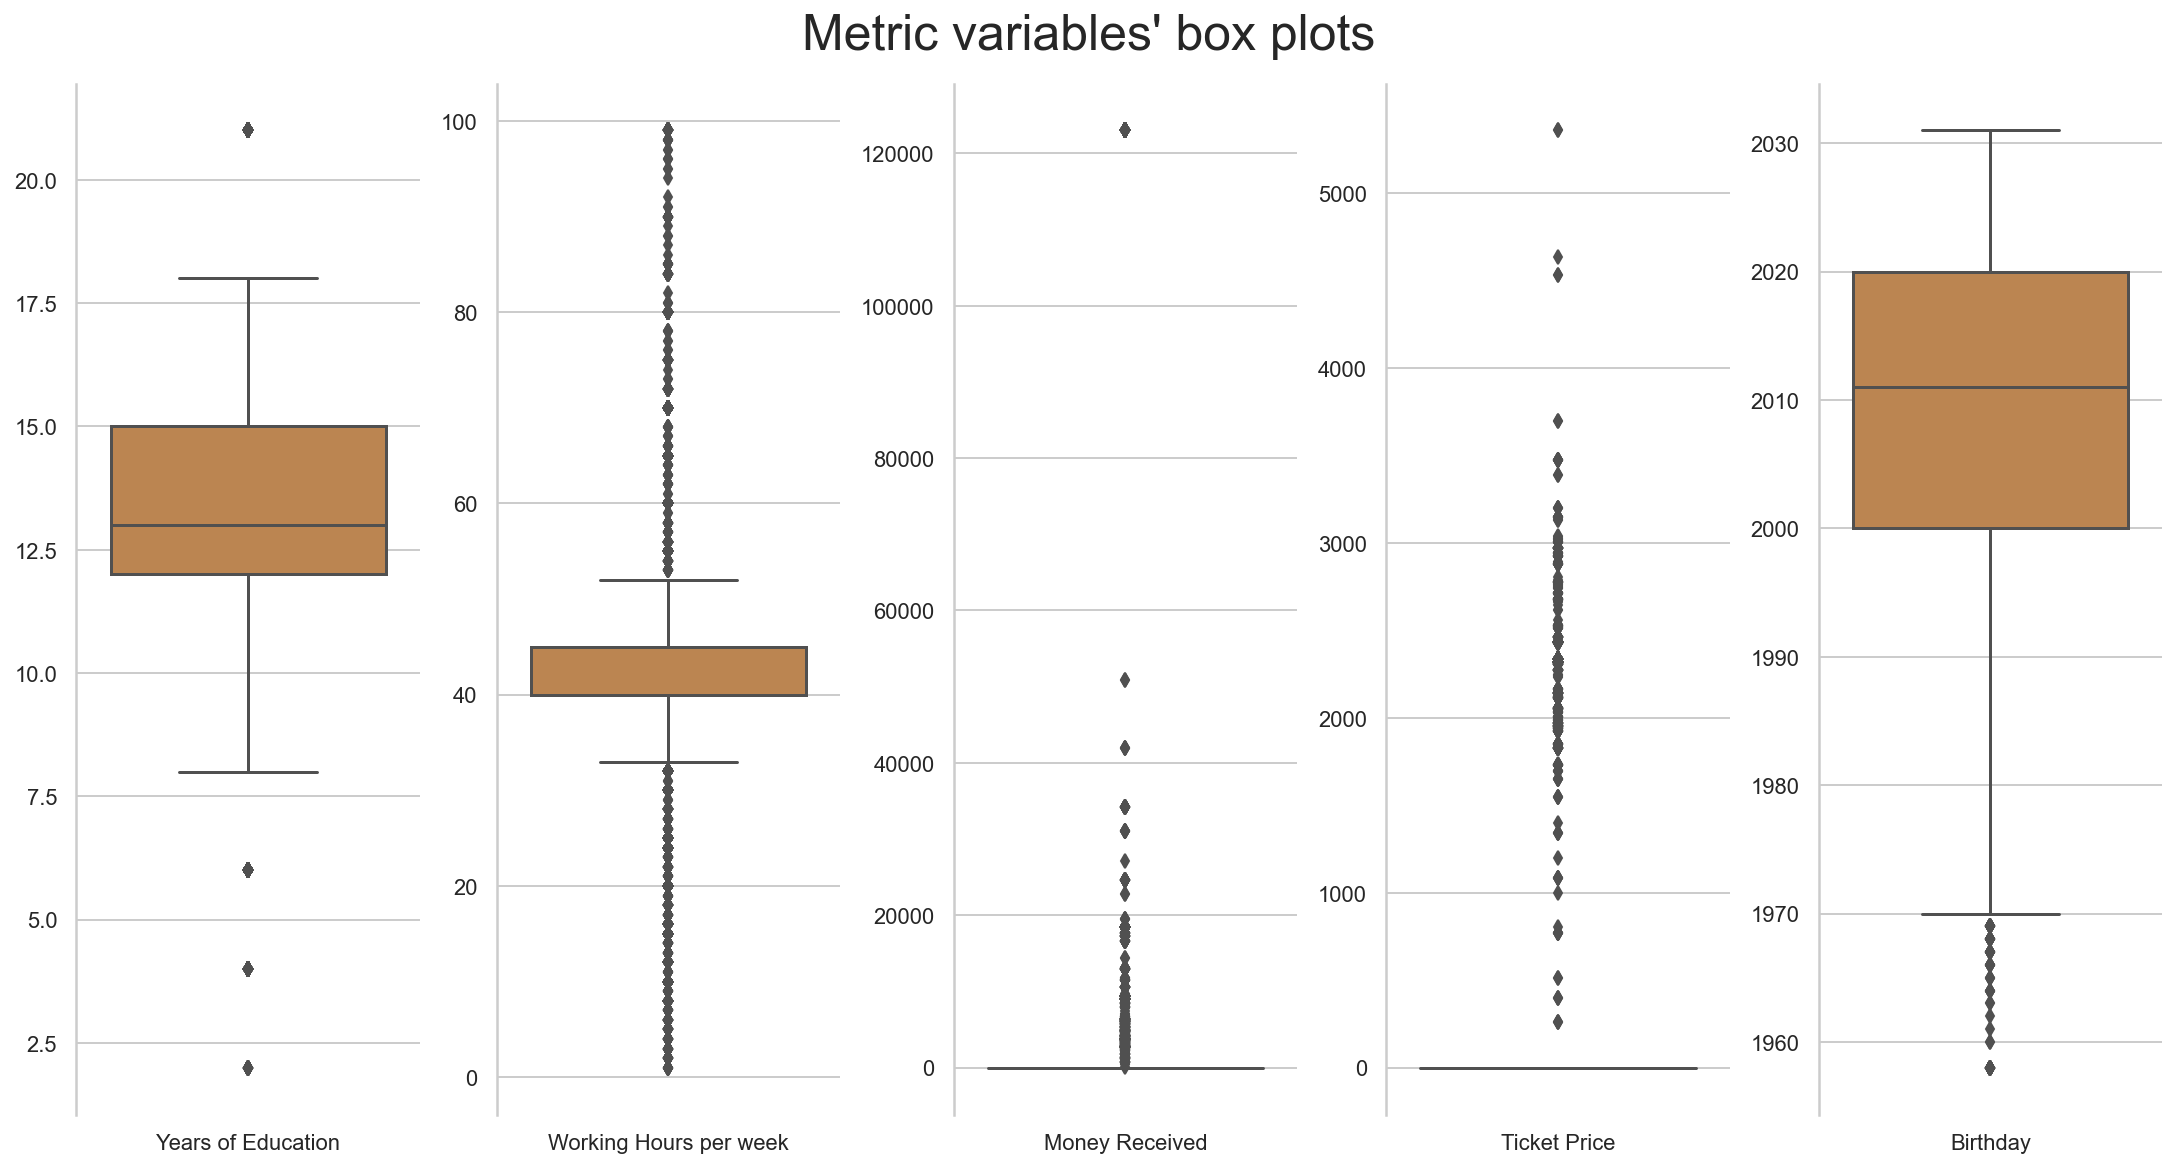

In [37]:
# Box plots for the metric variables
sns.set(style="whitegrid")

data = pd.melt(metric)
plot_features = metric.columns

#Prepare figure layout
fig, axes = plt.subplots(1, len(plot_features), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features):
    sns.boxplot(x="variable", y="value", data=data.loc[data["variable"]==i[1]], ax=i[0], color='peru')
    i[0].set_xlabel("")
    i[0].set_ylabel("")

# Finalize the plot
plt.suptitle("Metric variables' box plots", fontsize=25)
sns.despine(bottom=True)

plt.show()

In [38]:
# Check how many citizens have received more than 120000
df_train[df_train["Money Received"]>120000] 

Name   Birthday Native Continent  \
CITIZEN_ID                                                        
12667          Mr. Alexander Duncan 1997-03-17          Oceania   
12839                 Mr. Sam Black 1985-05-26           Europe   
13363             Mr. Jason Dickens 2009-01-20           Europe   
13419                Mr. Harry Parr 1999-09-29           Europe   
13445              Mr. Jacob Wilson 2008-06-28           Europe   
13557              Mr. Liam Abraham 1995-05-17           Europe   
13759            Mrs. Lauren Morgan 2012-07-31           Africa   
13809                 Mr. Jack Kerr 2008-05-23             Asia   
14070           Mr. Joseph Buckland 1992-07-20           Europe   
14113          Mr. Michael Johnston 2011-06-23           Europe   
14545         Mrs. Bernadette Allan 1999-04-03           Europe   
15047               Mr. Peter Short 2017-01-10             Asia   
15137               Mr. Jason Short 2020-07-25           Africa   
15158             Mr. Steven Mackay 2005-05-13           Europe   
15233             Mrs. Ava Metcalfe 1992-02-22           Europe   
15487                 Mr. Sam Grant 1977-02-28           Europe   
15614         Mr. Christopher Walsh 2012-08-23           Europe   
15689              Mr. Lucas Glover 1993-02-25           Europe   
16717                 Mr. Sam Jones 1990-06-15           Europe   
16772              Mr. Connor Baker 2000-03-08           Europe   
16917            Mr. Stewart Watson 1989-05-29             Asia   
16971             Mr. Adrian Martin 1995-09-27             Asia   
16980                Mr. Liam Walsh 2007-09-07           Europe   
17299              Mr. Ryan Forsyth 2005-04-12           Europe   
17669           Mr. Brandon Jackson 2010-10-03           Europe   
18248            Mr. Jason Ferguson 2008-03-20           Europe   
18761           Mr. Thomas Ferguson 2004-01-19           Europe   
19060              Mr. Phil Cornish 2006-04-08           Europe   
19124            Mr. Michael Murray 1999-02-25           Europe   
19131            Mr. Thomas Jackson 2005-02-28           Europe   
19247              Mr. Brandon Bond 2007-07-31           Europe   
19322                Mr. Max Peters 2012-03-03           Europe   
19386            Mr. Blake Morrison 2002-05-20           Europe   
19478              Mr. Isaac Arnold 2001-04-25           Europe   
19498               Mr. Frank Avery 1993-01-16           Europe   
19509          Mr. Robert Sanderson 1996-10-07           Europe   
19663            Mr. Dominic Davies 2002-05-01           Europe   
20146             Mrs. Julia Martin 2007-08-09           Africa   
20169               Mr. Dan Stewart 1998-05-19           Europe   
20173              Mr. Ryan Vaughan 2006-01-14           Europe   
20399               Mr. Sean Hunter 2009-05-16           Europe   
20594              Mr. Adrian Kelly 2005-04-14           Europe   
21274              Mr. Alan Cameron 2018-01-04           Europe   
21310                Miss Chloe May 2027-06-24           Africa   
21858            Mr. Jacob Johnston 1974-07-26           Europe   
22203           Mr. Boris Sanderson 1999-07-24           Europe   
22407               Mr. Joseph Gray 2016-10-03           Europe   
22461        Mrs. Elizabeth Dickens 1997-07-14           Europe   
22520           Mr. Michael Wallace 2001-03-25           Europe   
23183             Mr. Brandon Vance 2002-06-12           Europe   
23199           Mr. Benjamin Wright 2001-04-24             Asia   
23236           Mrs. Stephanie Knox 1995-01-13           Europe   
23717         Mr. Christopher Poole 2007-04-19           Europe   
24230              Mr. Phil Burgess 1983-04-30           Europe   
24549               Mr. Harry Kelly 2004-10-10           Europe   
24585             Mr. Connor Newman 1998-07-14           Europe   
24603            Mr. Jonathan Baker 2010-07-07           Europe   
24684                Mr. Owen Clark 2001-02-19           Europe   
25405      

In [39]:
df_train["Working Hours per week"].describe()

count    22400.000000
mean        40.456696
std         12.414943
min          0.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Working Hours per week, dtype: float64

In [40]:
# Function to do outlier detection with the IQR method

def out_iqr(data, k=1.5, return_thresholds=False):
#some cutoff to multiply by the iqr
#return_thresholds - True returns the lower and upper bounds; False returns the masked array 

    # calculate interquartile range
    q25, q75 = np.percentile(data, 25, axis=0), np.percentile(data, 75, axis=0)
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    
    if return_thresholds:
        return lower, upper
    
    else: # identify outliers
        #return a boolean mask of outliers for a series using interquartile range
        return data.apply(lambda x: np.any((x<lower) | (x>upper)), 1)

In [41]:
# Testing with k=3.5
outliers = out_iqr(df_train[['Money Received', 'Ticket Price']], 3.5)

In [42]:
outliers.value_counts()

False    19511
True      2889
dtype: int64

In [43]:
# Citizens from Groups B and C are always removed using the IQR method!
df_train[~outliers].max()

Name                                            Mrs. Zoe Young
Birthday                                   2031-10-11 00:00:00
Native Continent                                       Oceania
Marital Status                                           Widow
Lives with                                                Wife
Education Level           Professional School + PostGraduation
Years of Education                                          21
Working Hours per week                                      99
Money Received                                               0
Ticket Price                                                 0
dtype: object

In [44]:
# Further checking the box plots: 
# Check the number of citizens that have less than 7.5 years of education to conclude if they might be outliers
len(df_train[df_train["Years of Education"]<7.5])

392

In [45]:
# Test if the variable Working Hours per week follows a normal distribution
stat, p = shapiro(df_train["Working Hours per week"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.885, p=0.000
Sample does not look Gaussian (reject H0)


In [46]:
# Manual removal of outliers by checking the box plots
filters = (
    (df_train['Money Received']<120000)
    &
    (df_train['Ticket Price']<4000)
)

In [47]:
df_train_out = df_train[filters]
target_out = target[filters]

In [48]:
print(round((1-len(df_train_out)/len(df_train))*100,2),'% observations would be removed')

0.53 % observations would be removed


We decided not to eliminate outliers on "Money Received", since when observing the value that was more distant from the rest, we concluded that there were several people with that high value (122999), all having a relatively important role and high hours of work. 

Also, we do not consider as relevant the amount of money itself (payed or received), but instead, if the person received or payed to go.

However, we will still try to use the manual removal, later on.

## Missing Values

#### 1st method - Impute with the mode

In [49]:
df_train.isna().sum()

Name                         0
Birthday                     0
Native Continent             0
Marital Status               0
Lives with                   0
Base Area                  395
Education Level              0
Years of Education           0
Employment Sector         1264
Role                      1264
Working Hours per week       0
Money Received               0
Ticket Price                 0
dtype: int64

In [50]:
df_train1 = df_train.copy()

In [51]:
modes = non_metric.mode().loc[0]
df_train1.fillna(modes, inplace=True)

#### 2nd method - Impute with the mode of categories in common

Using the following code cell, we will try to understand if certain non-metric variables are dependent or not from the ones with missing values.

In [52]:
# Create a function that performs the Chi2 test for independence, to check for association between each variable with no 
# missing values and each of the ones that have them

def check_association(col1, col2):
    # Contingency table
    tab=pd.crosstab(df_train[col1], df_train[col2], margins=False).values
    stat, p, dof, expected = chi2_contingency(tab)

    # Interpretation of test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    
    if abs(stat) >= critical:
        print(col1,'and',col2,'are dependent (reject H0).')
    else:
        print(col1,'and',col2,'are independent (fail to reject H0).')
        
    # Interpretation of p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    
    if p <= alpha:
        print(col1,'and',col2,'are dependent (reject H0).\n')
    else:
        print(col1,'and',col2,'are independent (fail to reject H0).\n')

In [53]:
# FIRST: Marital Status

check_association('Marital Status','Base Area')
check_association('Marital Status','Employment Sector')
check_association('Marital Status','Role')

probability=0.950, critical=264.224, stat=707.714
Marital Status and Base Area are dependent (reject H0).
significance=0.050, p=0.000
Marital Status and Base Area are dependent (reject H0).

probability=0.950, critical=58.124, stat=798.754
Marital Status and Employment Sector are dependent (reject H0).
significance=0.050, p=0.000
Marital Status and Employment Sector are dependent (reject H0).

probability=0.950, critical=106.395, stat=2136.649
Marital Status and Role are dependent (reject H0).
significance=0.050, p=0.000
Marital Status and Role are dependent (reject H0).



In [54]:
# SECOND: Education Level

check_association('Education Level','Base Area')
check_association('Education Level','Employment Sector')
check_association('Education Level','Role')

probability=0.950, critical=626.650, stat=6057.678
Education Level and Base Area are dependent (reject H0).
significance=0.050, p=0.000
Education Level and Base Area are dependent (reject H0).

probability=0.950, critical=129.918, stat=1544.322
Education Level and Employment Sector are dependent (reject H0).
significance=0.050, p=0.000
Education Level and Employment Sector are dependent (reject H0).

probability=0.950, critical=244.808, stat=10712.853
Education Level and Role are dependent (reject H0).
significance=0.050, p=0.000
Education Level and Role are dependent (reject H0).



Seeing both of these variables are associated with the three variables with missing values, using the similarities between people in these categories might be useful to discover their characteristics in the missing variables.

In [55]:
# Copy the dataframe into another to apply the changes there
df_train2 = df_train.copy()

# Create a function to impute the missing values by the mode of the records belonging to the same classes of Marital Status and Education Level
def impute_mode_by_cat(df_train2, col):
    exp=df_train2[df_train2[col].isnull()].reset_index()
    gr=df_train2.groupby(["Education Level","Marital Status"])[col].agg(pd.Series.mode)
    
    # If there are null values in the group by, replace them by the overall mode of the orginal variable
    for i in range(len(gr)):
        if len(gr[i])==0:
            gr[i]=df_train2[col].mode()[0]


    # Define the values of Base Area in the new auxiliary dataset as the mode of the Base Area values for the observations 
    # with the same level of education and marital status, because at least to some extent, they are more similar than the 
    # others       
    for i in range(len(exp)):
        for x in range(len(gr)):
            if (exp['Education Level'][i]==gr.index[x][0]) and (exp['Marital Status'][i]==gr.index[x][1]):
                exp[col][i]=gr[x]
                
    # If it's bimodal (has more than one mode), keep only the first one provided
    for i in range(len(exp)):
        if type(exp[col][i])!=str:
            exp[col][i]=df_train2[col].mode()[0]

    # Finally, replace the null values in Base Area, in the original dataset, by the values acquired before
    for i in range(len(exp)):
        df_train2.loc[exp['CITIZEN_ID'][i],col]=exp[col][i]
        
    return df_train2

In [56]:
# Checking the records of citizens with a null Base Area
df_train2[df_train2['Base Area'].isnull()]

Name   Birthday Native Continent  \
CITIZEN_ID                                                         
12516                 Mr. Jason Gray 2024-09-26           Africa   
12583               Mr. Joseph Avery 2008-09-06           Europe   
12700               Mr. Colin Graham 2017-02-14           Europe   
12771                 Mrs. Emma Gray 2005-02-22           Europe   
12845         Mr. Alexander Rampling 2022-02-28           Africa   
12875                 Mr. Owen Scott 2027-07-20           Europe   
12891           Mr. Anthony McDonald 2020-10-06           Europe   
12895            Mrs. Bella Hemmings 1991-05-07           Europe   
12956             Mr. William Wilson 2004-05-20           Europe   
13158                Miss Wendy Nash 2020-06-16           Europe   
13213                 Mrs. Karen Lee 1976-05-09           Europe   
13267           Mr. Steven Sanderson 2010-01-28           Europe   
13369               Mr. Julian Paige 2013-04-20           Africa   
13524            Mr. Sebastian Scott 2029-06-24           Europe   
13526             Mr. Brandon Mackay 2007-01-29           Europe   
13546                   Mr. Ian Bell 2018-09-06           Africa   
13553              Mrs. Lillian Hart 2000-07-18             Asia   
13574            Mrs. Felicity Welch 2016-04-11           Europe   
13615               Mr. Jason Martin 2016-04-24             Asia   
13661               Mr. Joseph Alsop 2007-01-10           Europe   
13697              Miss Anne Dickens 2020-03-21           Europe   
13716                Mr. Ian Coleman 2014-05-24           Europe   
13809                  Mr. Jack Kerr 2008-05-23             Asia   
13850            Mr. Cameron Cornish 2006-04-23           Europe   
13852              Miss Heather Bond 2022-08-07           Europe   
13932            Mrs. Melanie Howard 2016-01-17           Africa   
13972           Miss Virginia Hodges 2024-08-13           Europe   
13978               Mrs. Lily Fisher 1978-09-07           Europe   
14008            Miss Felicity Quinn 2015-07-15           Europe   
14086             Mr. Frank Campbell 2008-04-27           Europe   
14091                Mr. Harry Poole 2001-01-07           Europe   
14307                 Mr. Liam Blake 2021-09-29           Europe   
14309                  Mr. Alan King 2012-05-10           Europe   
14450              Mr. Dominic Jones 2017-01-11           Africa   
14517          Mrs. Stephanie Hodges 2007-01-19           Europe   
14562             Mr. Thomas Parsons 2017-01-29           Africa   
14812               Mr. Isaac Bailey 2014-02-15           Africa   
14894                  Mr. Sam Welch 2003-09-28             Asia   
14905              Mr. Boris Abraham 1997-07-27           Europe   
14951                Mrs. Emily Hart 2014-02-22           Europe   
15009           Miss Andrea Springer 2020-05-04           Europe   
15054           Miss Hannah Ferguson 2024-04-27           Europe   
15060              Mr. Robert Tucker 2017-01-05             Asia   
15090               Mr. John Pullman 1980-02-18           Europe   
15100           Mr. Warren Mackenzie 2009-09-09           Europe   
15135            Mr. William Manning 1995-03-03           Europe   
15161               Mr. Brian Glover 2009-09-15           Europe   
15300                Mr. Evan Hodges 1988-04-26           Europe   
15310                  Mr. Joe Brown 1986-05-18           Europe   
15316                Mr. Sean Fisher 2022-09-16           Europe   
15317           Mr. Steven Henderson 2009-05-14           Europe   
15333              Mr. Jason Stewart 2010-02-04           Europe   
15370           Mr. Benjamin Russell 1985-06-21           Europe   
15397            Mr. Thomas Campbell 2013-01-14             Asia   
15455          Mrs. Katherine Wright 2013-09-22           Europe   
15506                Mr. Jake Tucker 2006-09-11           Africa   
15562             Mr. Thomas Russell 2016-03-22             Asia   
15652             Mr

In [57]:
# Imputing them with the method described above
df_train2 = impute_mode_by_cat(df_train2,'Base Area')

In [58]:
# Checking the records of citizens with a null Employment Sector
df_train2[df_train2['Employment Sector'].isnull()]

Name   Birthday Native Continent  \
CITIZEN_ID                                                       
12508       Miss Gabrielle Cameron 2028-02-09           Europe   
12511           Miss Amy Churchill 2029-02-10           Europe   
12523        Mr. William Sanderson 1997-10-08           Europe   
12529           Miss Deirdre Lyman 2018-03-28             Asia   
12530          Mrs. Carolyn Tucker 1976-02-03           Europe   
...                            ...        ...              ...   
34795               Mr. Luke Smith 1985-03-05           Europe   
34814           Mr. Stewart Newman 1990-01-23          America   
34823          Mr. Jonathan Slater 2006-05-27           Europe   
34825           Mr. Steven Vaughan 1995-06-27           Europe   
34856              Mr. Neil Butler 2031-05-21           Europe   

                      Marital Status       Lives with     Base Area  \
CITIZEN_ID                                                            
12508                         Single  Other relatives     Northbury   
12511                         Single         Children     Northbury   
12523                        Married             Wife     Northbury   
12529                         Single     Other Family  Knife's Edge   
12530                          Widow     Other Family     Northbury   
...                              ...              ...           ...   
34795                        Married             Wife     Northbury   
34814       Married - Spouse Missing            Alone     Northbury   
34823                        Married             Wife     Northbury   
34825                        Married             Wife     Northbury   
34856                         Single         Children     Northbury   

                         Education Level  Years of Education  \
CITIZEN_ID                                                     
12508                Professional School                  12   
12511       High School + PostGraduation                  13   
12523                            Masters                  17   
12529         Bachelors + PostGraduation                  16   
12530            High School - 2nd Cycle                  11   
...                                  ...                 ...   
34795                Professional School                  12   
34814                     Primary School                   4   
34823       High School + PostGraduation                  13   
34825                Professional School                  12   
34856            High School - 1st Cycle                  10   

           Employment Sector Role  Working Hours per week  Money Received  \
CITIZEN_ID                                                                  
12508                    NaN  NaN                      35               0   
12511                    NaN  NaN                      40               0   
12523                    NaN  NaN                      40               0   
12529                    NaN  NaN                      50               0   
12530                    NaN  NaN                      24               0   
...                      ...  ...                     ...             ...   
34795                    NaN  NaN                      20               0   
34814                    NaN  NaN                      40               0   
34823                    NaN  NaN                      60               0   
34825                    NaN  NaN                      40               0   
34856                    NaN  NaN                      30               0   

            Ticket Price  
CITIZEN_ID                
12508                  0  
12511                  0  
12523                  0  
12529                  0  
12530                  0  
...                  ...  
34795                  0  
34814                  0  
34823                  0  
34825                  0  
34856                  0  

[1264 rows x 13 columns]

In [59]:
# Imputing them with the method described above
df_train2 = impute_mode_by_cat(df_train2,'Employment Sector')

In [60]:
# Checking the records of citizens with a null Role
df_train2[df_train2['Role'].isnull()]

Name   Birthday Native Continent  \
CITIZEN_ID                                                       
12508       Miss Gabrielle Cameron 2028-02-09           Europe   
12511           Miss Amy Churchill 2029-02-10           Europe   
12523        Mr. William Sanderson 1997-10-08           Europe   
12529           Miss Deirdre Lyman 2018-03-28             Asia   
12530          Mrs. Carolyn Tucker 1976-02-03           Europe   
...                            ...        ...              ...   
34795               Mr. Luke Smith 1985-03-05           Europe   
34814           Mr. Stewart Newman 1990-01-23          America   
34823          Mr. Jonathan Slater 2006-05-27           Europe   
34825           Mr. Steven Vaughan 1995-06-27           Europe   
34856              Mr. Neil Butler 2031-05-21           Europe   

                      Marital Status       Lives with     Base Area  \
CITIZEN_ID                                                            
12508                         Single  Other relatives     Northbury   
12511                         Single         Children     Northbury   
12523                        Married             Wife     Northbury   
12529                         Single     Other Family  Knife's Edge   
12530                          Widow     Other Family     Northbury   
...                              ...              ...           ...   
34795                        Married             Wife     Northbury   
34814       Married - Spouse Missing            Alone     Northbury   
34823                        Married             Wife     Northbury   
34825                        Married             Wife     Northbury   
34856                         Single         Children     Northbury   

                         Education Level  Years of Education  \
CITIZEN_ID                                                     
12508                Professional School                  12   
12511       High School + PostGraduation                  13   
12523                            Masters                  17   
12529         Bachelors + PostGraduation                  16   
12530            High School - 2nd Cycle                  11   
...                                  ...                 ...   
34795                Professional School                  12   
34814                     Primary School                   4   
34823       High School + PostGraduation                  13   
34825                Professional School                  12   
34856            High School - 1st Cycle                  10   

                     Employment Sector Role  Working Hours per week  \
CITIZEN_ID                                                            
12508       Private Sector - Services   NaN                      35   
12511       Private Sector - Services   NaN                      40   
12523       Private Sector - Services   NaN                      40   
12529       Private Sector - Services   NaN                      50   
12530       Private Sector - Services   NaN                      24   
...                                ...  ...                     ...   
34795       Private Sector - Services   NaN                      20   
34814       Private Sector - Services   NaN                      40   
34823       Private Sector - Services   NaN                      60   
34825       Private Sector - Services   NaN                      40   
34856       Private Sector - Services   NaN                      30   

            Money Received  Ticket Price  
CITIZEN_ID                                
12508                    0             0  
12511                    0             0  
12523                    0             0  
12529                    0             0  
12530                    0             0  
...                    ...           ...  
34795                    0             0  
34814                    0             0  
34823                    0             0  
34825            

In [61]:
# Imputing them with the method described above
df_train2 = impute_mode_by_cat(df_train2,'Role')

In [62]:
# Check if there are no missing values left to impute 
df_train2.isna().sum()

Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
dtype: int64

Text(0.5, 0.98, 'Distribution of variables with and without missing values')

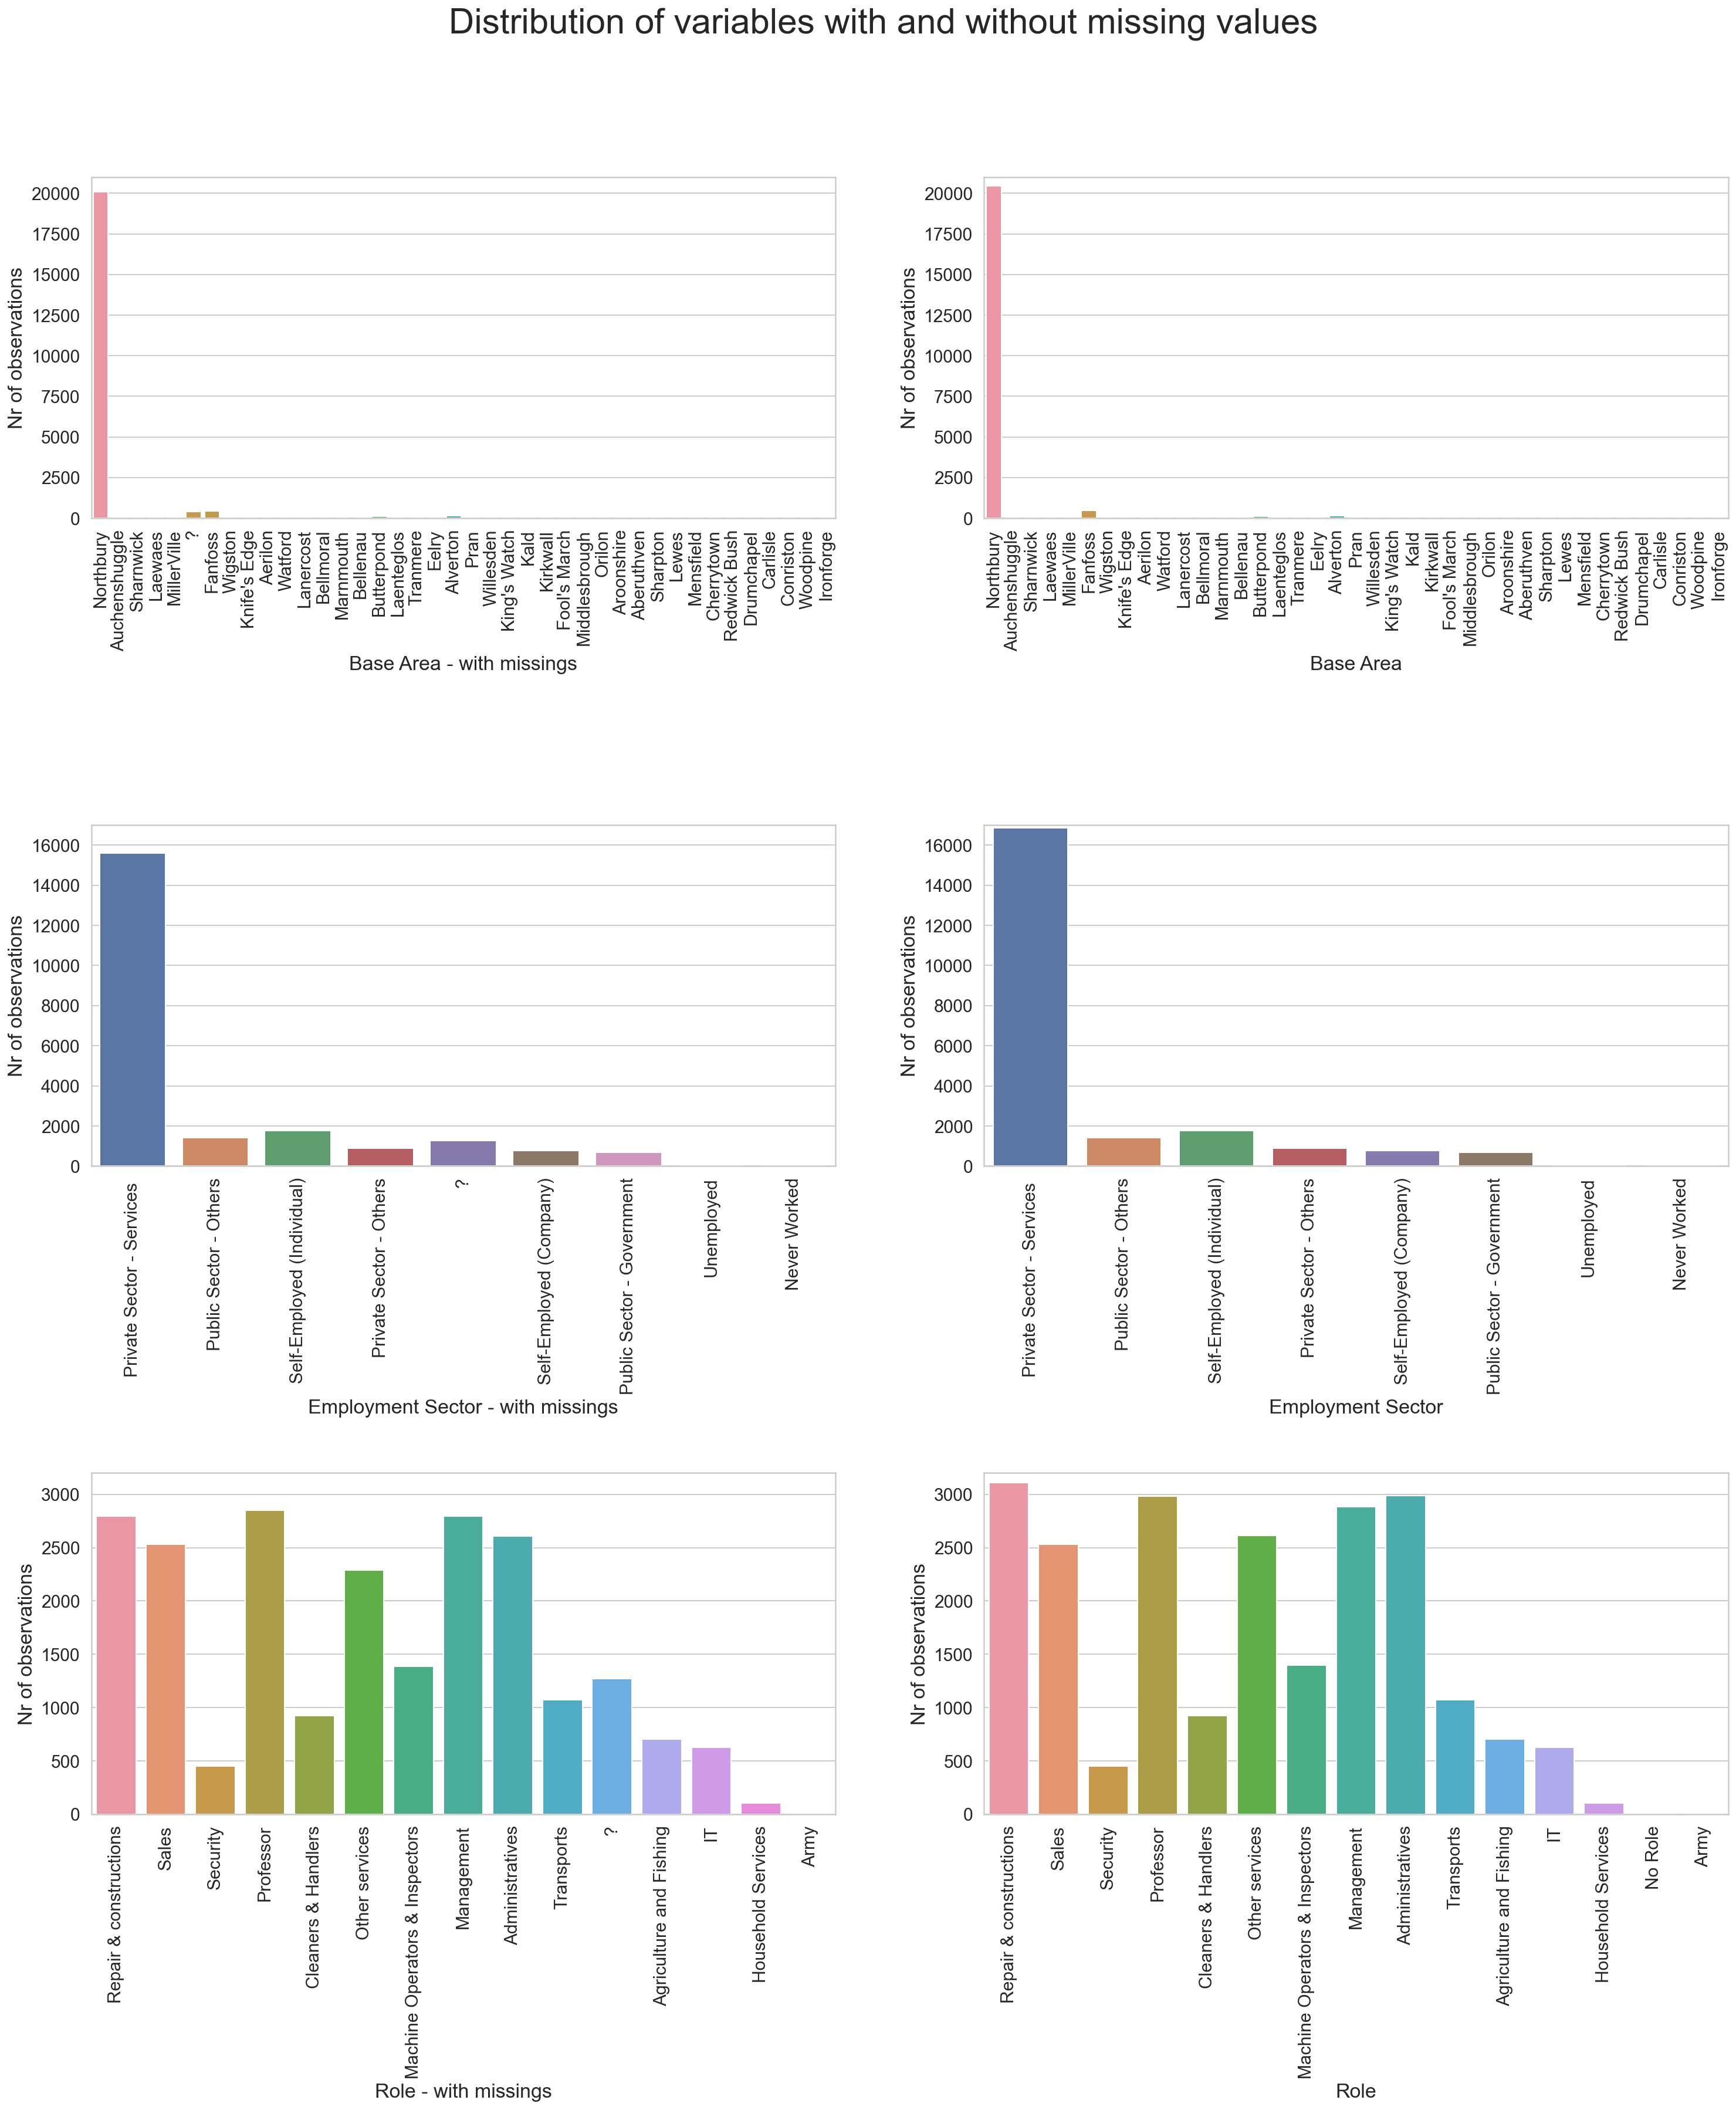

In [63]:
# Barplots for the non-metric variables before & after the imputation
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,25))

axa=sns.countplot(df_train2["Base Area"], ax=axes[0,1])
axb=sns.countplot(df_train2["Employment Sector"], ax=axes[1,1])
axc=sns.countplot(df_train2["Role"], ax=axes[2,1])

ax4=sns.countplot(non_metric["Base Area"], ax=axes[0,0])
ax5=sns.countplot(non_metric["Employment Sector"], ax=axes[1,0])
ax7=sns.countplot(non_metric["Role"], ax=axes[2, 0])

axa.tick_params(labelsize=15)
axa.set_xticklabels(axa.get_xticklabels(), rotation=90)
axa.set_xlabel(xlabel='Base Area',fontsize = 17)
axa.set_ylabel(ylabel='Nr of observations',fontsize = 17)
axa.set(ylim=(0, 21000))

ax4.tick_params(labelsize=15)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
ax4.set_xlabel(xlabel='Base Area - with missings',fontsize = 17)
ax4.set_ylabel(ylabel='Nr of observations',fontsize = 17)
ax4.set(ylim=(0, 21000))

axb.tick_params(labelsize=15)
axb.set_xticklabels(axb.get_xticklabels(), rotation=90)
axb.set_xlabel(xlabel='Employment Sector',fontsize = 17)
axb.set_ylabel(ylabel='Nr of observations',fontsize = 17)
axb.set(ylim=(0, 17000))

ax5.tick_params(labelsize=15)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90)
ax5.set_xlabel(xlabel='Employment Sector - with missings',fontsize = 17)
ax5.set_ylabel(ylabel='Nr of observations',fontsize = 17)
ax5.set(ylim=(0, 17000))

axc.tick_params(labelsize=15)
axc.set_xticklabels(axc.get_xticklabels(), rotation=90)
axc.set_xlabel(xlabel='Role',fontsize = 17)
axc.set_ylabel(ylabel='Nr of observations',fontsize = 17)
axc.set(ylim=(0, 3200))

ax7.tick_params(labelsize=15)
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=90)
ax7.set_xlabel(xlabel='Role - with missings',fontsize = 17)
ax7.set_ylabel(ylabel='Nr of observations',fontsize = 17)
ax7.set(ylim=(0, 3200))

plt.subplots_adjust(top=0.9,hspace=0.9)
plt.suptitle("Distribution of variables with and without missing values", fontsize=30)

## Feature Engineering

Age:

In [64]:
# New variable for Age
df_train2["Age"]=df_train2.Birthday.map(lambda x: datetime.now().year+28-x.year)

# Same for test
df_test["Age"]=df_test.Birthday.map(lambda x: datetime.now().year+28-x.year)

In [65]:
df_train2[["Birthday","Age"]]

Birthday  Age
CITIZEN_ID                
12486      2003-07-01   45
12487      2006-01-25   42
12488      2009-05-10   39
12489      1985-03-25   63
12490      2015-05-29   33
...               ...  ...
34881      2023-03-15   25
34882      2025-03-07   23
34883      2022-07-20   26
34884      2011-06-11   37
34885      2026-10-02   22

[22400 rows x 2 columns]

Gender:

In [66]:
# New variable for Gender - 1 if it's a male, 0 otherwise
df_train2['Male'] = np.where(df_train2.Name.str.contains('Mrs|Miss'), '0', '1')

# Same for test set
df_test['Male'] = np.where(df_test.Name.str.contains('Mrs|Miss'), '0', '1')

Marital Status:

In [67]:
# Check the values for variable Marital Status
df_train2["Marital Status"].unique()

array(['Married', 'Single', 'Married - Spouse Missing', 'Divorced',
       'Separated', 'Widow', 'Married - Spouse in the Army'], dtype=object)

In [68]:
# In Marital Status, "Married" will join 'Married - Spouse Missing' and 'Married - Spouse in the Army' since we do 
# not consider this distintion relevant
df_train2["Marital Status_new"] = df_train2["Marital Status"]
df_train2["Marital Status_new"][(df_train2["Marital Status"].str.contains("Married")==True) & (df_train2["Marital Status"]!="Married")]="Married"

# In Marital Status, join 'Divorced' with 'Separated' in "Divorced or Separated"
df_train2["Marital Status_new"][(df_train2["Marital Status"]=="Separated") | (df_train2["Marital Status"]=="Divorced")]="Divorced or Separated"

# Same for test set
df_test["Marital Status_new"] = df_test["Marital Status"]
df_test["Marital Status_new"][(df_test["Marital Status"].str.contains("Married")==True) & (df_test["Marital Status"]!="Married")]="Married"
df_test["Marital Status_new"][(df_test["Marital Status"]=="Separated") | (df_test["Marital Status"]=="Divorced")]="Divorced or Separated"

In [69]:
df_train2["Marital Status_new"].unique()

array(['Married', 'Single', 'Divorced or Separated', 'Widow'],
      dtype=object)

Education Level:

In [70]:
# Check the values for variable Education Level
df_train2["Education Level"].unique()

array(['High School + PostGraduation', 'Professional School',
       'High School - 2nd Cycle', 'PhD', 'Bachelors',
       'Bachelors + PostGraduation', 'Masters', 'High School - 1st Cycle',
       'High School Complete', 'Masters + PostGraduation',
       'Professional School + PostGraduation',
       'Middle School - 2nd Cycle', 'Middle School Complete',
       'Middle School - 1st Cycle', 'Primary School',
       'No Relevant Education'], dtype=object)

In [71]:
# In Education Level, join all equal periods
df_train2["Education Level_new"] = df_train2["Education Level"]

df_train2["Education Level_new"][(df_train2["Education Level"]=="Middle School - 1st Cycle") |
                    (df_train2["Education Level"]=="Middle School - 2nd Cycle")|
                    (df_train2["Education Level"]=="Middle School Complete")]="Middle School"

df_train2["Education Level_new"][(df_train2["Education Level"]=="High School - 1st Cycle") | 
                    (df_train2["Education Level"]=="High School - 2nd Cycle") | 
                    (df_train2["Education Level"]=="High School Complete") | (df_train2["Education Level"]=="High School + PostGraduation")]="High School"

df_train2["Education Level_new"][(df_train2["Education Level"]=="Bachelors + PostGraduation")]="Bachelors"
df_train2["Education Level_new"][(df_train2["Education Level"]=="Professional School + PostGraduation")]="Professional School"
df_train2["Education Level_new"][(df_train2["Education Level"]=="Masters + PostGraduation")]="Masters"

# Same for test set
df_test["Education Level_new"] = df_test["Education Level"]

df_test["Education Level_new"][(df_test["Education Level"]=="Middle School - 1st Cycle") |
                    (df_test["Education Level"]=="Middle School - 2nd Cycle")|
                    (df_test["Education Level"]=="Middle School Complete")]="Middle School"

df_test["Education Level_new"][(df_test["Education Level"]=="High School - 1st Cycle") | 
                    (df_test["Education Level"]=="High School - 2nd Cycle") | 
                    (df_test["Education Level"]=="High School Complete") | (df_test["Education Level"]=="High School + PostGraduation")]="High School"

df_test["Education Level_new"][(df_test["Education Level"]=="Bachelors + PostGraduation")]="Bachelors"
df_test["Education Level_new"][(df_test["Education Level"]=="Professional School + PostGraduation")]="Professional School"
df_test["Education Level_new"][(df_test["Education Level"]=="Masters + PostGraduation")]="Masters"

In [72]:
df_train2["Education Level_new"].unique()

array(['High School', 'Professional School', 'PhD', 'Bachelors',
       'Masters', 'Middle School', 'Primary School',
       'No Relevant Education'], dtype=object)

In [73]:
df_train2["Years of Education"][df_train2["Education Level_new"]=='High School']

CITIZEN_ID
12486    13
12489    11
12493    11
12494    13
12497    13
         ..
34857    12
34858    10
34865    11
34879    13
34885    13
Name: Years of Education, Length: 6739, dtype: int64

In [74]:
# PostGraduation is a binary that says if the citizen has a Post Graduation or not
df_train2["PostGraduation"] = df_train2["Education Level"].map(lambda x: '1' if "+" in x else '0')

# Same for test set
df_test["PostGraduation"] = df_test["Education Level"].map(lambda x: '1' if "+" in x else '0')

In [75]:
# New binary variable related to Higher Education
# (includes at least one of the following: Post Graduation, Bachelors, Masters, PhD)
df_train2['Higher Education'] = np.where(df_train2['Years of Education']>12, '1', '0')

# Same for test set
df_test['Higher Education'] = np.where(df_test['Years of Education']>12, '1', '0')

Capital:

In [76]:
# New binary variable that tells us if each person lives in the capital city or not
# (after analysing and visualizing data, we assume Northbury to be a kinf of capital city/main base for the new planet)
df_train2['Capital'] = np.where(df_train2['Base Area']=='Northbury', '1', '0')

# Same for test set
df_test['Capital'] = np.where(df_test['Base Area']=='Northbury', '1', '0')

Groups on the mission:

In [77]:
# New binary variable to determine whether the person belongs to Group B 
# (people who were payed to participate in the mission)
df_train2['Group B'] = np.where(df_train2['Money Received']!=0, '1', '0')

# Same for test set
df_test['Group B'] = np.where(df_test['Money Received']!=0, '1', '0')

In [78]:
# New binary variable to determine whether the person belongs to Group C 
# (people who payed to participate in the mission)
df_train2['Group C']=np.where(df_train2['Ticket Price']!=0, '1', '0')

# Same for test set
df_test['Group C']=np.where(df_test['Ticket Price']!=0, '1', '0')

Employment Sector:

In [79]:
# Function to join similar employment sectors
def sectors(a):
    if 'Private Sector' in a:
        return 'Private Sector'
    elif 'Public Sector' in a:
        return 'Public Sector'
    # We don't join the Self-Employeds bc the 'Company' ones have much more 1s on the target than the 'Individual'
    elif 'Self-Employed (Individual)' in a:
        return a
    elif 'Self-Employed (Company)' in a:
        return a
    else:
        return 'Unemployed / Never Worked'

# In Employment Sector, join all equal sectors
df_train2['Employment Sector (simplified)'] = df_train2['Employment Sector'].map(sectors)

# Same for test set
df_test['Employment Sector (simplified)'] = df_test['Employment Sector'].map(sectors)

In [80]:
# New binary variable to determine whether the person belongs to the Government
df_train2['Government'] = df_train2['Employment Sector'].map(lambda x: '1' if 'Government' in x else '0')

# Same for test set
df_test['Government'] = df_test['Employment Sector'].map(lambda x: '1' if 'Government' in x else '0')

Ordinal variable with Money Received and Ticket Price:

In [81]:
# Money Relevance serves to order the citizens by importance, according to how much many they received or paid; Group A,
# with people that didn't receive nor pay, is considered to be in between Groups B (received) and C (paid)
Median_Money_Received = df_train2["Money Received"][df_train2["Money Received"]>0].median()
Median_Ticket_Price = df_train2["Ticket Price"][df_train2["Ticket Price"]>0].median()

df_train2['Money Relevance']='0'
df_train2['Money Relevance'][df_train2["Money Received"]> Median_Money_Received]='1'
df_train2['Money Relevance'][(df_train2["Money Received"]<= Median_Money_Received) & (df_train2["Money Received"]>0)]='2'
df_train2['Money Relevance'][df_train2["Ticket Price"]> Median_Ticket_Price]='5'
df_train2['Money Relevance'][(df_train2["Ticket Price"]<= Median_Ticket_Price) & (df_train2["Ticket Price"]>0)]='4'
df_train2['Money Relevance'][(df_train2["Ticket Price"]== 0) & (df_train2["Money Received"]==0)]='3'

# Same for test set
Median_Money_Received = df_test["Money Received"][df_test["Money Received"]>0].median()
Median_Ticket_Price = df_test["Ticket Price"][df_test["Ticket Price"]>0].median()

df_test['Money Relevance']='0'
df_test['Money Relevance'][df_test["Money Received"]> Median_Money_Received]='1'
df_test['Money Relevance'][(df_test["Money Received"]<= Median_Money_Received) & (df_test["Money Received"]>0)]='2'
df_test['Money Relevance'][df_test["Ticket Price"]> Median_Ticket_Price]='5'
df_test['Money Relevance'][(df_test["Ticket Price"]<= Median_Ticket_Price) & (df_test["Ticket Price"]>0)]='4'
df_test['Money Relevance'][(df_test["Ticket Price"]== 0) & (df_test["Money Received"]==0)]='3'

In [82]:
df_train2[["Ticket Price", "Money Received", "Money Relevance"]]

Ticket Price  Money Received Money Relevance
CITIZEN_ID                                              
12486               2273               0               4
12487                  0               0               3
12488               2321               0               4
12489                  0            5395               2
12490                  0               0               3
...                  ...             ...             ...
34881                  0               0               3
34882                  0               0               3
34883                  0            2674               2
34884                  0               0               3
34885                  0               0               3

[22400 rows x 3 columns]

Interaction between Working hours and Years of Education:

In [83]:
# Interaction between these two features: does working more hours have more impact on income with more year of education?
df_train2["Working hours * Years of Education"] = df_train2["Working Hours per week"] * df_train2["Years of Education"]

# Same for test set
df_test["Working hours * Years of Education"] = df_test["Working Hours per week"] * df_test["Years of Education"]

Money / Years of Education:

In [84]:
# Money received per year of education
df_train2['Money / YE'] = 0
df_train2['Money / YE'][df_train2["Years of Education"]!=0]=round(df_train2["Money Received"] / df_train2["Years of Education"], 2)

# Same for test set
df_test['Money / YE'] = 0
df_test['Money / YE'][df_test["Years of Education"]!=0]=round(df_test["Money Received"] / df_test["Years of Education"], 2)

Log 10 of Money Received and Ticket Price:

In [85]:
# Log 10 of Money Received and Ticket Price, to deal with high vales on those variables
df_train2['Log 10 of Money Received']=df_train2['Money Received'].map(lambda x: math.log10(x) if x!=0 else 0)
df_train2['Log 10 of Ticket Price']=df_train2['Ticket Price'].map(lambda x: math.log10(x) if x!=0 else 0)

# Same for test set
df_test['Log 10 of Money Received']=df_test['Money Received'].map(lambda x: math.log10(x) if x!=0 else 0)
df_test['Log 10 of Ticket Price']=df_test['Ticket Price'].map(lambda x: math.log10(x) if x!=0 else 0)

## Feature Selection

### For non-metric variables (common to all approaches)

In [86]:
# Defining the dataframe of the initial categorical variables
initial_categorical_vars = df_train2.loc[:, np.array(df_train2.dtypes=="object")]
initial_categorical_vars.drop(columns='Name', inplace=True)

# Same for test
initial_categorical_vars_test = df_test.loc[:, np.array(df_test.dtypes=="object")]
initial_categorical_vars_test.drop(columns='Name', inplace=True)

initial_categorical_vars.head()

Native Continent Marital Status    Lives with  Base Area  \
CITIZEN_ID                                                            
12486                Europe        Married          Wife  Northbury   
12487                Europe        Married          Wife  Northbury   
12488                Europe        Married          Wife  Northbury   
12489                Europe        Married          Wife  Northbury   
12490                Europe         Single  Other Family  Northbury   

                         Education Level           Employment Sector  \
CITIZEN_ID                                                             
12486       High School + PostGraduation  Private Sector - Services    
12487                Professional School      Public Sector - Others   
12488                Professional School  Private Sector - Services    
12489            High School - 2nd Cycle  Private Sector - Services    
12490                                PhD  Self-Employed (Individual)   

                              Role Male Marital Status_new  \
CITIZEN_ID                                                   
12486       Repair & constructions    1            Married   
12487       Repair & constructions    1            Married   
12488                        Sales    1            Married   
12489                     Security    1            Married   
12490                    Professor    1             Single   

            Education Level_new PostGraduation Higher Education Capital  \
CITIZEN_ID                                                                
12486               High School              1                1       1   
12487       Professional School              0                0       1   
12488       Professional School              0                0       1   
12489               High School              0                0       1   
12490                       PhD              0                1       1   

           Group B Group C Employment Sector (simplified) Government  \
CITIZEN_ID                                                             
12486            0       1                 Private Sector          0   
12487            0       0                  Public Sector          0   
12488            0       1                 Private Sector          0   
12489            1       0                 Private Sector          0   
12490            0       0     Self-Employed (Individual)          0   

           Money Relevance  
CITIZEN_ID                  
12486                    4  
12487                    3  
12488                    4  
12489                    2  
12490                    3

In [87]:
# Definition of a function to evaluate the capacity of each non-metric variable to distinguish between the 0s and 1s on the
# target variable
def bar_charts_categorical(df, feature, dep_var):
    cont_tab = pd.crosstab(df[feature], dep_var, margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="peru")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="b")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")
    plt.xticks(rotation=90)

    # Auxiliary data
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="peru")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="b")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation=90)

    plt.show()

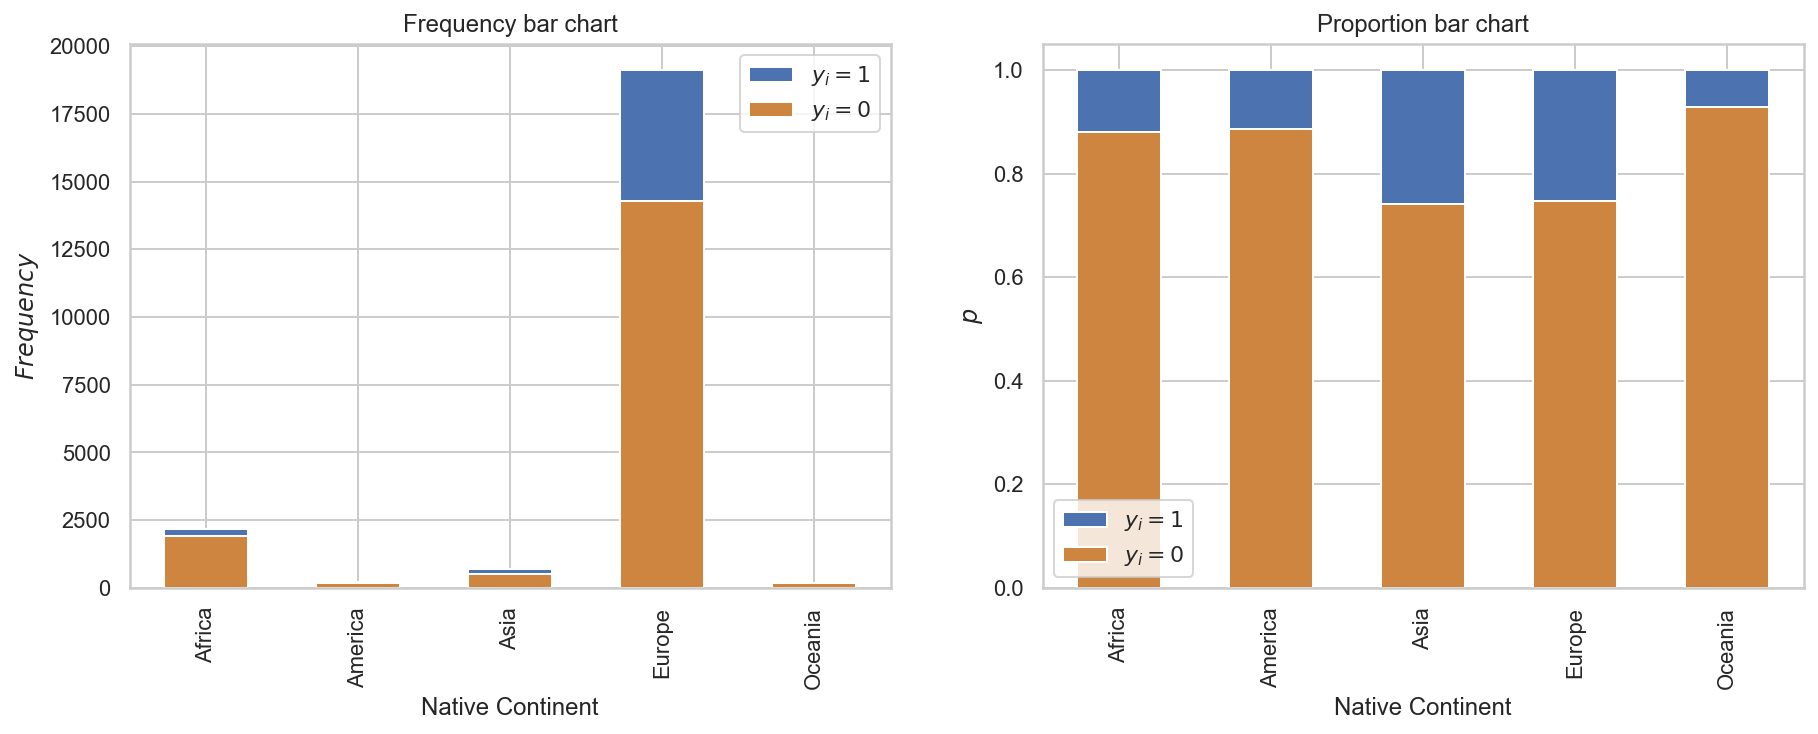

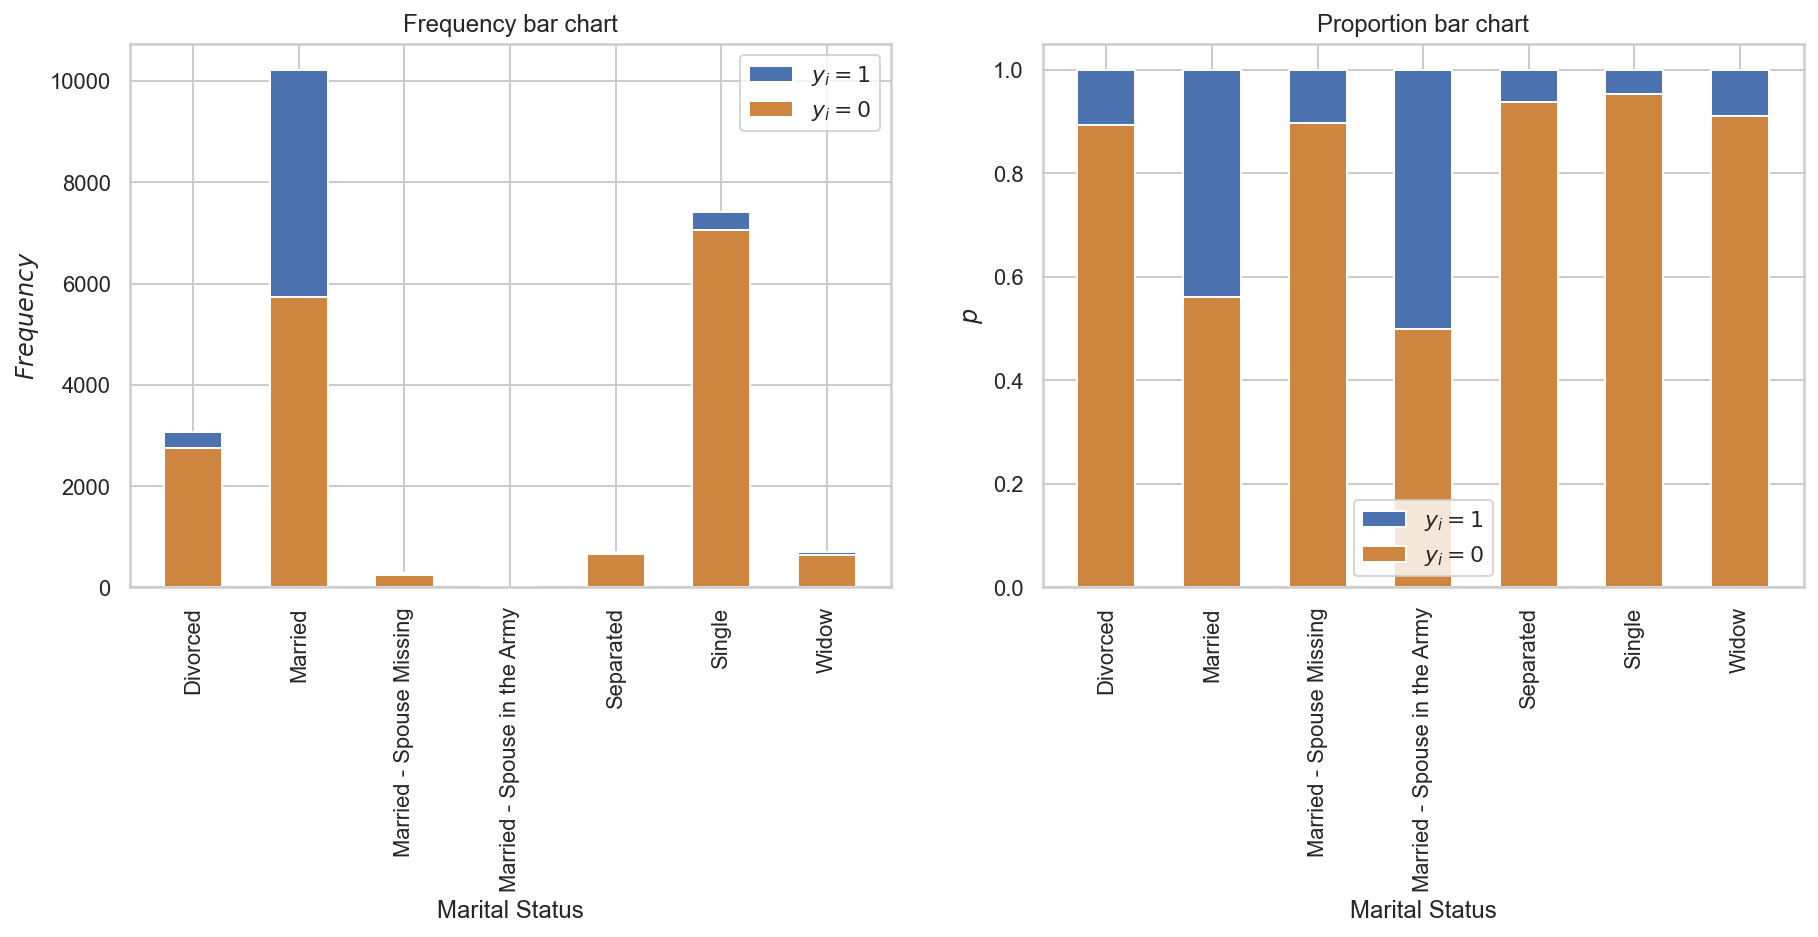

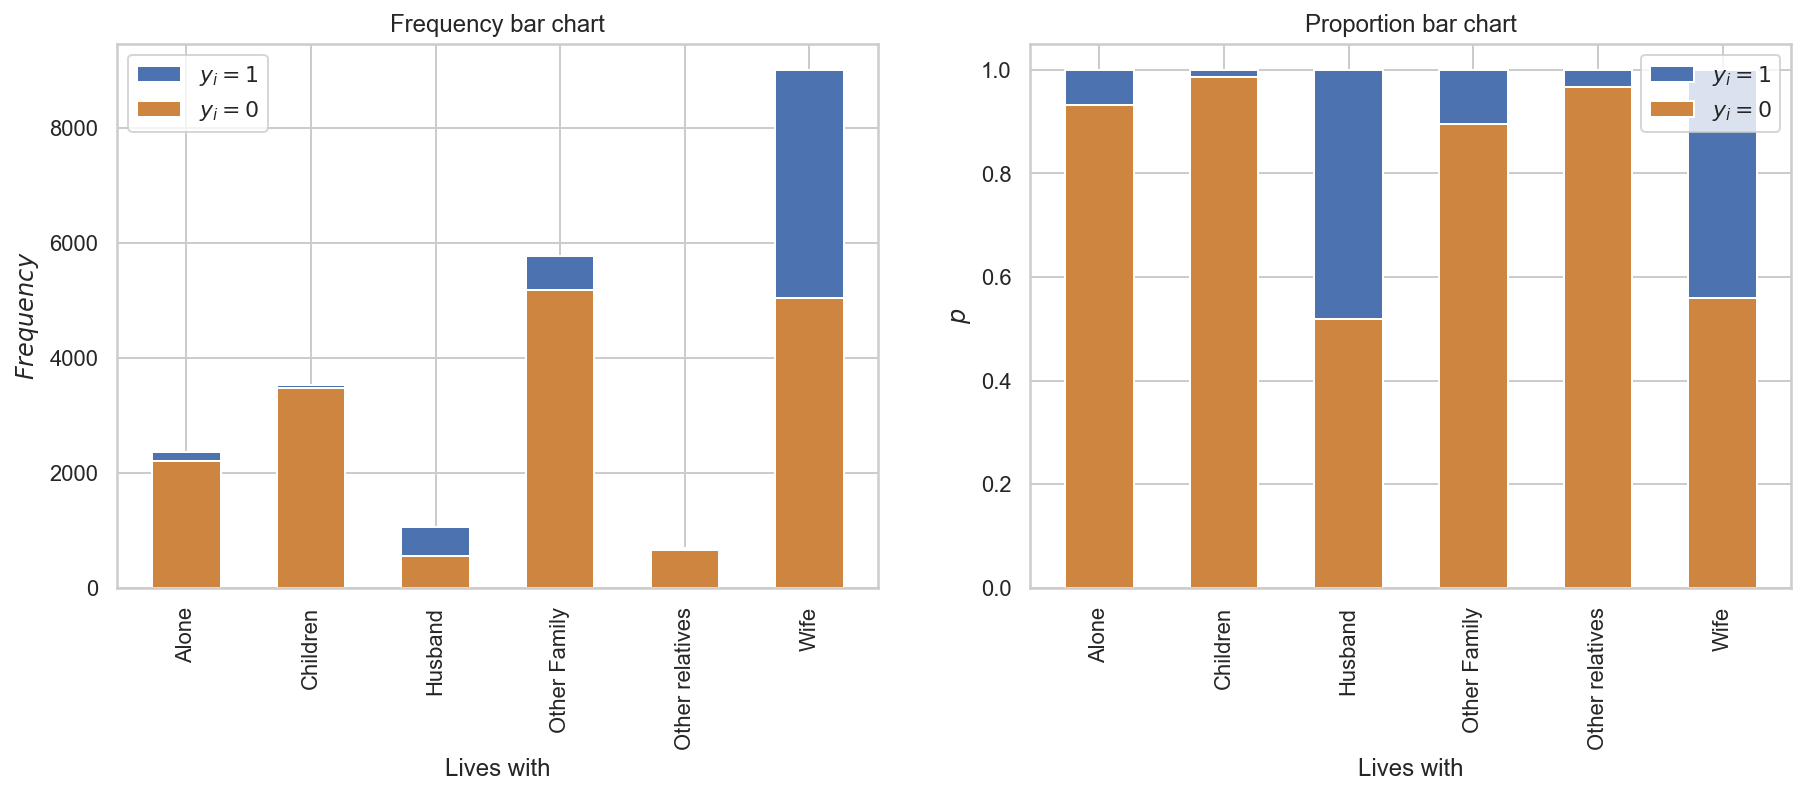

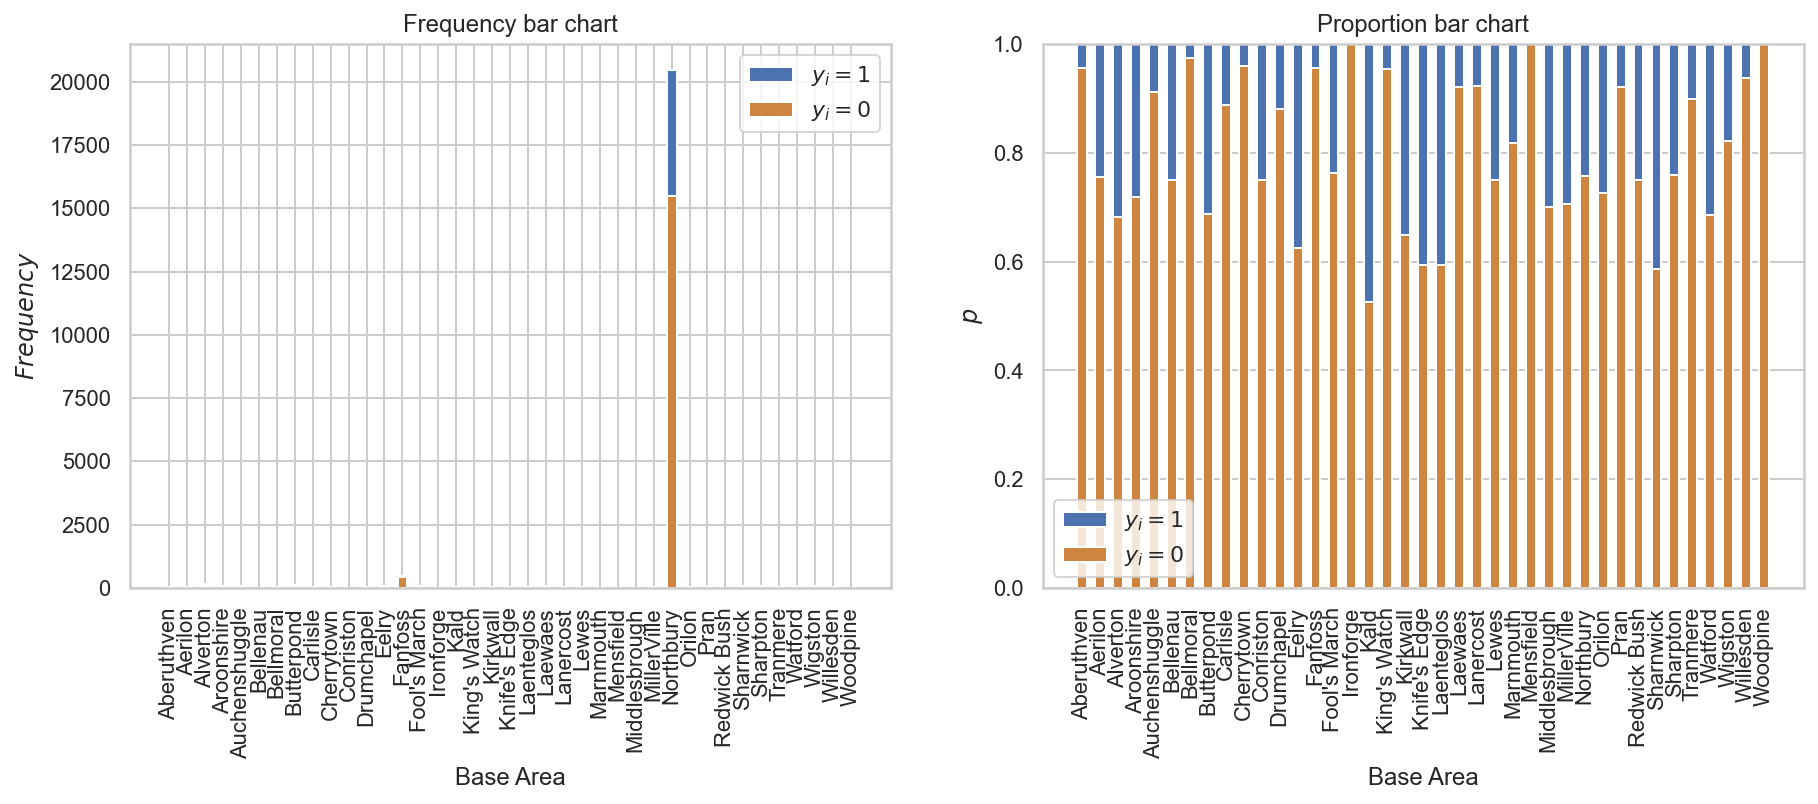

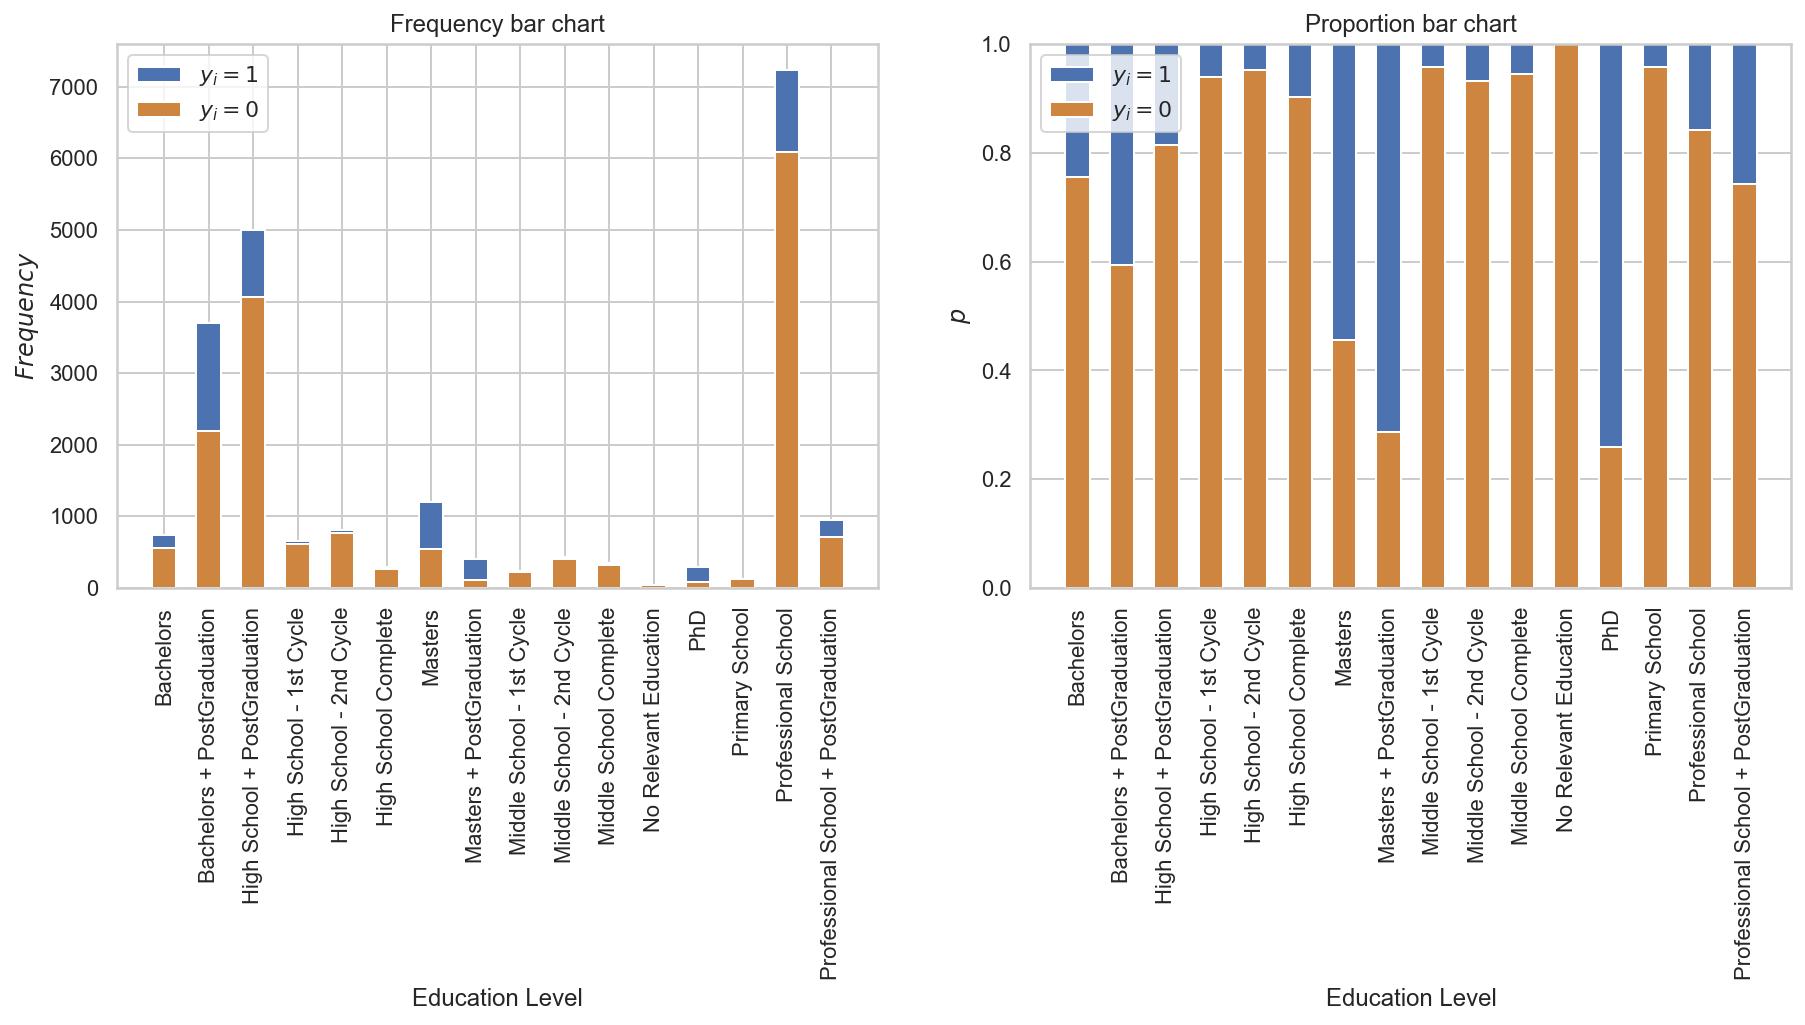

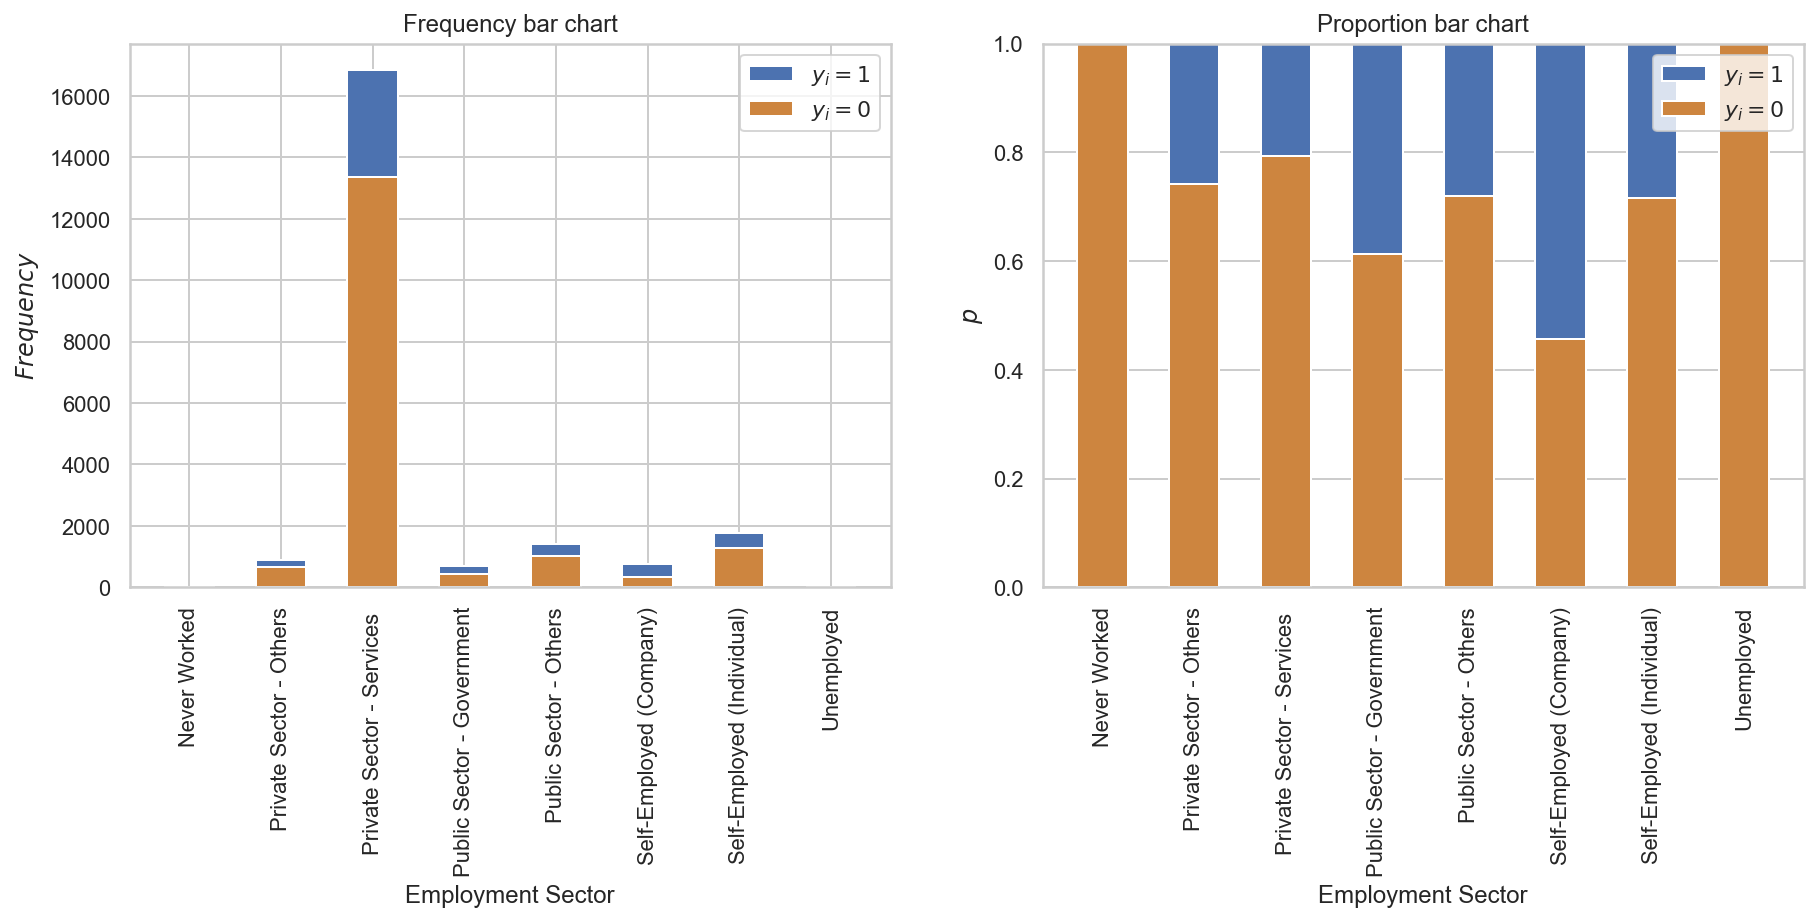

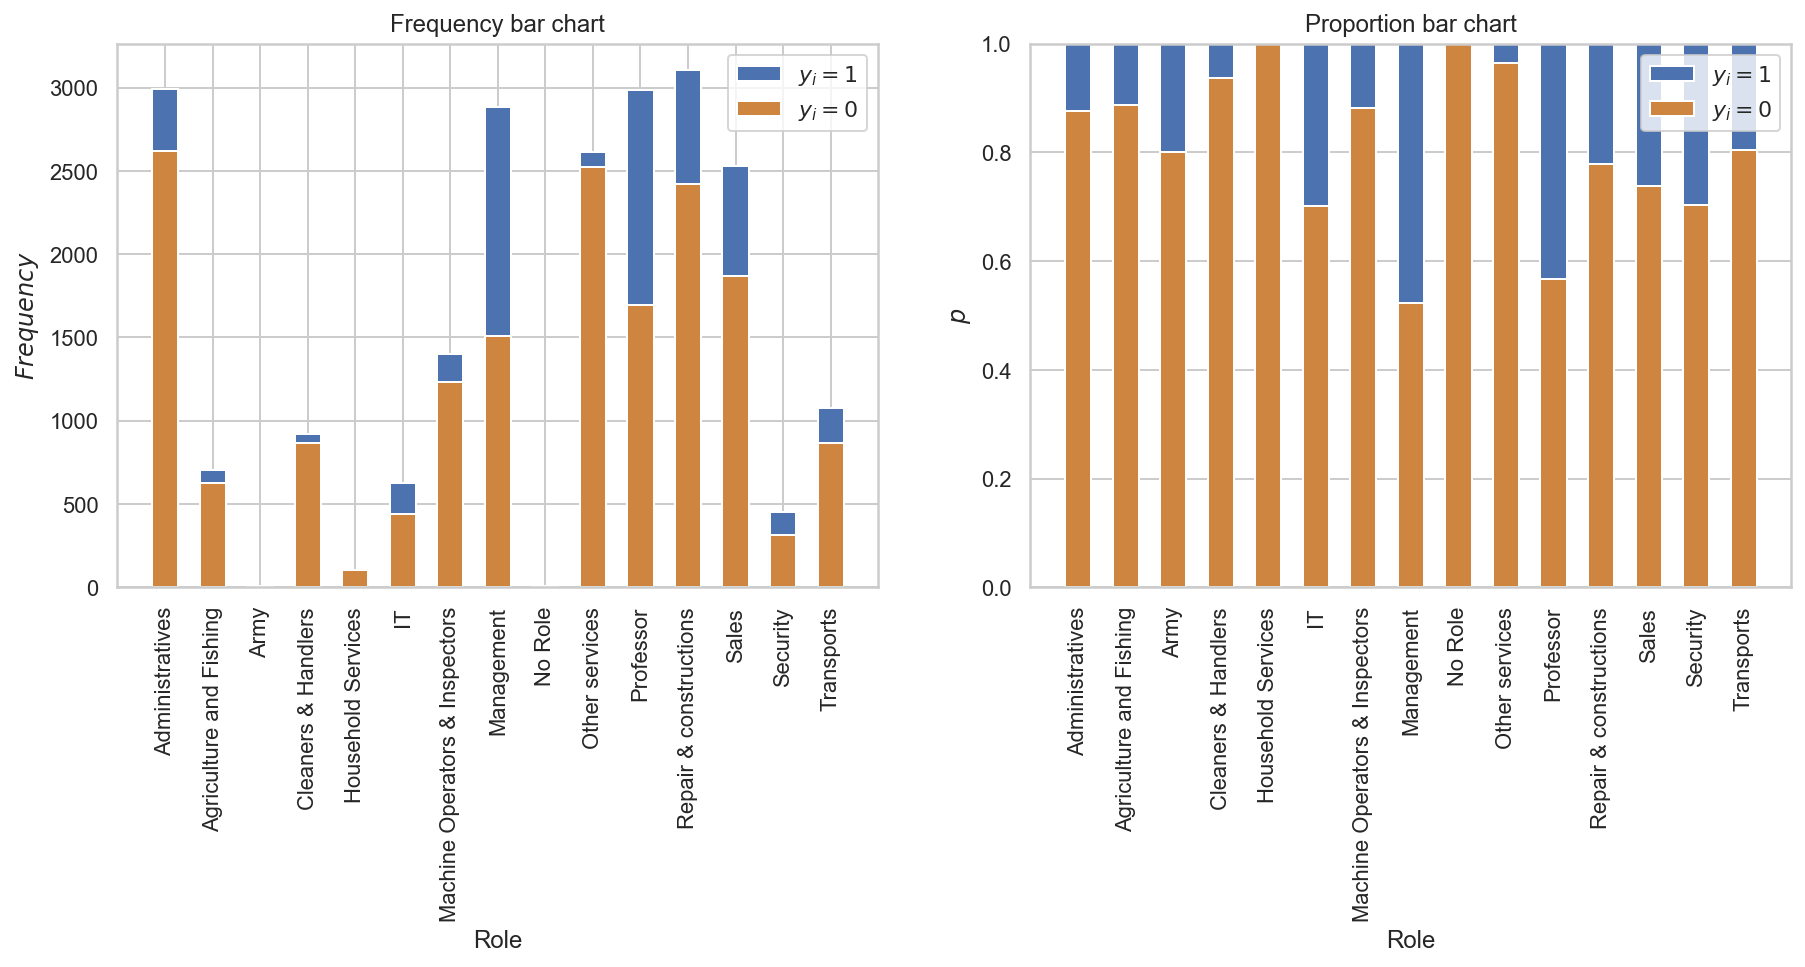

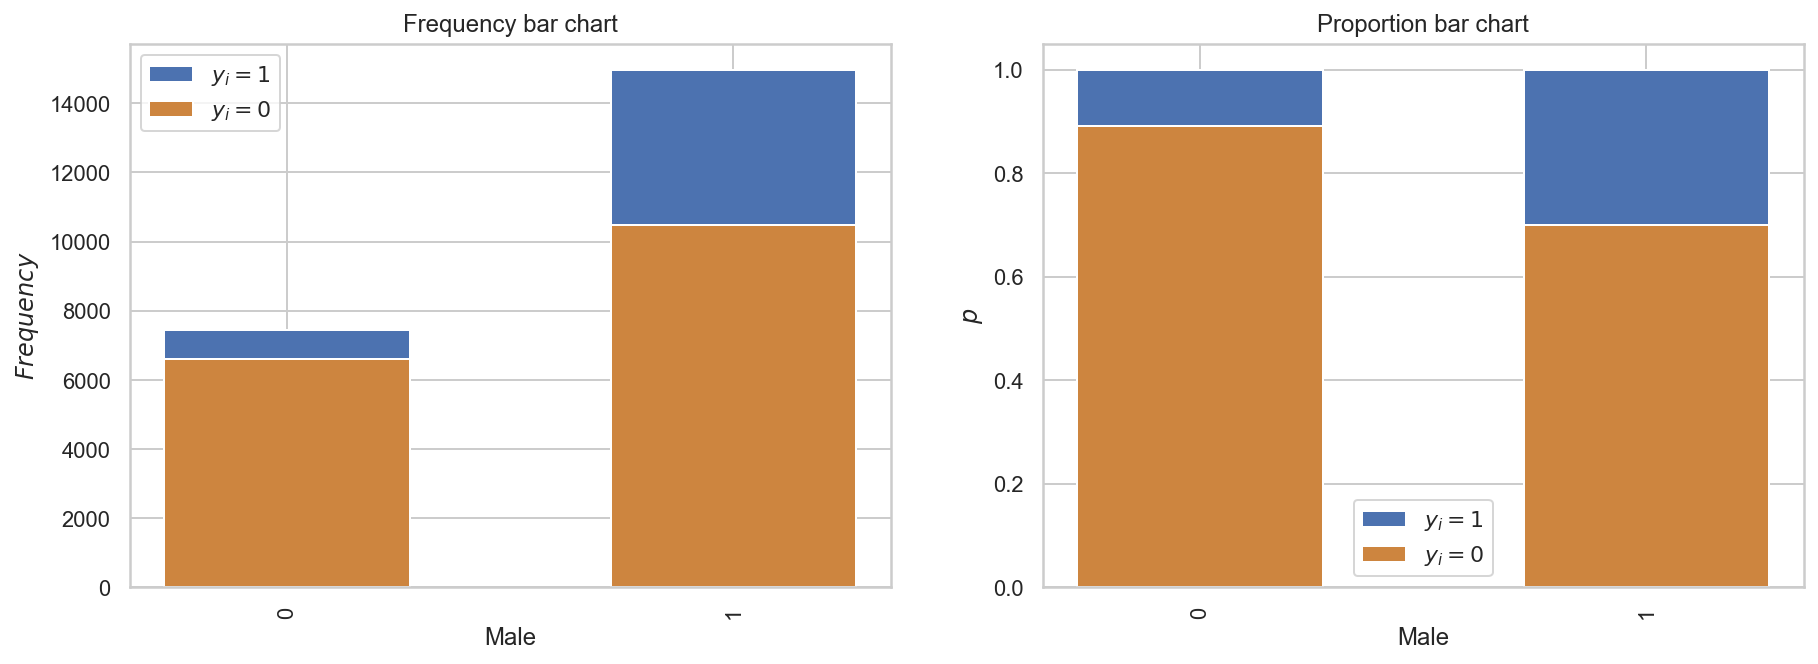

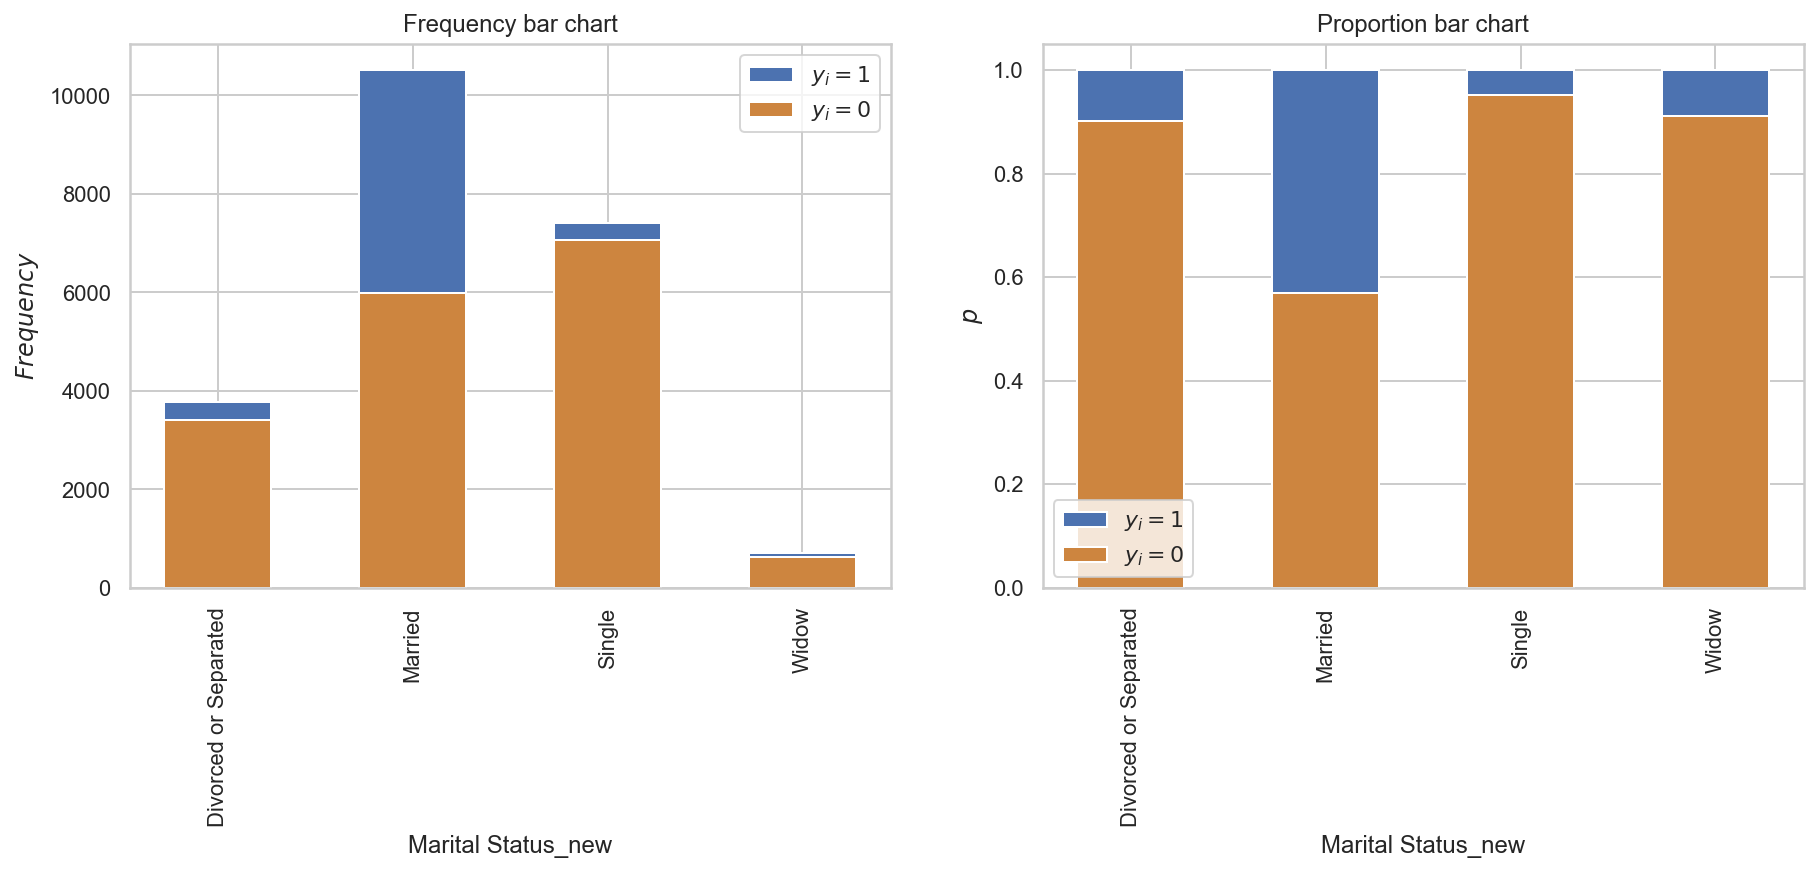

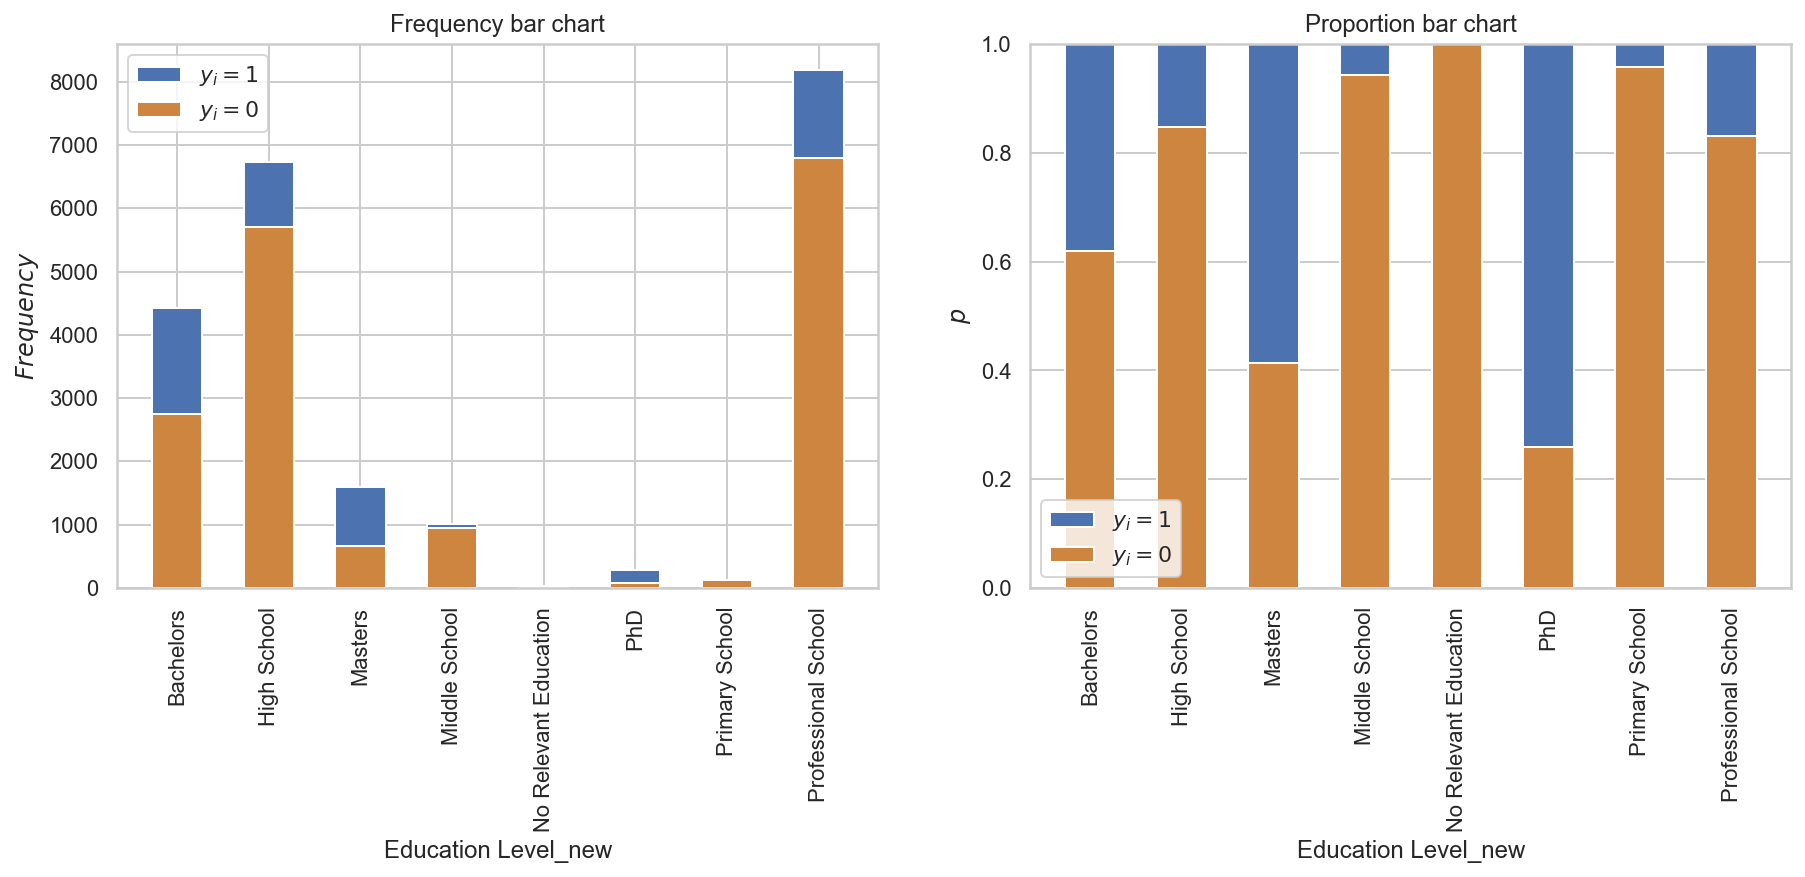

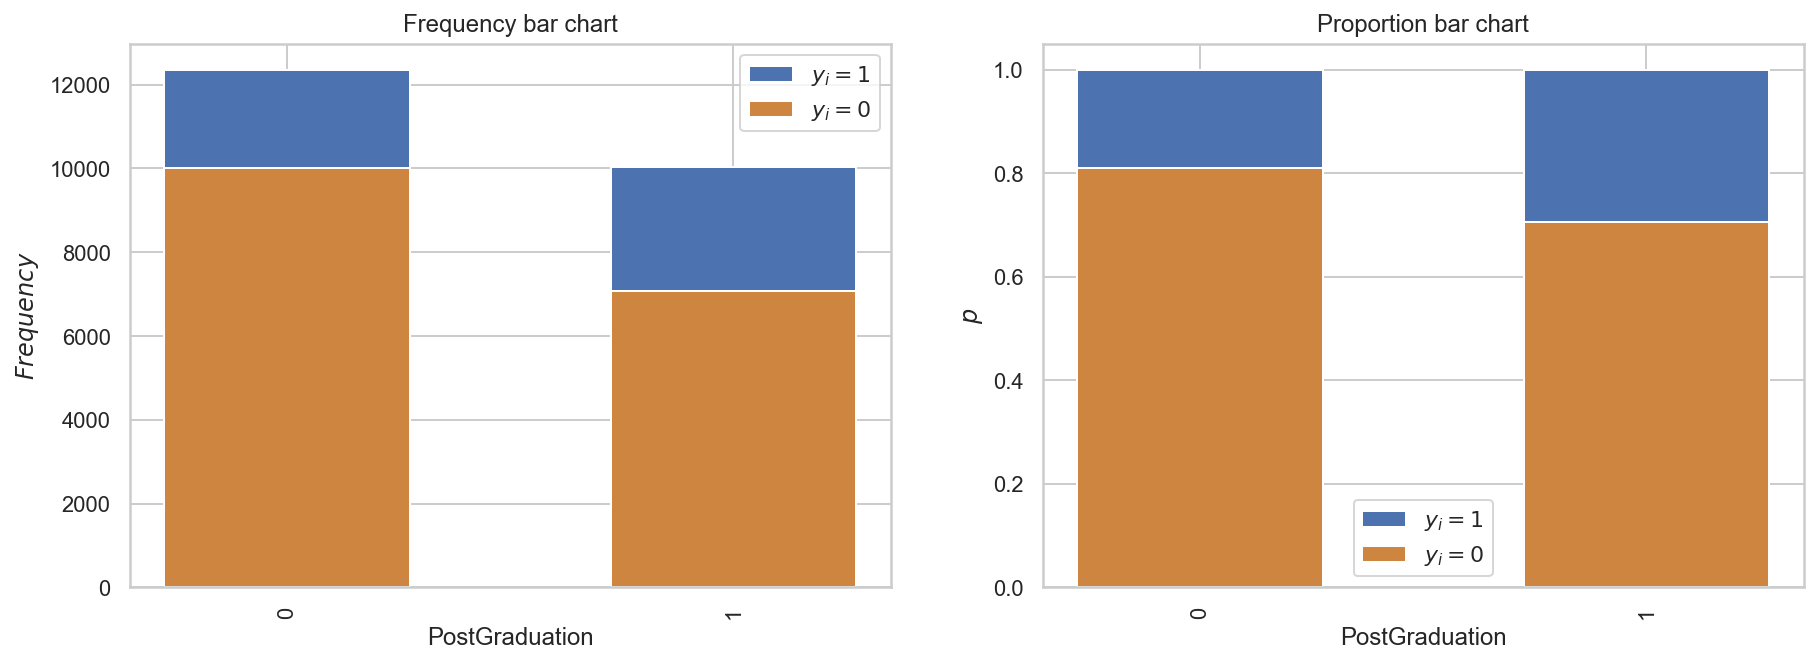

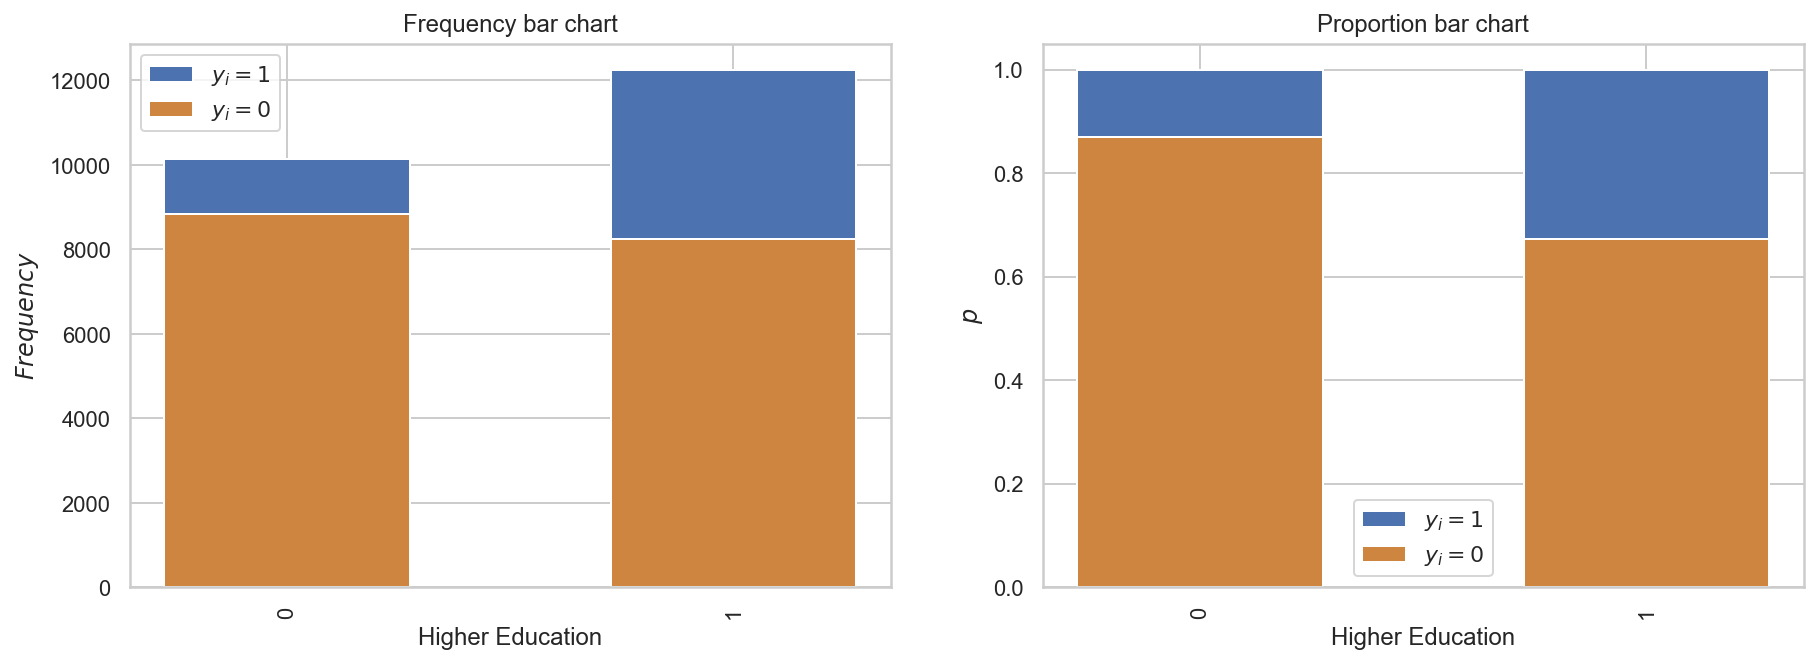

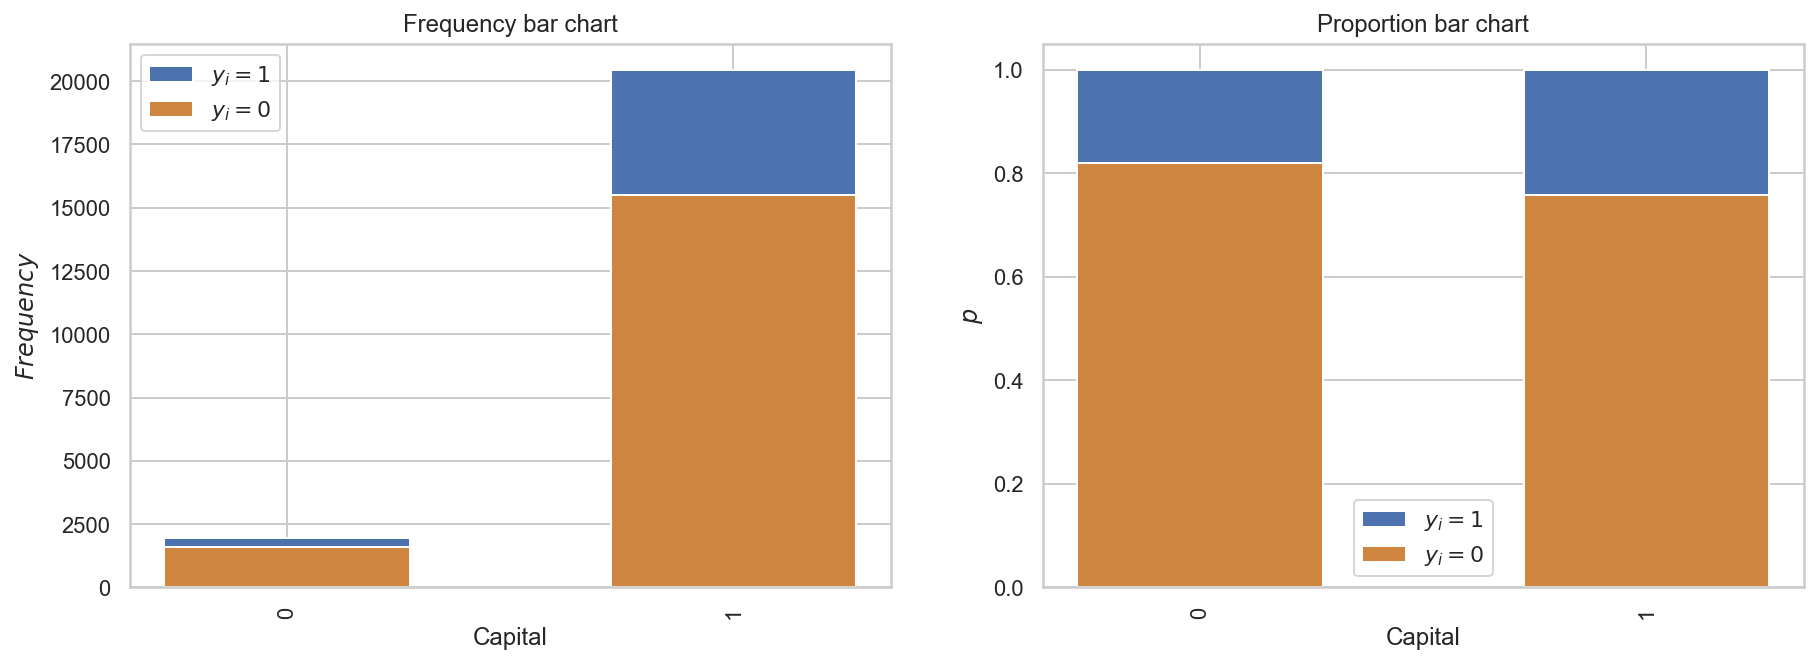

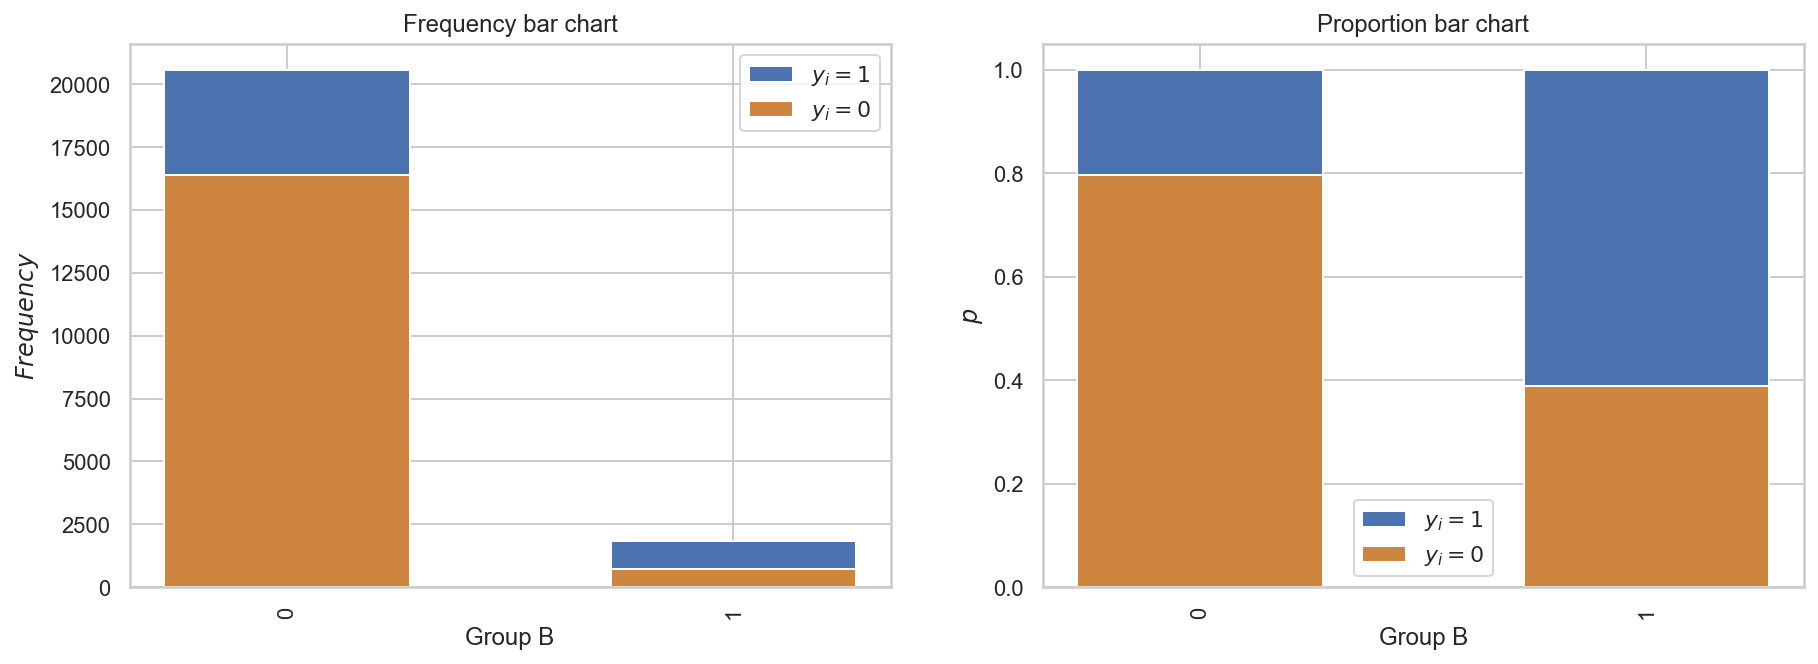

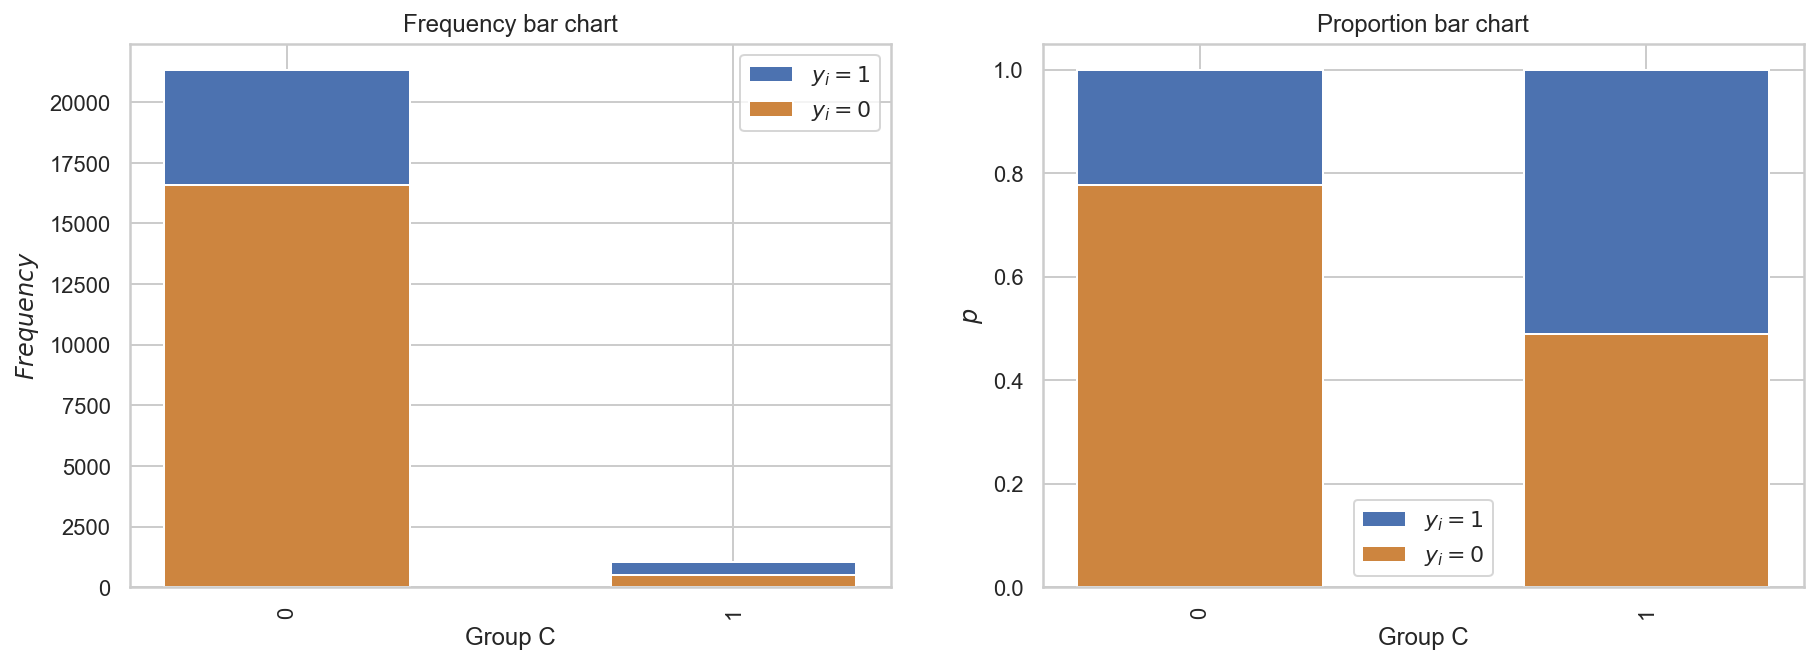

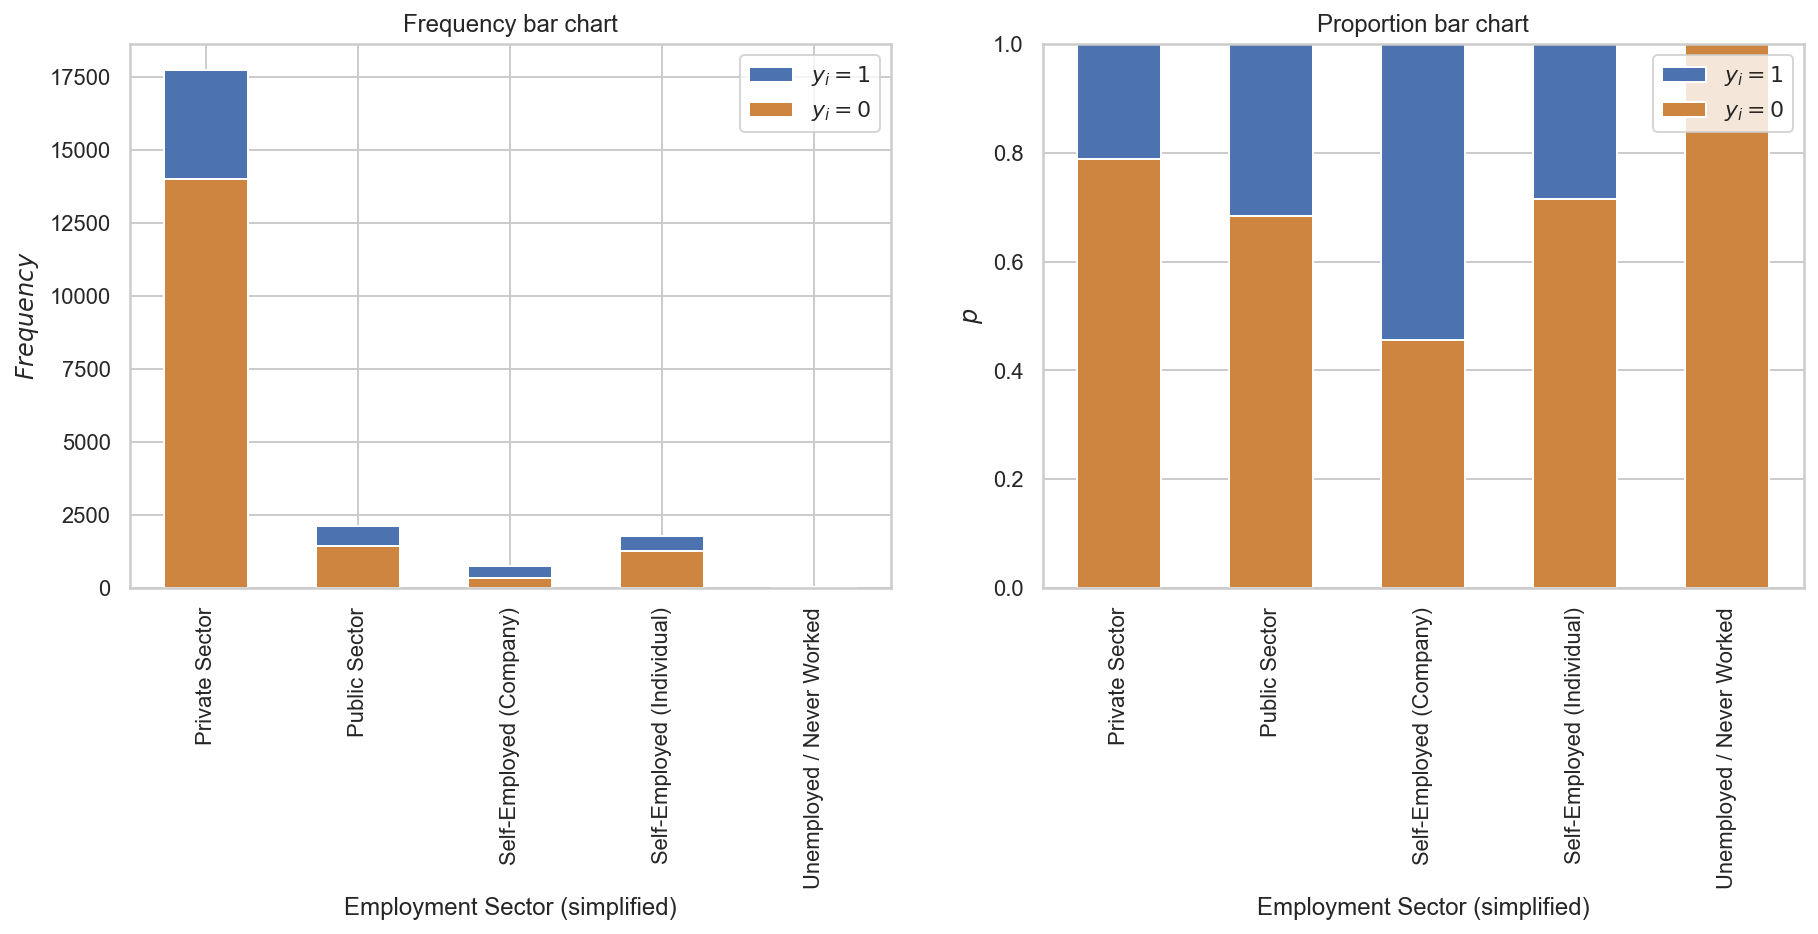

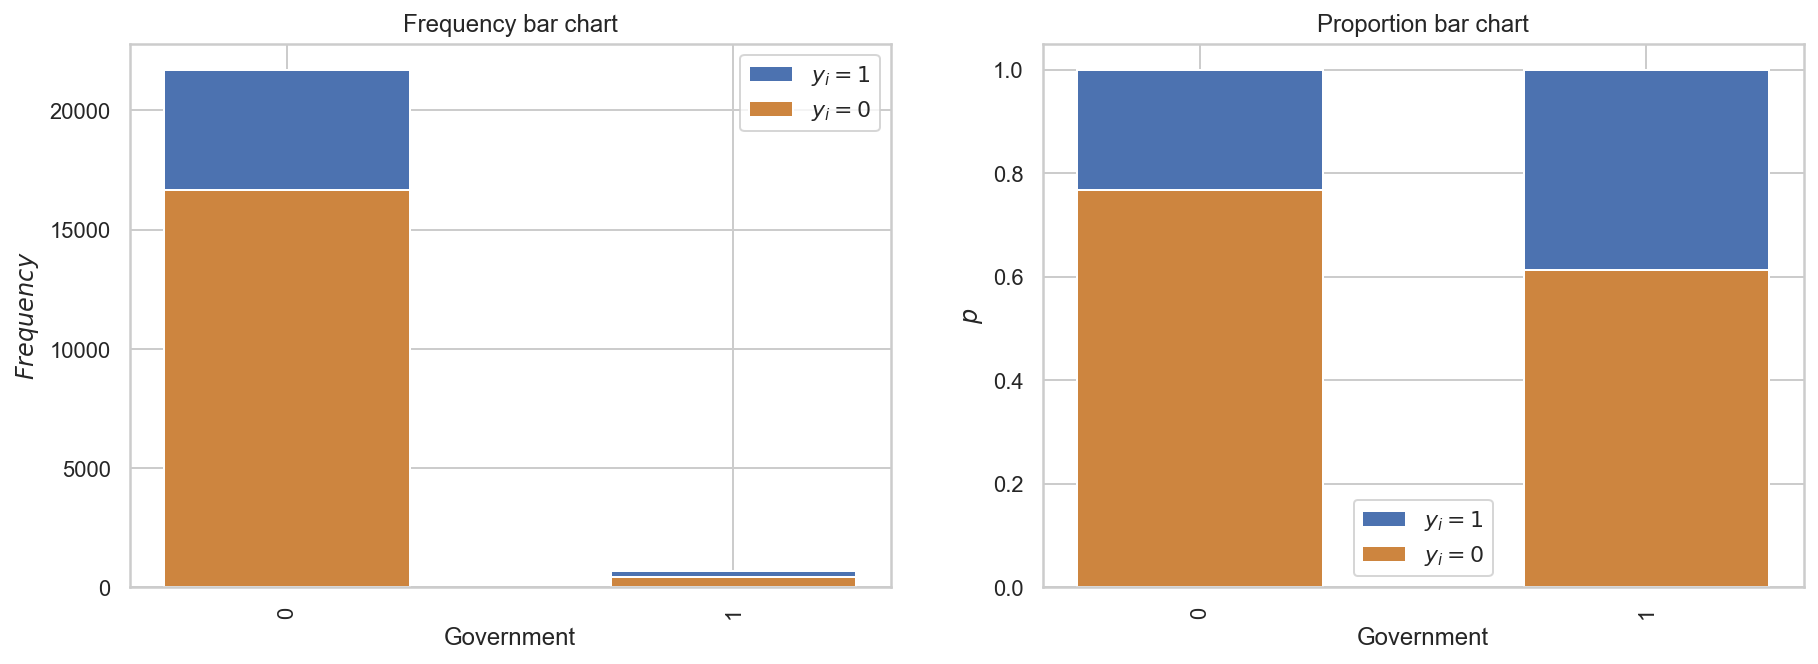

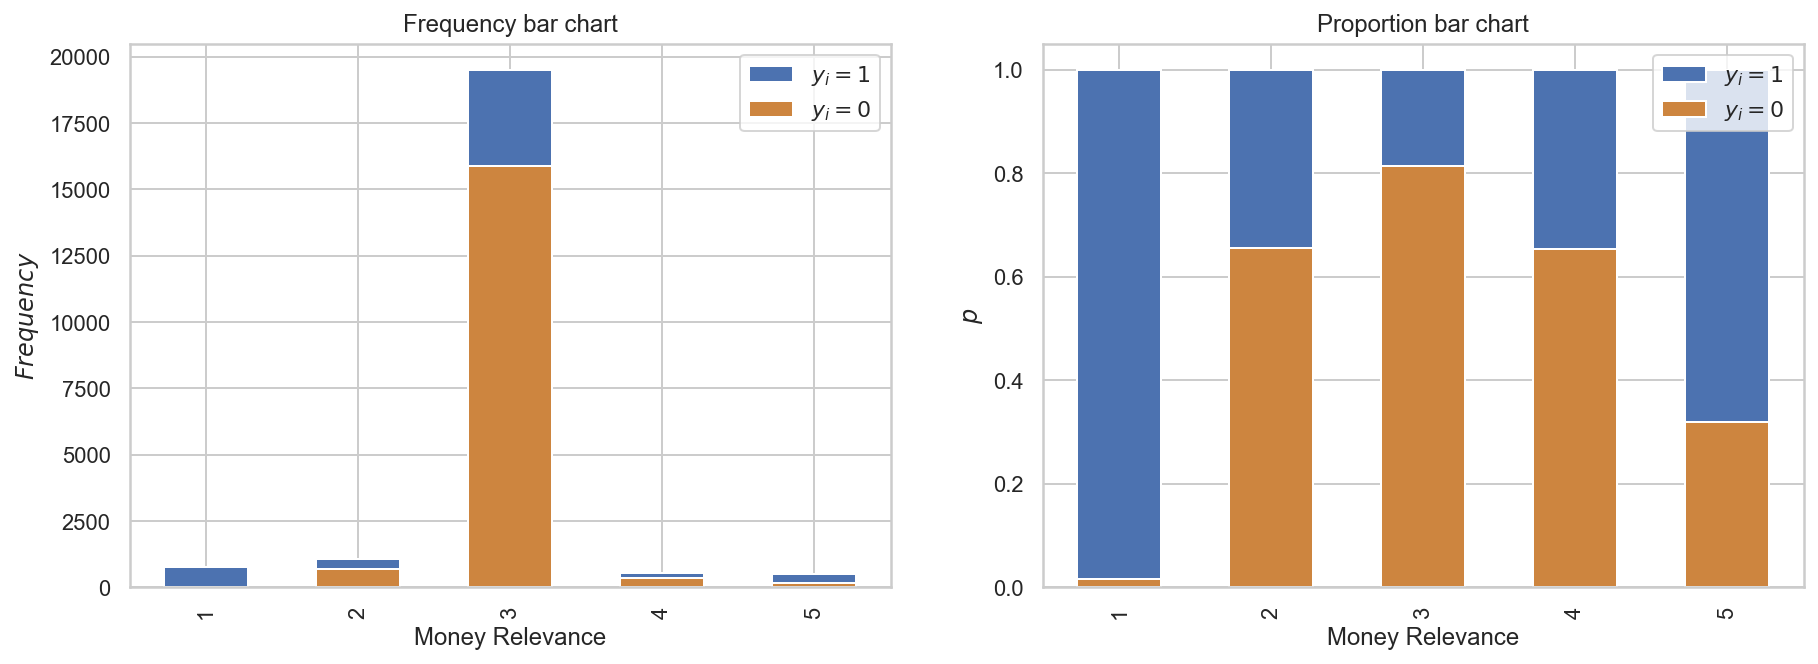

In [88]:
# Check the graphs for each categorical feature
initial_categorical_features = initial_categorical_vars.columns

for i in initial_categorical_features:
    bar_charts_categorical(initial_categorical_vars, i, target)

After analyzing the previous graphs, we concluded that some of the original non-metric variables have many categories, and some are not relevant enough to keep, because they are redundant and do not add useful information and interpretability. This is the case of **Marital Status, Education Level and Employment Sector**. We still kept the variables created during Feature Engineering that "came" from these three.

**Base Area** was dropped because it had dozens of categories and only one actually had many citizens: Northbury. Thus, we decided to keep only the feature Capital.

Finally, **Lives with** was also dropped because it was too redundant with the Marital Status variables, and didn't seem to add any useful information in distinguishing 0s and 1s on the target.

In [89]:
# Drop the features referenced above
df_features = initial_categorical_vars.drop(columns=['Marital Status', 'Lives with', 'Base Area', 
                                                     'Education Level', 'Employment Sector'])

# Same for test
df_features_test = initial_categorical_vars_test.drop(columns=['Marital Status', 'Lives with', 'Base Area', 
                                                               'Education Level', 'Employment Sector'])

df_features.head()

Native Continent                    Role Male Marital Status_new  \
CITIZEN_ID                                                                    
12486                Europe  Repair & constructions    1            Married   
12487                Europe  Repair & constructions    1            Married   
12488                Europe                   Sales    1            Married   
12489                Europe                Security    1            Married   
12490                Europe               Professor    1             Single   

            Education Level_new PostGraduation Higher Education Capital  \
CITIZEN_ID                                                                
12486               High School              1                1       1   
12487       Professional School              0                0       1   
12488       Professional School              0                0       1   
12489               High School              0                0       1   
12490                       PhD              0                1       1   

           Group B Group C Employment Sector (simplified) Government  \
CITIZEN_ID                                                             
12486            0       1                 Private Sector          0   
12487            0       0                  Public Sector          0   
12488            0       1                 Private Sector          0   
12489            1       0                 Private Sector          0   
12490            0       0     Self-Employed (Individual)          0   

           Money Relevance  
CITIZEN_ID                  
12486                    4  
12487                    3  
12488                    4  
12489                    2  
12490                    3

**Encoding the non-metric features:**

In [90]:
pd.set_option('display.max_columns', None)

# Some variables are already binary and shouldn't be One Hot Encoded
df_ohc = df_features.drop(columns=['Male', 'Higher Education', 'Capital', 'Group B', 'Group C', 
                                   'PostGraduation','Government']).copy()
# Use OneHotEncoder to encode the non-metric features. Get feature names and create a DataFrame
# with the one-hot encoded non-metric features (pass feature names)
ohc = OneHotEncoder(sparse=False, dtype=int)
ohc_feat = ohc.fit_transform(df_ohc)
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)

# Same for test
df_ohc_test = df_features_test.drop(columns=['Male', 'Higher Education', 'Capital', 'Group B', 'Group C', 
                                             'PostGraduation','Government']).copy()
ohc_test = OneHotEncoder(sparse=False, dtype=int)
ohc_feat_test = ohc_test.fit_transform(df_ohc_test)
ohc_feat_names_test = ohc.get_feature_names()
ohc_df_test = pd.DataFrame(ohc_feat_test, index=df_ohc_test.index, columns=ohc_feat_names_test)

ohc_df

x0_Africa  x0_America  x0_Asia  x0_Europe  x0_Oceania  \
CITIZEN_ID                                                          
12486               0           0        0          1           0   
12487               0           0        0          1           0   
12488               0           0        0          1           0   
12489               0           0        0          1           0   
12490               0           0        0          1           0   
...               ...         ...      ...        ...         ...   
34881               0           0        0          1           0   
34882               0           0        0          1           0   
34883               0           0        0          1           0   
34884               0           0        0          1           0   
34885               0           0        1          0           0   

            x1_Administratives  x1_Agriculture and Fishing  x1_Army  \
CITIZEN_ID                                                            
12486                        0                           0        0   
12487                        0                           0        0   
12488                        0                           0        0   
12489                        0                           0        0   
12490                        0                           0        0   
...                        ...                         ...      ...   
34881                        0                           0        0   
34882                        0                           0        0   
34883                        0                           0        0   
34884                        0                           0        0   
34885                        0                           0        0   

            x1_Cleaners & Handlers  x1_Household Services  x1_IT  \
CITIZEN_ID                                                         
12486                            0                      0      0   
12487                            0                      0      0   
12488                            0                      0      0   
12489                            0                      0      0   
12490                            0                      0      0   
...                            ...                    ...    ...   
34881                            1                      0      0   
34882                            0                      0      0   
34883                            0                      0      0   
34884                            0                      0      0   
34885                            0                      0      0   

            x1_Machine Operators & Inspectors  x1_Management  x1_No Role  \
CITIZEN_ID                                                                 
12486                                       0              0           0   
12487                                       0              0           0   
12488                                       0              0           0   
12489                                       0              0           0   
12490                                       0              0           0   
...                                       ...            ...         ...   
34881                                       0              0           0   
34882                                       0              0           0   
34883                                       0              0           0   
34884                                       0              0           0   
34885                                       0              0           0   

            x1_Other services  x1_Professor  x1_Repair & constructions  \
CITIZEN_ID                                                               
12486                       0             0                          1   
12487                       0             0                          1   
12488               

We will now assess the feature importance of all binaries gotten in the encoding, with a decision tree, to check the classes with the lowest feature importance on each non-metric feature. We also checked the previous bar plots, on the beggining of the Feature Selection stage, to better visualize the frequency and proportion of each class.

This is done because if we use the drop='first' on OneHotEncoder, many important classes are dropped (e.g. level 1 on Money Relevance), so we will manually drop one class per variable.

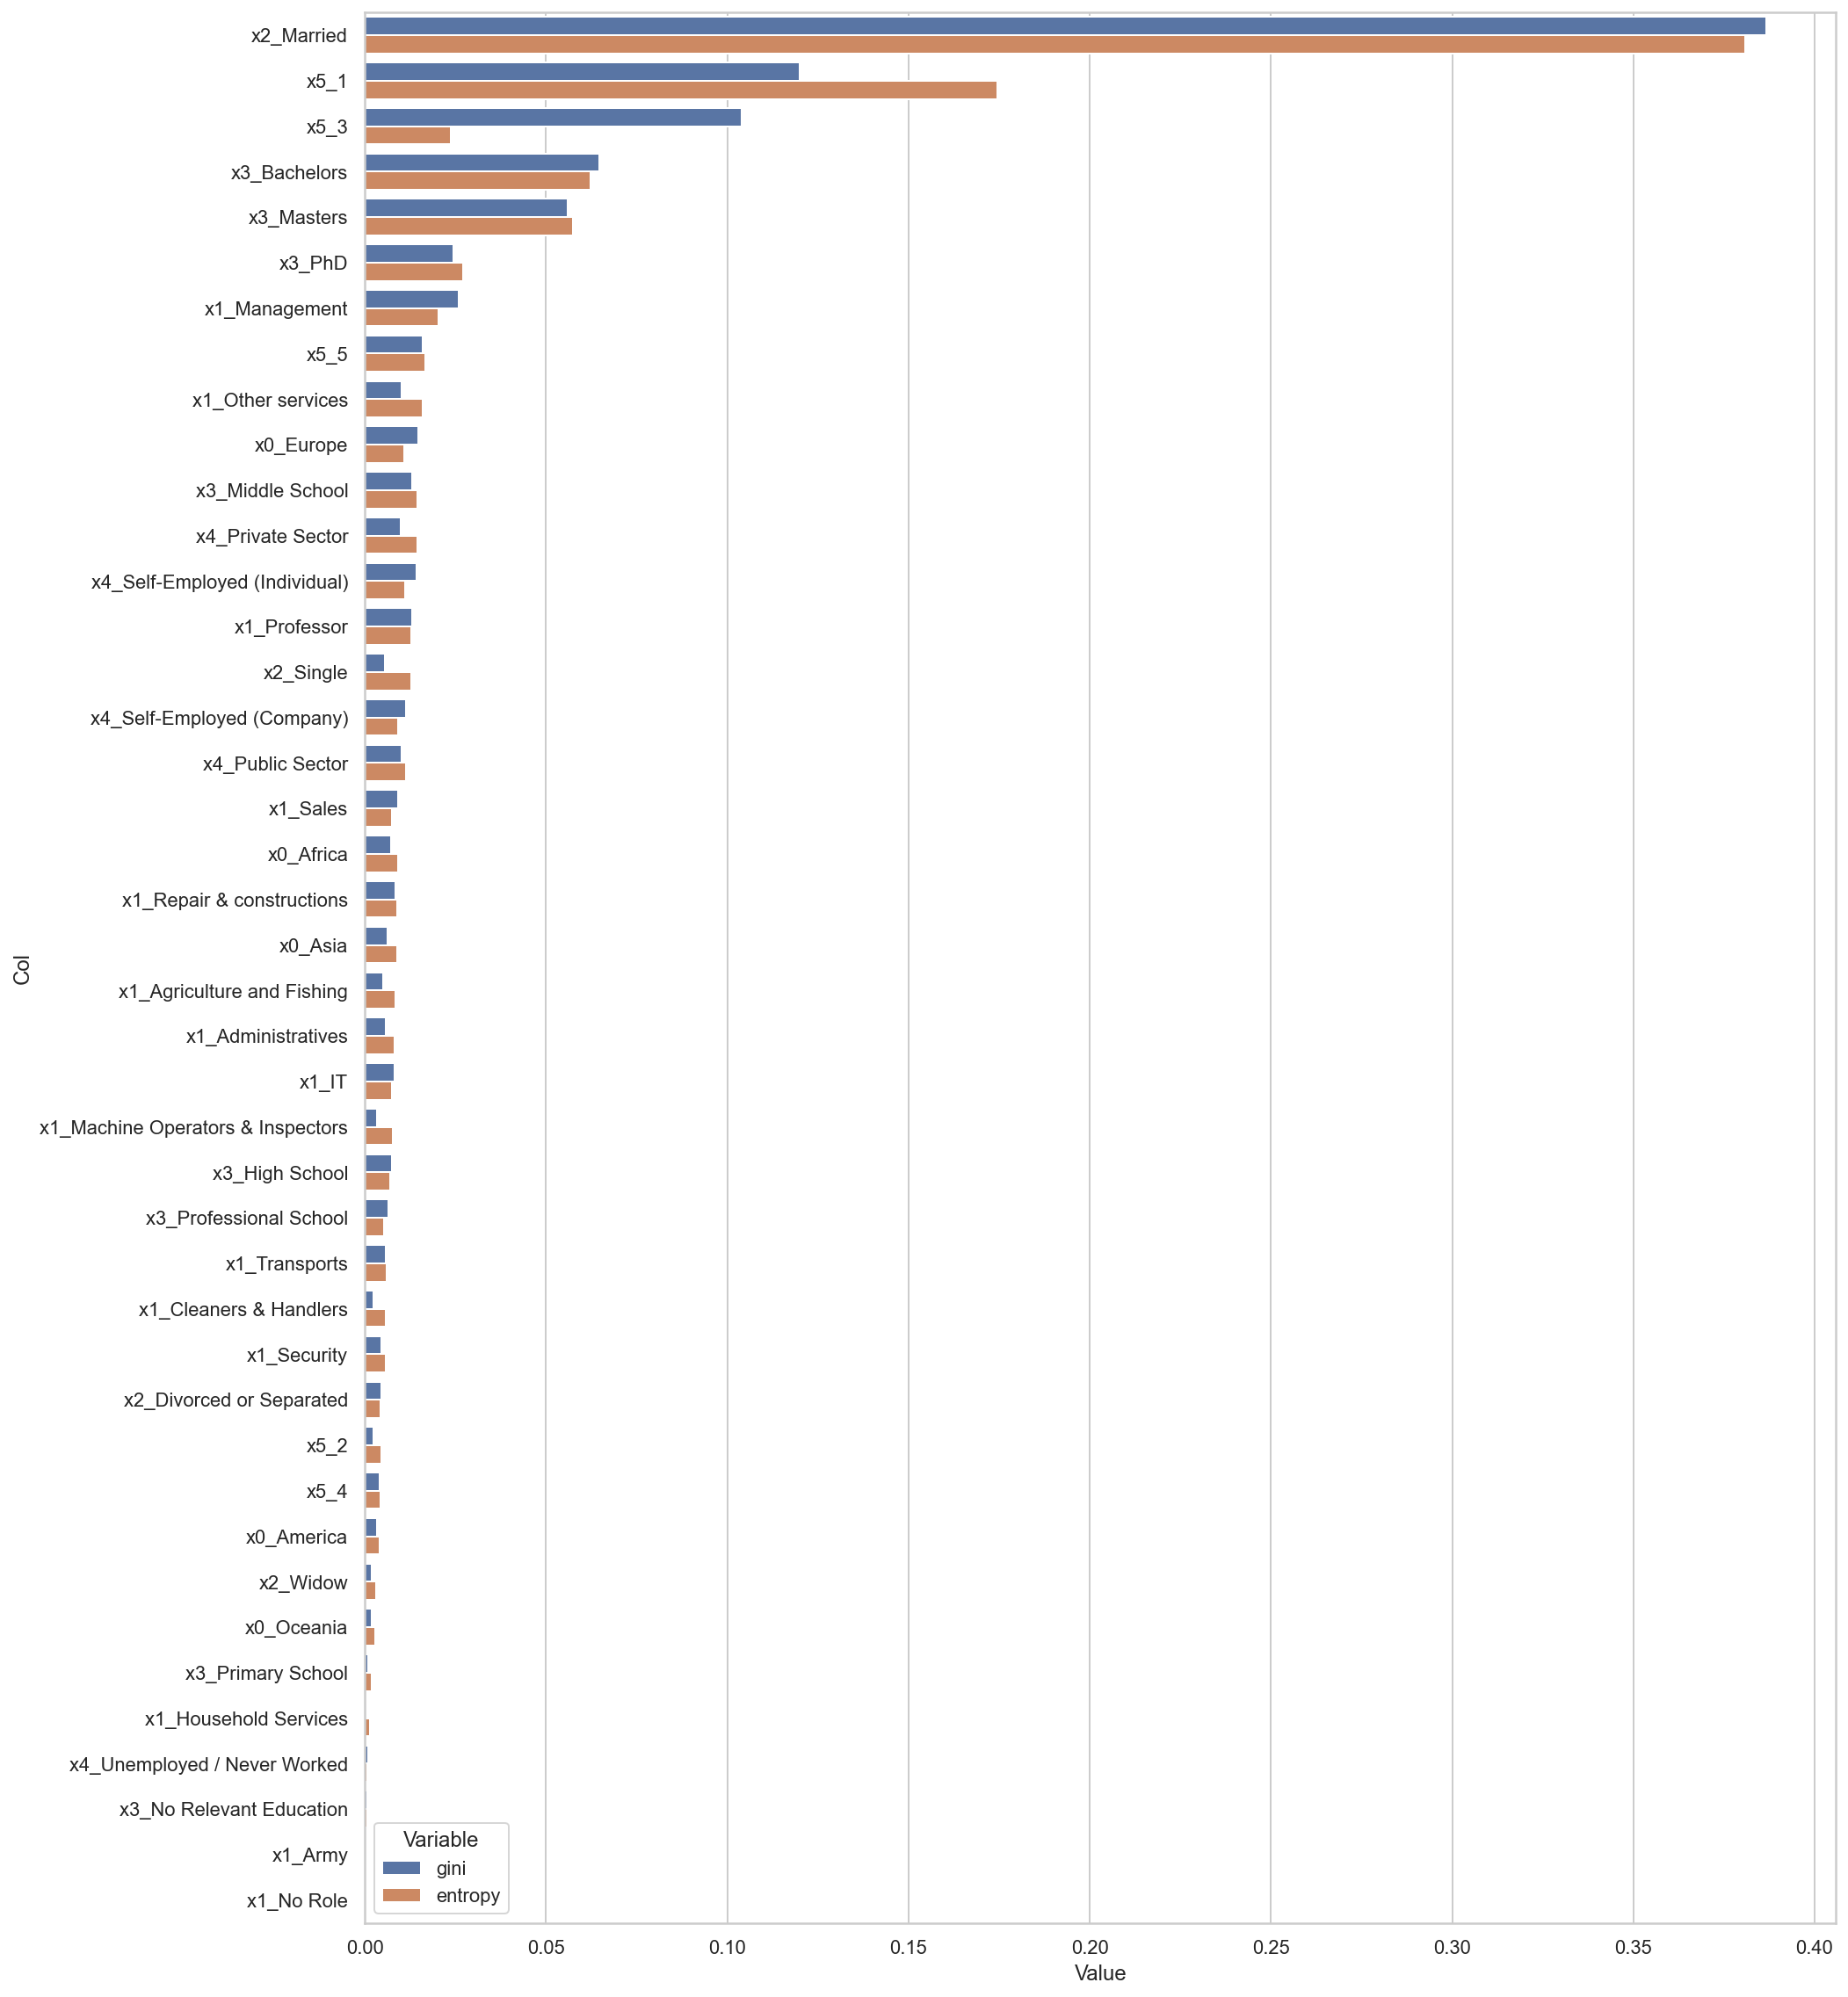

In [91]:
# Feature importance using the split criteria 'Gini'
gini_importance = DecisionTreeClassifier().fit(ohc_df, target).feature_importances_

# Feature importance using the split criteria 'Entropy'
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(ohc_df, target).feature_importances_

# Plotting the feature importances for both criteria
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = ohc_df.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,20))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [92]:
# Drop the "worst" class of each feature
ohc_df.drop(columns=['x0_Oceania', 'x1_No Role', 'x2_Widow', 'x3_No Relevant Education', 
                     'x4_Unemployed / Never Worked', 'x5_4'], inplace=True)

In [93]:
# Reassigning df to contain ohc variables
non_metric_binary = pd.concat([df_features.drop(columns=df_ohc.columns), ohc_df], axis=1)
non_metric_binary.head()

Male PostGraduation Higher Education Capital Group B Group C  \
CITIZEN_ID                                                                
12486         1              1                1       1       0       1   
12487         1              0                0       1       0       0   
12488         1              0                0       1       0       1   
12489         1              0                0       1       1       0   
12490         1              0                1       1       0       0   

           Government  x0_Africa  x0_America  x0_Asia  x0_Europe  \
CITIZEN_ID                                                         
12486               0          0           0        0          1   
12487               0          0           0        0          1   
12488               0          0           0        0          1   
12489               0          0           0        0          1   
12490               0          0           0        0          1   

            x1_Administratives  x1_Agriculture and Fishing  x1_Army  \
CITIZEN_ID                                                            
12486                        0                           0        0   
12487                        0                           0        0   
12488                        0                           0        0   
12489                        0                           0        0   
12490                        0                           0        0   

            x1_Cleaners & Handlers  x1_Household Services  x1_IT  \
CITIZEN_ID                                                         
12486                            0                      0      0   
12487                            0                      0      0   
12488                            0                      0      0   
12489                            0                      0      0   
12490                            0                      0      0   

            x1_Machine Operators & Inspectors  x1_Management  \
CITIZEN_ID                                                     
12486                                       0              0   
12487                                       0              0   
12488                                       0              0   
12489                                       0              0   
12490                                       0              0   

            x1_Other services  x1_Professor  x1_Repair & constructions  \
CITIZEN_ID                                                               
12486                       0             0                          1   
12487                       0             0                          1   
12488                       0             0                          0   
12489                       0             0                          0   
12490                       0             1                          0   

            x1_Sales  x1_Security  x1_Transports  x2_Divorced or Separated  \
CITIZEN_ID                                                                   
12486              0            0              0                         0   
12487              0            0              0                         0   
12488              1            0              0                         0   
12489              0            1              0                         0   
12490              0            0              0                         0   

            x2_Married  x2_Single  x3_Bachelors  x3_High School  x3_Masters  \
CITIZEN_ID                                                                    
12486                1          0             0               1           0   
12487                1          0             0               0           0   
12488                1          0             0               0           0   
12489                1          0             0               1           0   
12490                0          1           

In [94]:
# Change the 'object' binaries to 'int'
non_metric_binary.loc[:, np.array(non_metric_binary.dtypes=="object")] = non_metric_binary.loc[:, np.array(non_metric_binary.dtypes=="object")].astype(int)

#### Feature importance with Decision Trees

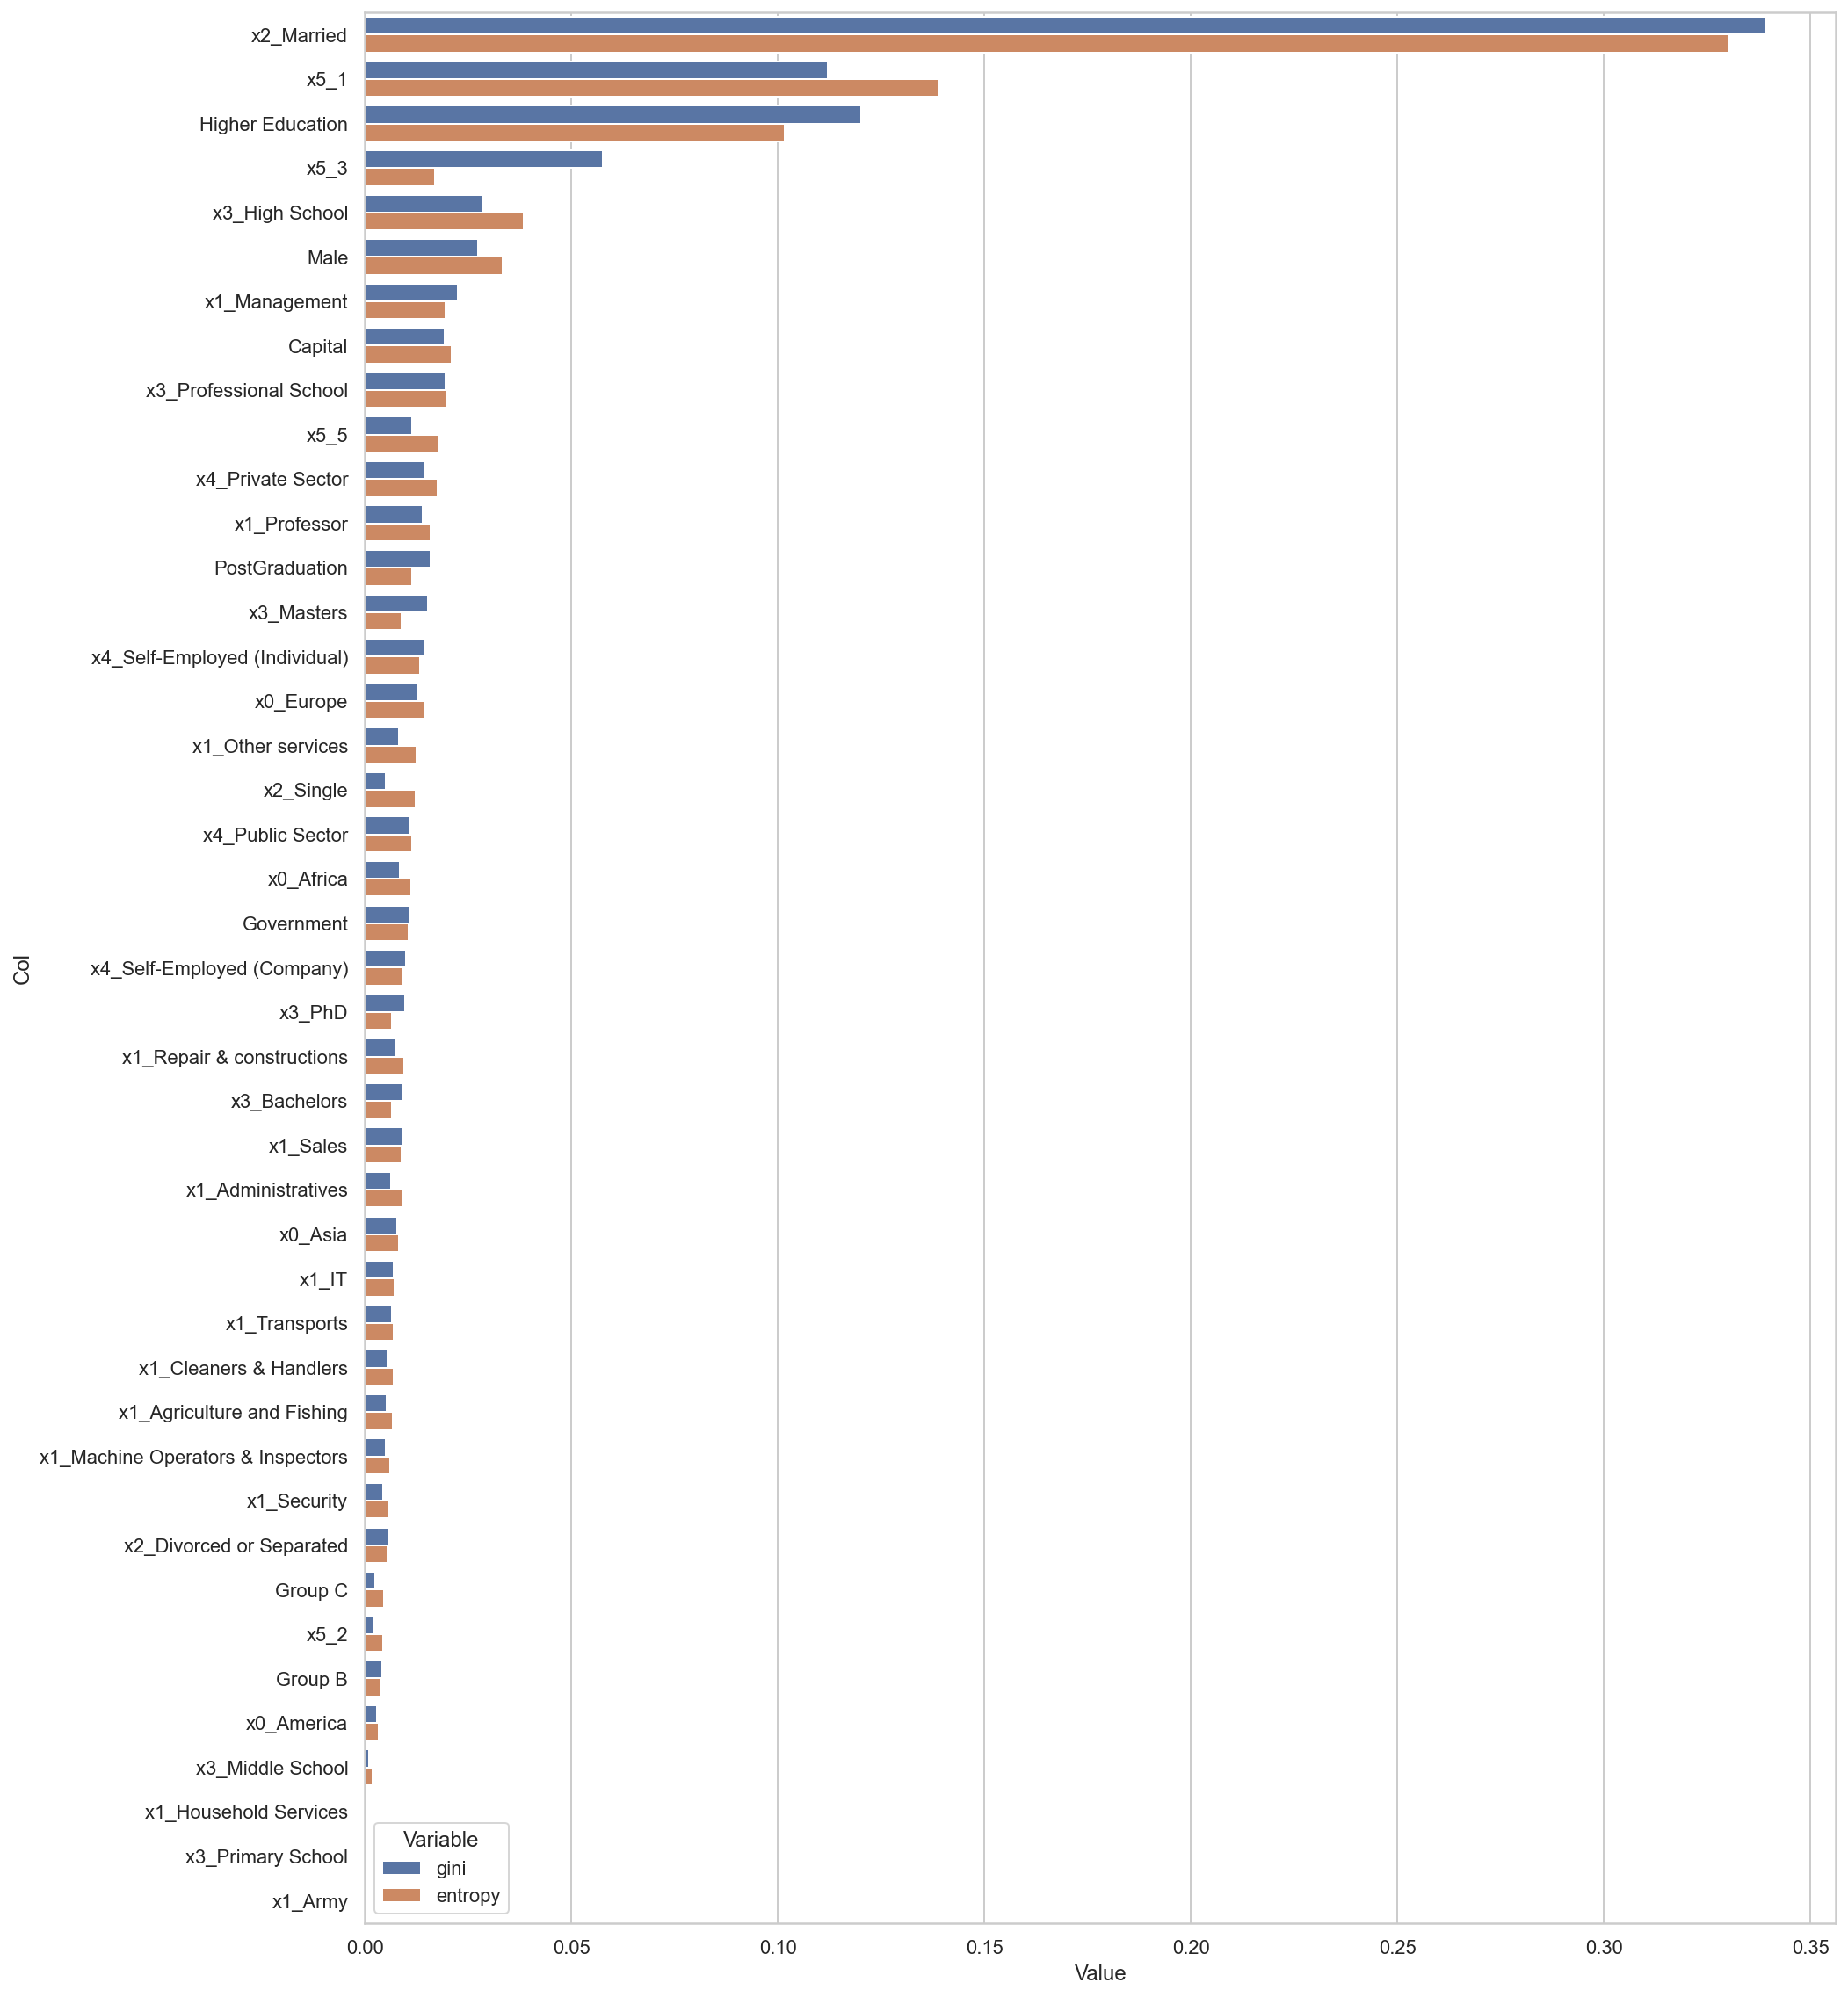

In [95]:
# Feature importance using the split criteria 'Gini'
gini_importance = DecisionTreeClassifier().fit(non_metric_binary, target).feature_importances_

# Feature importance using the split criteria 'Entropy'
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(non_metric_binary, target).feature_importances_

# Plotting the feature importances for both criteria
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = non_metric_binary.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,20))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

Ranking on this method:
1. x2_Married
2. x5_1
3. Higher Education
4. x5_3
5. x3_High School
6. Male
7. x1_Management
8. x3_Professional School
9. Capital
10. x5_5
11. x4_Private Sector
12. PostGraduation
13. x0_Europe

#### Feature importances with Random Forest

In [96]:
# Random forest instance, indicating the number of trees
rf = RandomForestClassifier(n_estimators = 100, random_state=0, n_jobs=-1)

sel = SelectFromModel(rf)

# SelectFromModel object from sklearn to automatically select the features
sel.fit(non_metric_binary, target)

# Features with an importance greater than the mean importance of all the features
sel.get_support()

array([ True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False])

In [97]:
rf.fit(non_metric_binary, target)

# Ranking by feature importances
df_imp = pd.DataFrame(rf.feature_importances_, non_metric_binary.columns).reset_index().rename(columns={'index':'binary_variables', 0:'feature_importance'})
df_imp.sort_values('feature_importance', ascending=False)

binary_variables  feature_importance
26                         x2_Married            0.172748
39                               x5_1            0.086201
27                          x2_Single            0.077245
41                               x5_3            0.053724
0                                Male            0.045061
2                    Higher Education            0.044542
18                      x1_Management            0.036859
30                         x3_Masters            0.034417
20                       x1_Professor            0.029395
4                             Group B            0.029395
1                      PostGraduation            0.026598
25           x2_Divorced or Separated            0.025455
28                       x3_Bachelors            0.023839
3                             Capital            0.021104
29                     x3_High School            0.019840
35                  x4_Private Sector            0.016441
19                  x1_Other services            0.016046
34             x3_Professional School            0.015543
40                               x5_2            0.015060
10                          x0_Europe            0.014326
42                               x5_5            0.014266
38      x4_Self-Employed (Individual)            0.013706
6                          Government            0.013060
37         x4_Self-Employed (Company)            0.011939
5                             Group C            0.011687
11                 x1_Administratives            0.011676
36                   x4_Public Sector            0.011598
32                             x3_PhD            0.011273
22                           x1_Sales            0.011261
21          x1_Repair & constructions            0.010992
7                           x0_Africa            0.010063
16                              x1_IT            0.008705
12         x1_Agriculture and Fishing            0.007913
9                             x0_Asia            0.007866
31                   x3_Middle School            0.007862
24                      x1_Transports            0.007629
17  x1_Machine Operators & Inspectors            0.007310
14             x1_Cleaners & Handlers            0.006952
23                        x1_Security            0.006044
8                          x0_America            0.003160
33                  x3_Primary School            0.000712
15              x1_Household Services            0.000431
13                            x1_Army            0.000056

In [98]:
# Get the selected features on a list and count them
selected_feat = non_metric_binary.columns[(sel.get_support())]
len(selected_feat)

13

In [99]:
# Feature's names (note: without any order of importance)
print(selected_feat)

Index(['Male', 'PostGraduation', 'Higher Education', 'Group B',
       'x1_Management', 'x1_Professor', 'x2_Divorced or Separated',
       'x2_Married', 'x2_Single', 'x3_Bachelors', 'x3_Masters', 'x5_1',
       'x5_3'],
      dtype='object')


Ranking on this method:
1. x2_Married
2. x5_1
3. x2_Single
4. x5_3
5. Male
6. Higher Education
7. x1_Management
8. x3_Masters
9. x1_Professor
10. Group B
11. PostGraduation
12. x2_Divorced or Separated
13. x3_Bachelors

#### Chi-Square Test of Independence between non-metric and target

In [100]:
# Getting a new dataframe to implement this method
df_features_target = df_features.copy()
df_features_target["Target"] = target
df_features_target

Native Continent                    Role Male  \
CITIZEN_ID                                                 
12486                Europe  Repair & constructions    1   
12487                Europe  Repair & constructions    1   
12488                Europe                   Sales    1   
12489                Europe                Security    1   
12490                Europe               Professor    1   
...                     ...                     ...  ...   
34881                Europe     Cleaners & Handlers    0   
34882                Europe          Other services    1   
34883                Europe               Professor    0   
34884                Europe  Repair & constructions    1   
34885                  Asia              Transports    1   

               Marital Status_new  Education Level_new PostGraduation  \
CITIZEN_ID                                                              
12486                     Married          High School              1   
12487                     Married  Professional School              0   
12488                     Married  Professional School              0   
12489                     Married          High School              0   
12490                      Single                  PhD              0   
...                           ...                  ...            ...   
34881       Divorced or Separated  Professional School              0   
34882                      Single  Professional School              0   
34883                      Single              Masters              0   
34884                      Single            Bachelors              1   
34885                      Single          High School              1   

           Higher Education Capital Group B Group C  \
CITIZEN_ID                                            
12486                     1       1       0       1   
12487                     0       1       0       0   
12488                     0       1       0       1   
12489                     0       1       1       0   
12490                     1       1       0       0   
...                     ...     ...     ...     ...   
34881                     0       1       0       0   
34882                     0       1       0       0   
34883                     1       1       1       0   
34884                     1       1       0       0   
34885                     1       1       0       0   

           Employment Sector (simplified) Government Money Relevance  Target  
CITIZEN_ID                                                                    
12486                      Private Sector          0               4       1  
12487                       Public Sector          0               3       1  
12488                      Private Sector          0               4       1  
12489                      Private Sector          0               2       1  
12490          Self-Employed (Individual)          0               3       1  
...                                   ...        ...             ...     ...  
34881                      Private Sector          0               3       0  
34882                      Private Sector          0               3       0  
34883                       Public Sector          0               2       0  
34884                      Private Sector          0               3       1  
34885                      Private Sector          0               3       0  

[22400 rows x 14 columns]

In [101]:
df_features.head(3)

Native Continent                    Role Male Marital Status_new  \
CITIZEN_ID                                                                    
12486                Europe  Repair & constructions    1            Married   
12487                Europe  Repair & constructions    1            Married   
12488                Europe                   Sales    1            Married   

            Education Level_new PostGraduation Higher Education Capital  \
CITIZEN_ID                                                                
12486               High School              1                1       1   
12487       Professional School              0                0       1   
12488       Professional School              0                0       1   

           Group B Group C Employment Sector (simplified) Government  \
CITIZEN_ID                                                             
12486            0       1                 Private Sector          0   
12487            0       0                  Public Sector          0   
12488            0       1                 Private Sector          0   

           Money Relevance  
CITIZEN_ID                  
12486                    4  
12487                    3  
12488                    4

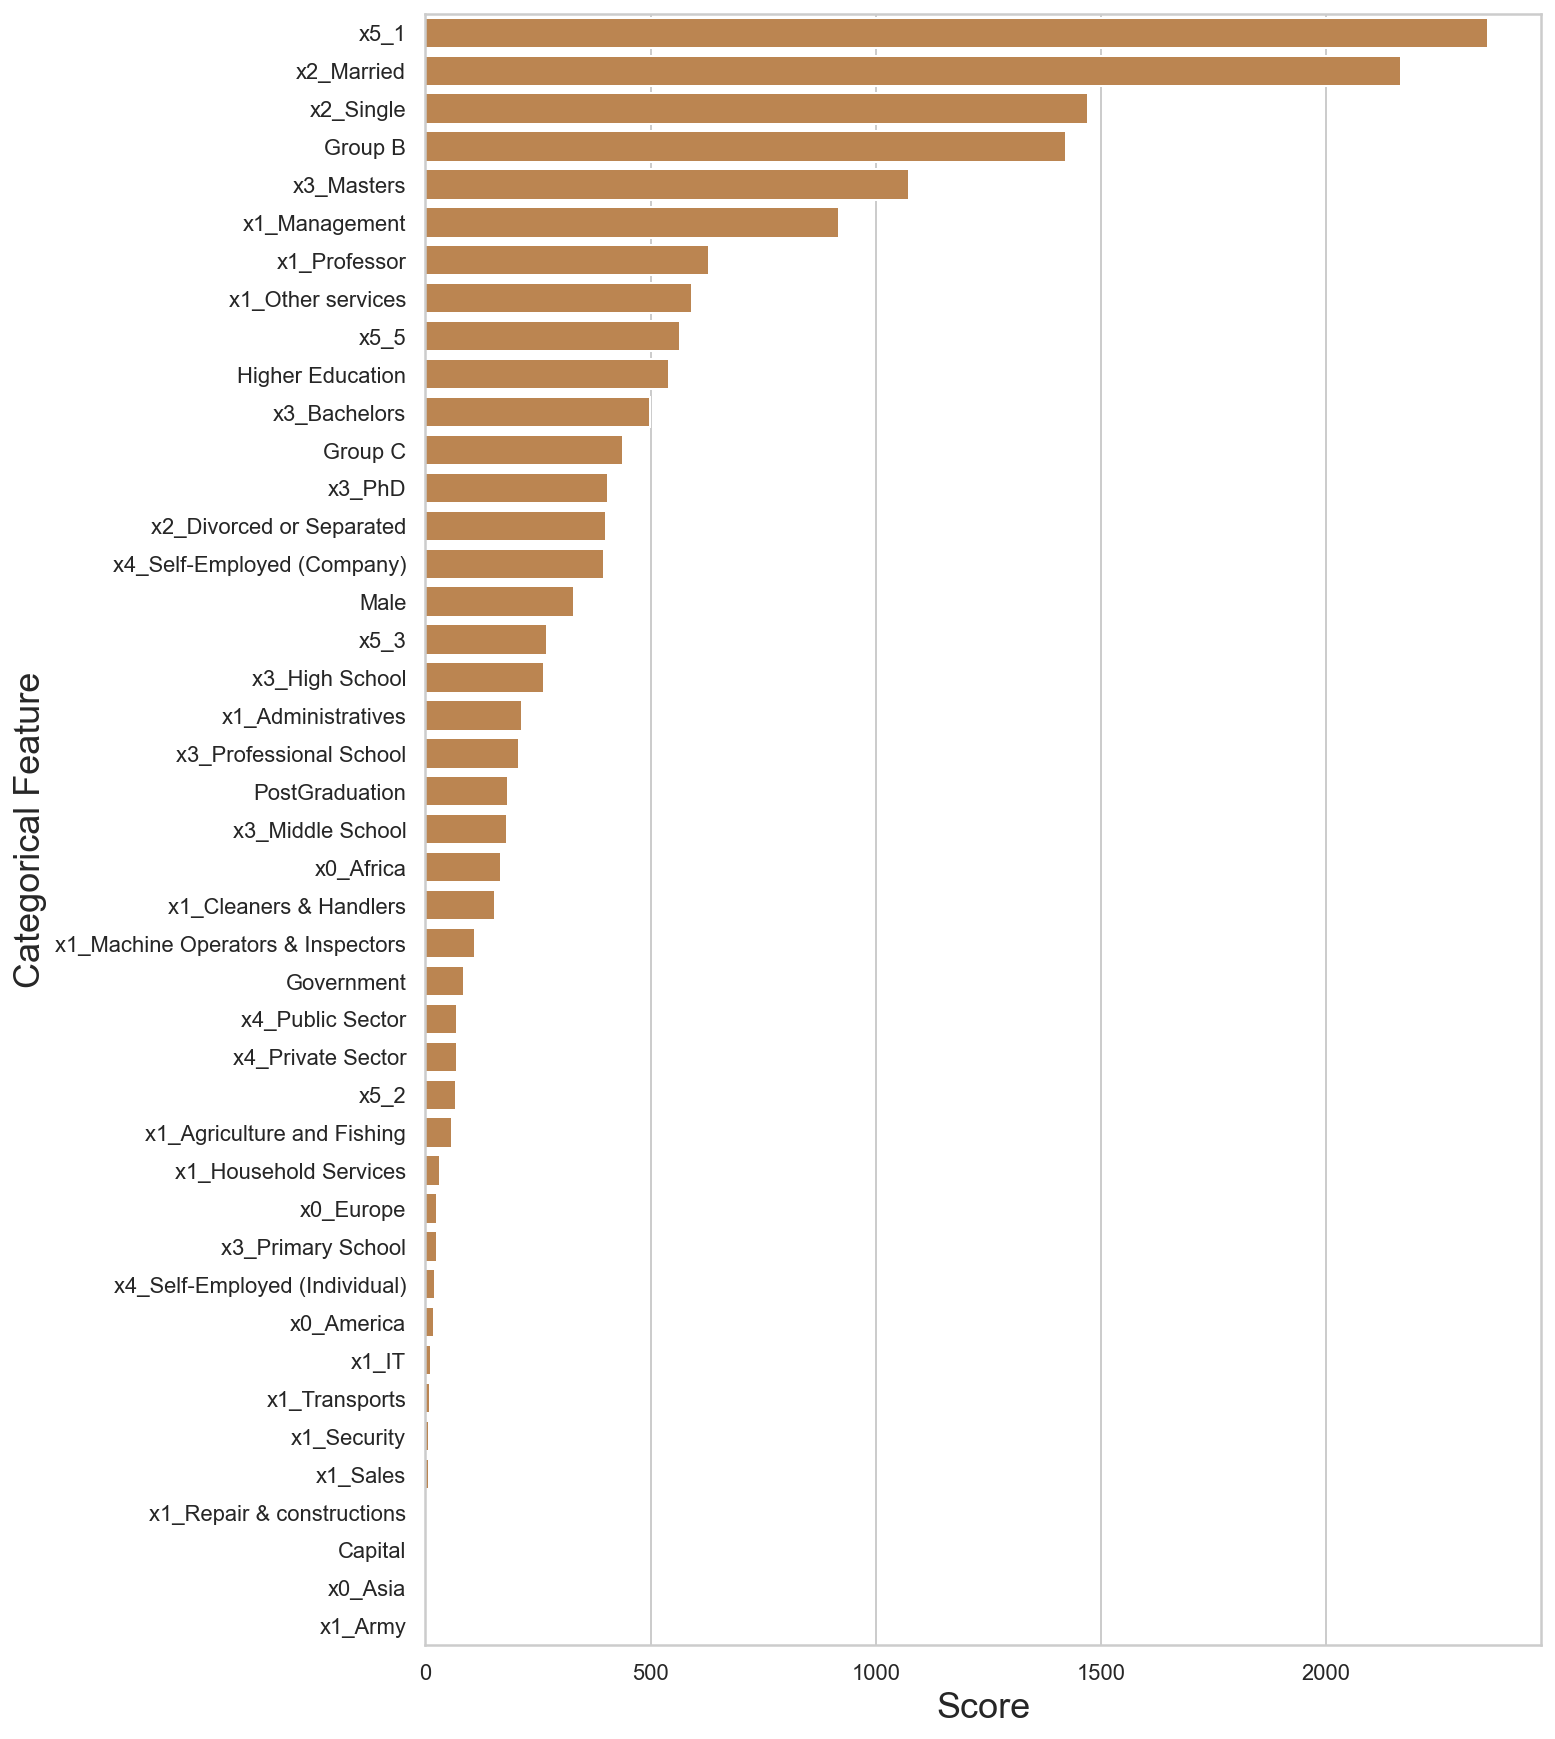

In [105]:
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection

sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(non_metric_binary, target)
    
# Plot the scores
datset = pd.DataFrame()
datset['feature'] = non_metric_binary.columns[range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=False)

plt.figure(figsize=(10,15))
sns.barplot(datset['scores'], datset['feature'], color='peru')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

# When using this method, higher score values mean more relevance to explain the dependent variable

Ranking on this method:
1. x5_1
2. x2_Married
3. x2_Single
4. Group B
5. x3_Masters
6. x1_Management
7. x1_Professor
8. x1_Other services
9. x5_5
10. Higher Education
11. x3_Bachelors
12. Group C
13. x3_PhD

#### Mutual information (MI) with the target

In [106]:
feat = []
mi = []

for i in non_metric_binary.columns:
    feat.append(i)
    
    a = np.array(non_metric_binary[i])
    b = np.array(target)

    # Mutual information of 0.69, expressed in nats
    mi.append(mutual_info_classif(a.reshape(-1,1), b, discrete_features = True)[0])

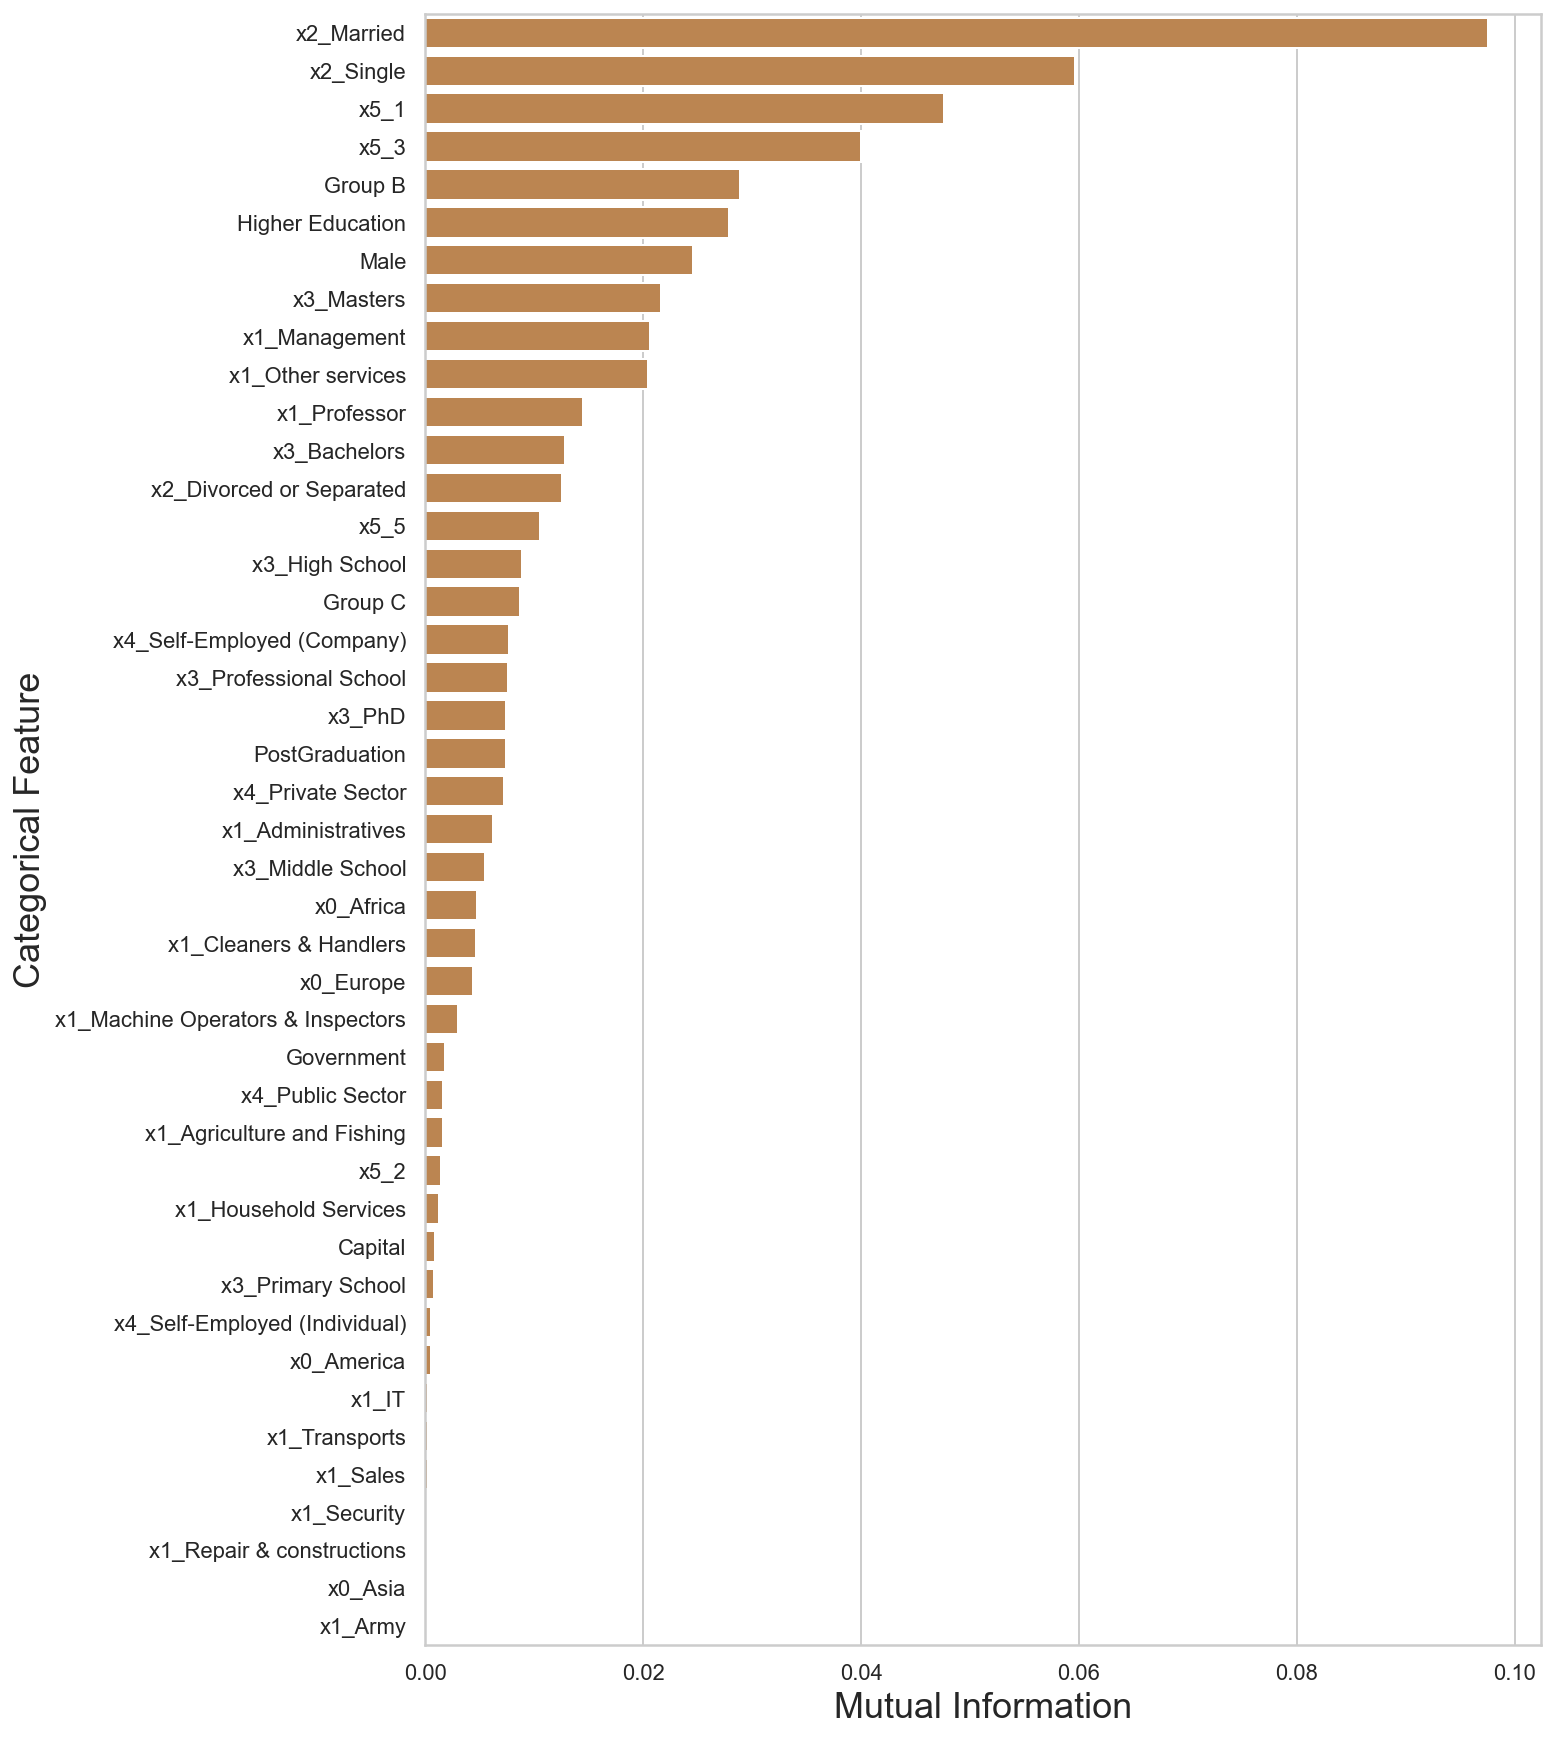

In [107]:
# Plot the MI
feat_mi=pd.DataFrame([feat, mi]).T.sort_values(by=1, ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,15))
sns.barplot(x=1, y=0, data=feat_mi, color='peru')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Mutual Information', fontsize=18)
plt.show()

Ranking on this method:
1. x2_Married
2. x2_Single
3. x5_1
4. x5_3
5. Group B
6. Higher Education
7. Male
8. x3_Masters
9. x1_Management
10. x1_Other services
11. x1_Professor
12. x3_Bachelors
13. x2_Divorced or Separated

#### Selecting the binary variables and Checking redundancy

In [108]:
# Selection based on the previously used methods
non_metric_selected = non_metric_binary[['Male', 'Higher Education', 'Group B', 'x1_Management', 'x1_Professor', 
                                         'x2_Married', 'x2_Single', 'x3_Bachelors', 'x3_Masters', 'x5_1', 'x5_3', 'x5_5']]

In [109]:
# Checking for redundant variables
print('Normalized mutual information between binary variables (0-1):\n')
for i in non_metric_selected.columns:
    for j in non_metric_selected.columns:
        normal_mi = round(normalized_mutual_info_score(non_metric_selected[i], non_metric_selected[j]), 3)
        
        if i == j: #if equals to 1
            pass
        
        elif normal_mi > 0.5:
            print(i, 'and', j, ':', normal_mi)
            
# x3_3 was selected more times than Group B, so we will keep x3_3
non_metric_selected.drop(columns='Group B', inplace=True)

Normalized mutual information between binary variables (0-1):

Group B and x5_3 : 0.594
x5_3 and Group B : 0.594


#### Normalization before the metric selection

In [110]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22400 entries, 12486 to 34885
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Name                                22400 non-null  object        
 1   Birthday                            22400 non-null  datetime64[ns]
 2   Native Continent                    22400 non-null  object        
 3   Marital Status                      22400 non-null  object        
 4   Lives with                          22400 non-null  object        
 5   Base Area                           22400 non-null  object        
 6   Education Level                     22400 non-null  object        
 7   Years of Education                  22400 non-null  int64         
 8   Employment Sector                   22400 non-null  object        
 9   Role                                22400 non-null  object        
 10  Working Hours per 

In [111]:
metric = df_train2.loc[:,(np.array(df_train2.dtypes=="int64")) | (np.array(df_train2.dtypes=="float64"))]

# Normalizing using min max
min_max_scaler = preprocessing.MinMaxScaler()
metric_scaled = min_max_scaler.fit_transform(metric.values)
stand_metric= pd.DataFrame(metric_scaled, columns=metric.columns, index=metric.index)

In [112]:
# # Normalizing using RobustScaler 
# robust = RobustScaler().fit(metric)
# robust_metric= robust.transform(metric)
# stand_metric= pd.DataFrame(robust_metric, columns=metric.columns, index=metric.index)

### For metric variables

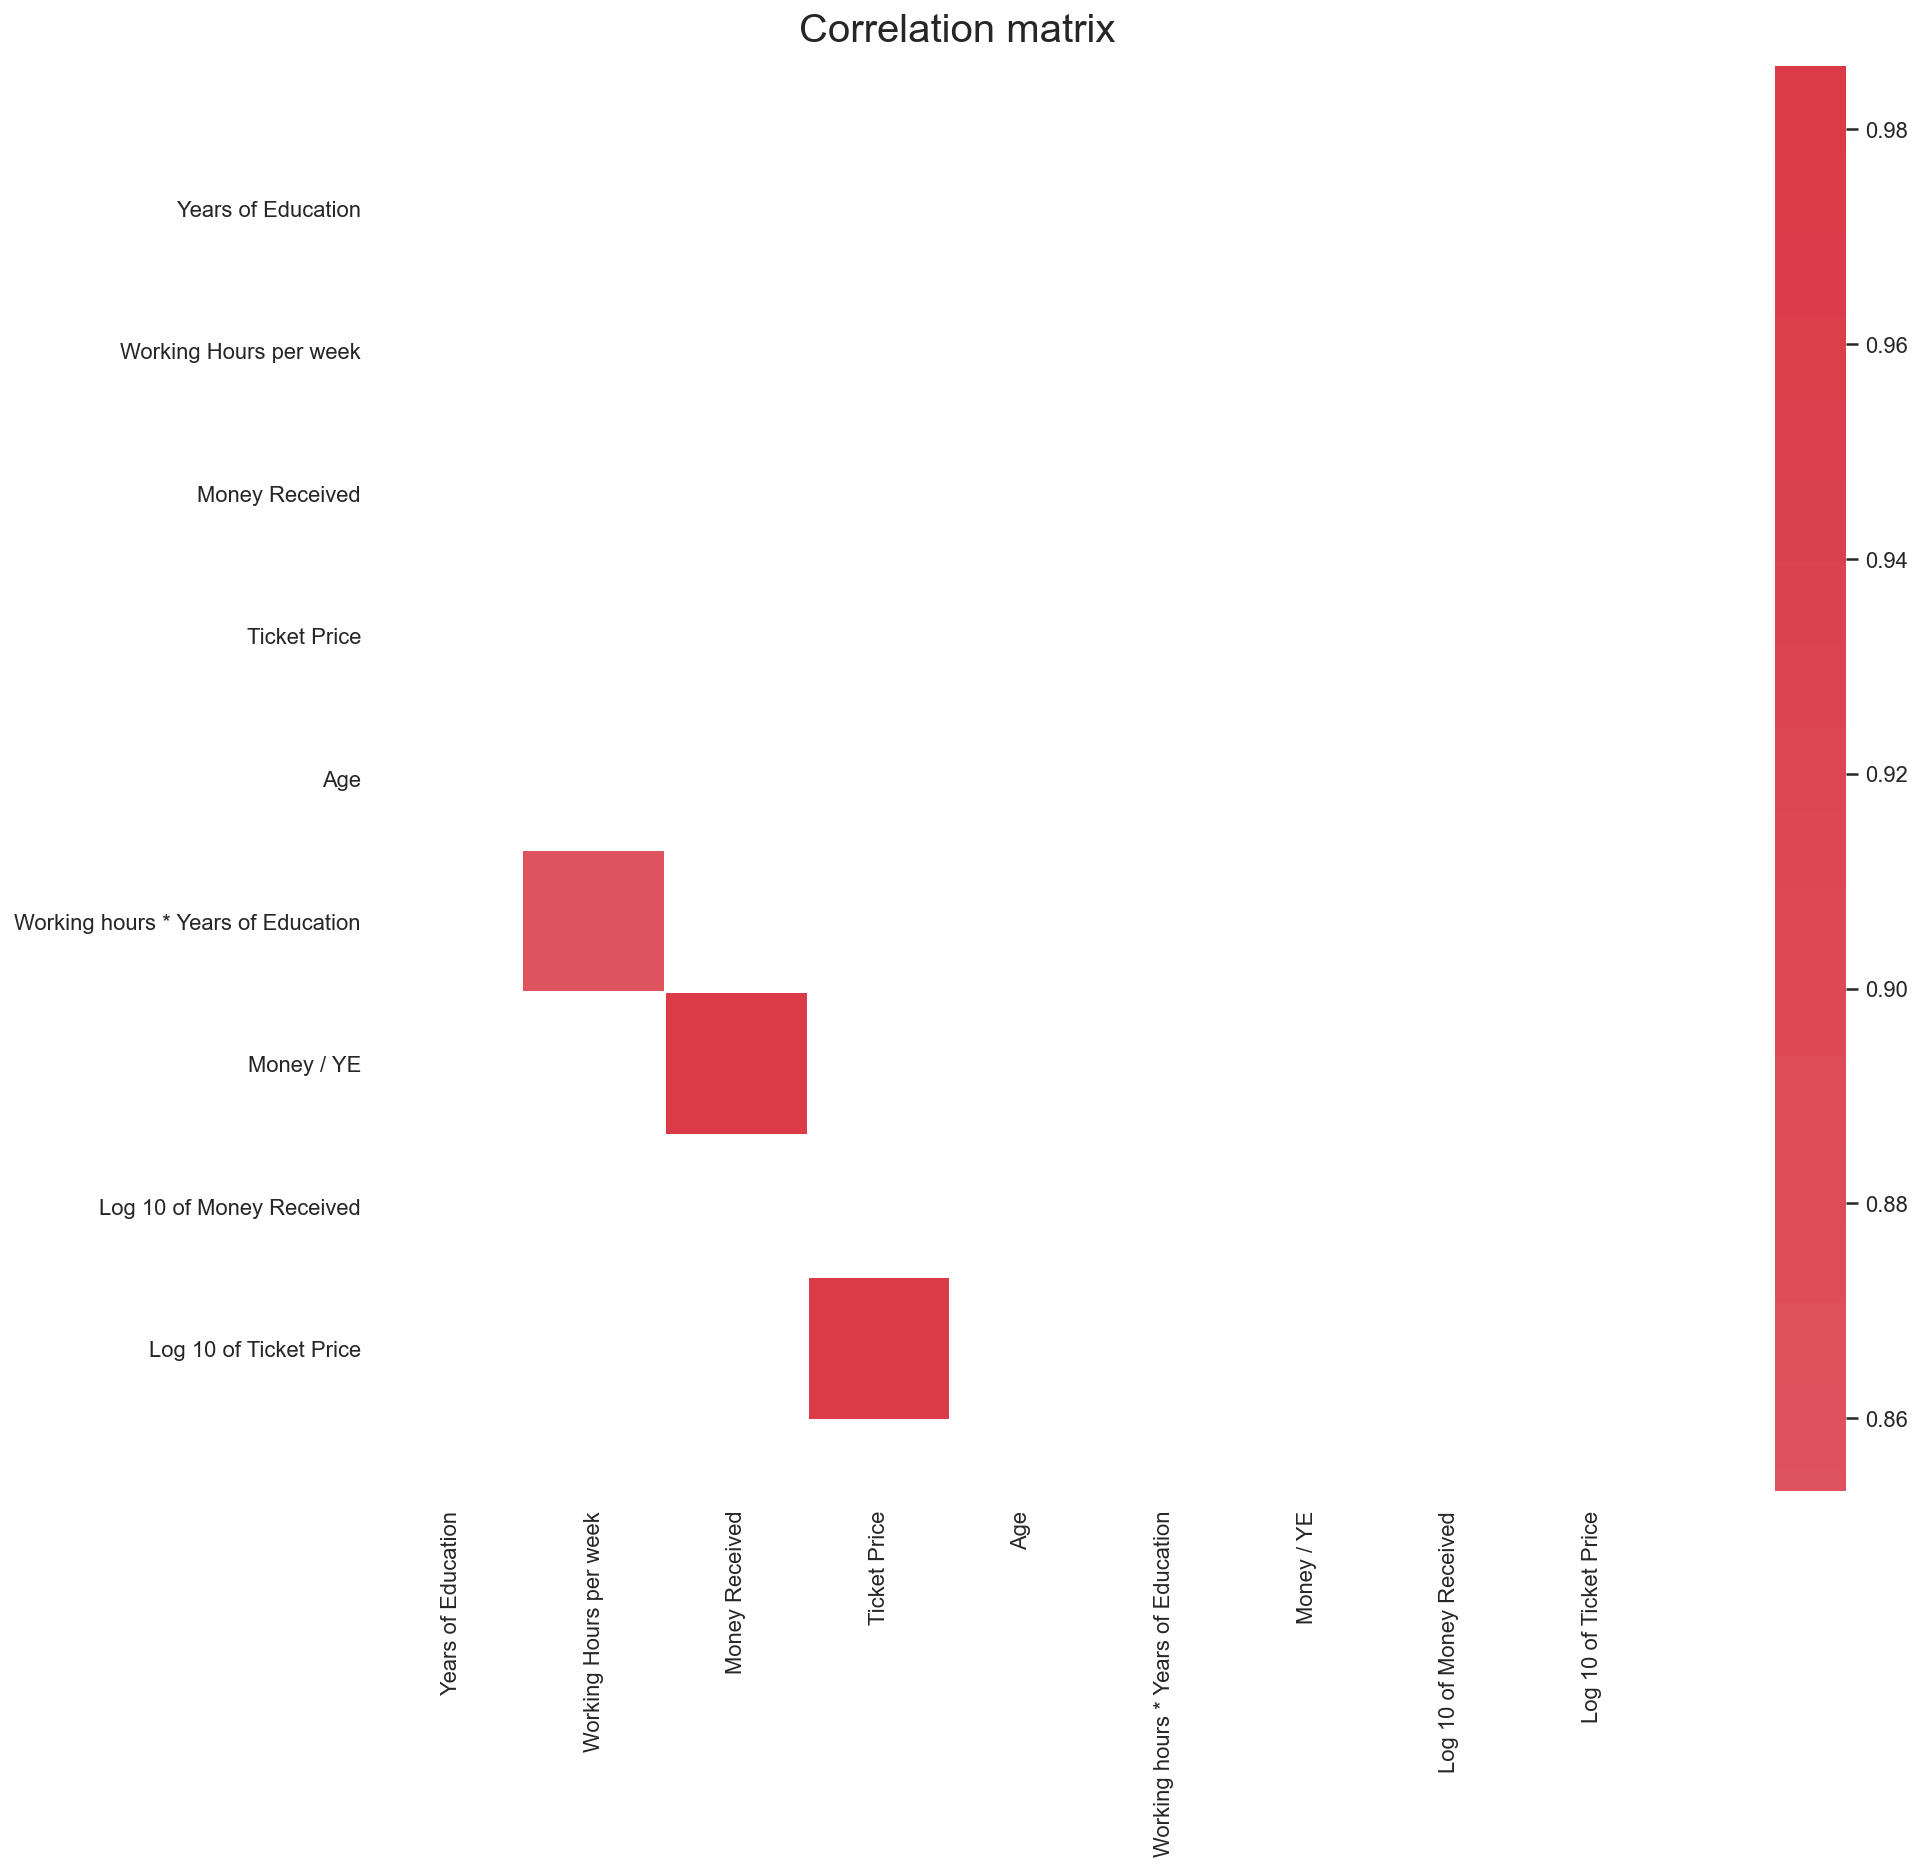

In [113]:
# Start by checking correlations
sns.set(style="white")

# Compute the correlation matrix
corr = stand_metric.corr() #Getting correlation of numerical variables

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

# Draw the heatmap with the mask and correct aspect ratio
#show only corr bigger than 0.6 in absolute value
sns.heatmap(corr[(corr>=.7) | (corr<=-.7)], mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, ax=ax)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Correlation matrix", fontsize=20)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
# Fixing the bug of partially cut-off bottom and top cells
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

In [114]:
# Correlation between Money Received and Log 10 of Money Received
round(corr['Money Received']['Log 10 of Money Received'], 3)

0.561

#### Recursive Feature Elimination (RFE)

In [115]:
# No of features
nof_list=np.arange(1,len(stand_metric.columns)+1)  
high_score=0

# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(stand_metric,target, test_size = 0.3, random_state = 0)
    
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 7
Score with 7 features: 0.811607


In [116]:
rfe = RFE(estimator = model, n_features_to_select = 7)
X_rfe = rfe.fit_transform(X = stand_metric, y = target)
model = LogisticRegression().fit(X = X_rfe,y = target)
selected_features = pd.Series(rfe.support_, index = stand_metric.columns)

# Features selected with RFE
selected_features

Years of Education                     True
Working Hours per week                 True
Money Received                         True
Ticket Price                           True
Age                                    True
Working hours * Years of Education     True
Money / YE                             True
Log 10 of Money Received              False
Log 10 of Ticket Price                False
dtype: bool

#### Lasso Regression

Best alpha using built-in LassoCV: 0.000026
Best score using built-in LassoCV: 0.254031
Lasso picked 9 variables and eliminated the other 0 variables


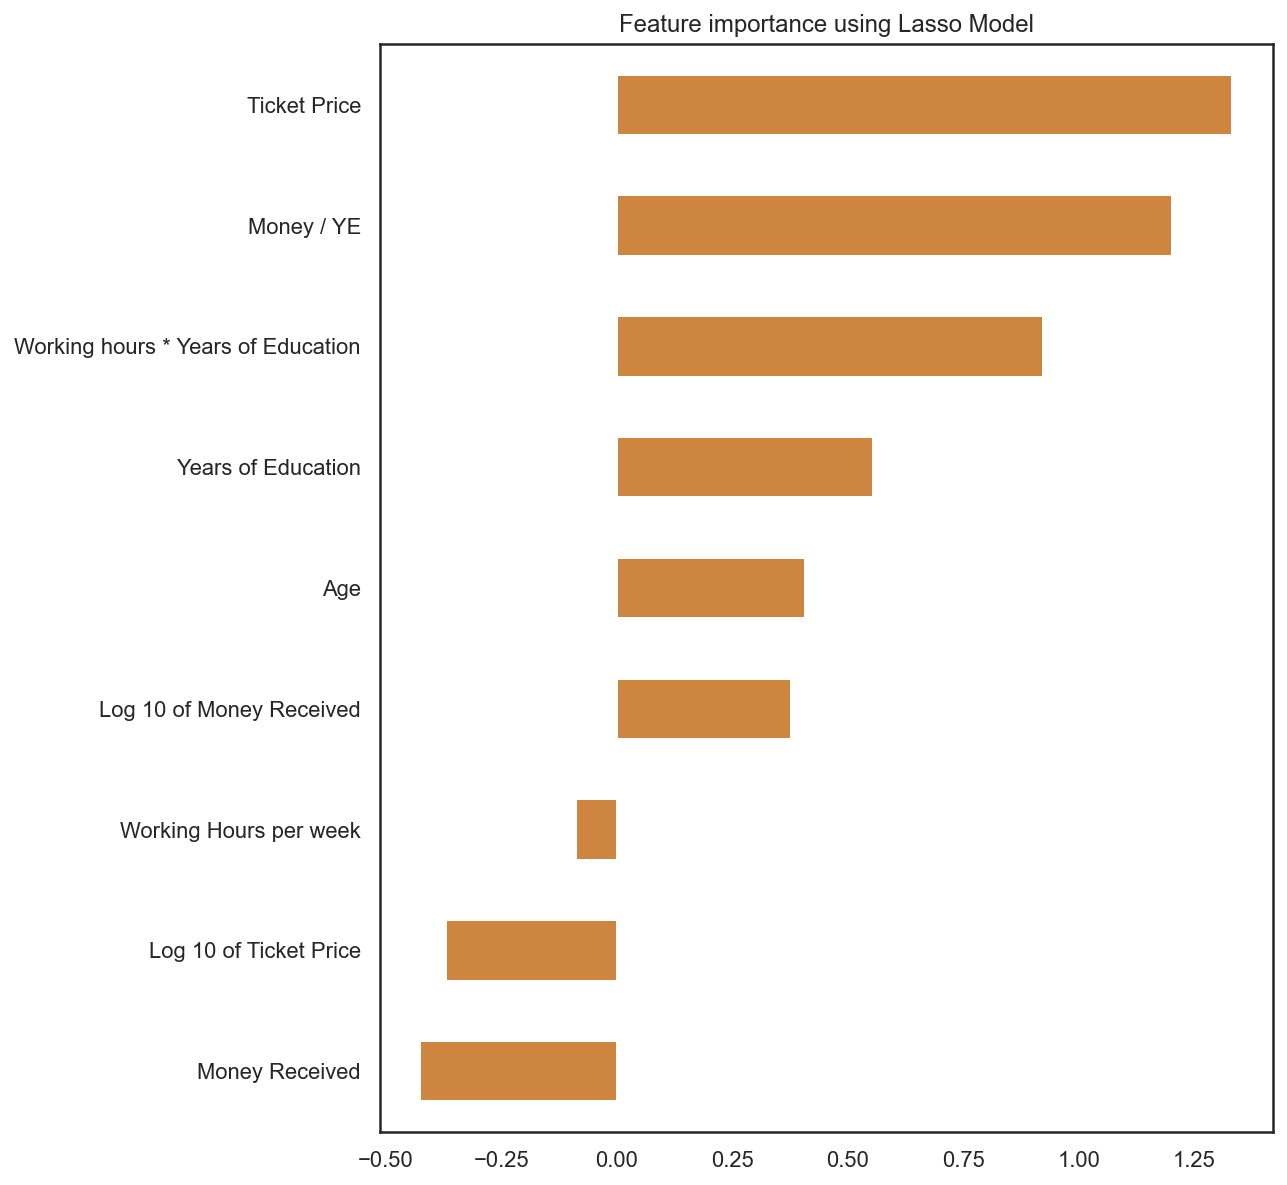

In [117]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh", color="peru")
    plt.title("Feature importance using " + name + " Model")
    plt.show()
    
reg = LassoCV()

reg.fit(X=stand_metric, y=target)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X = stand_metric,y = target))
coef = pd.Series(reg.coef_, index = stand_metric.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
plot_importance(coef,'Lasso')

#### Ridge Regression

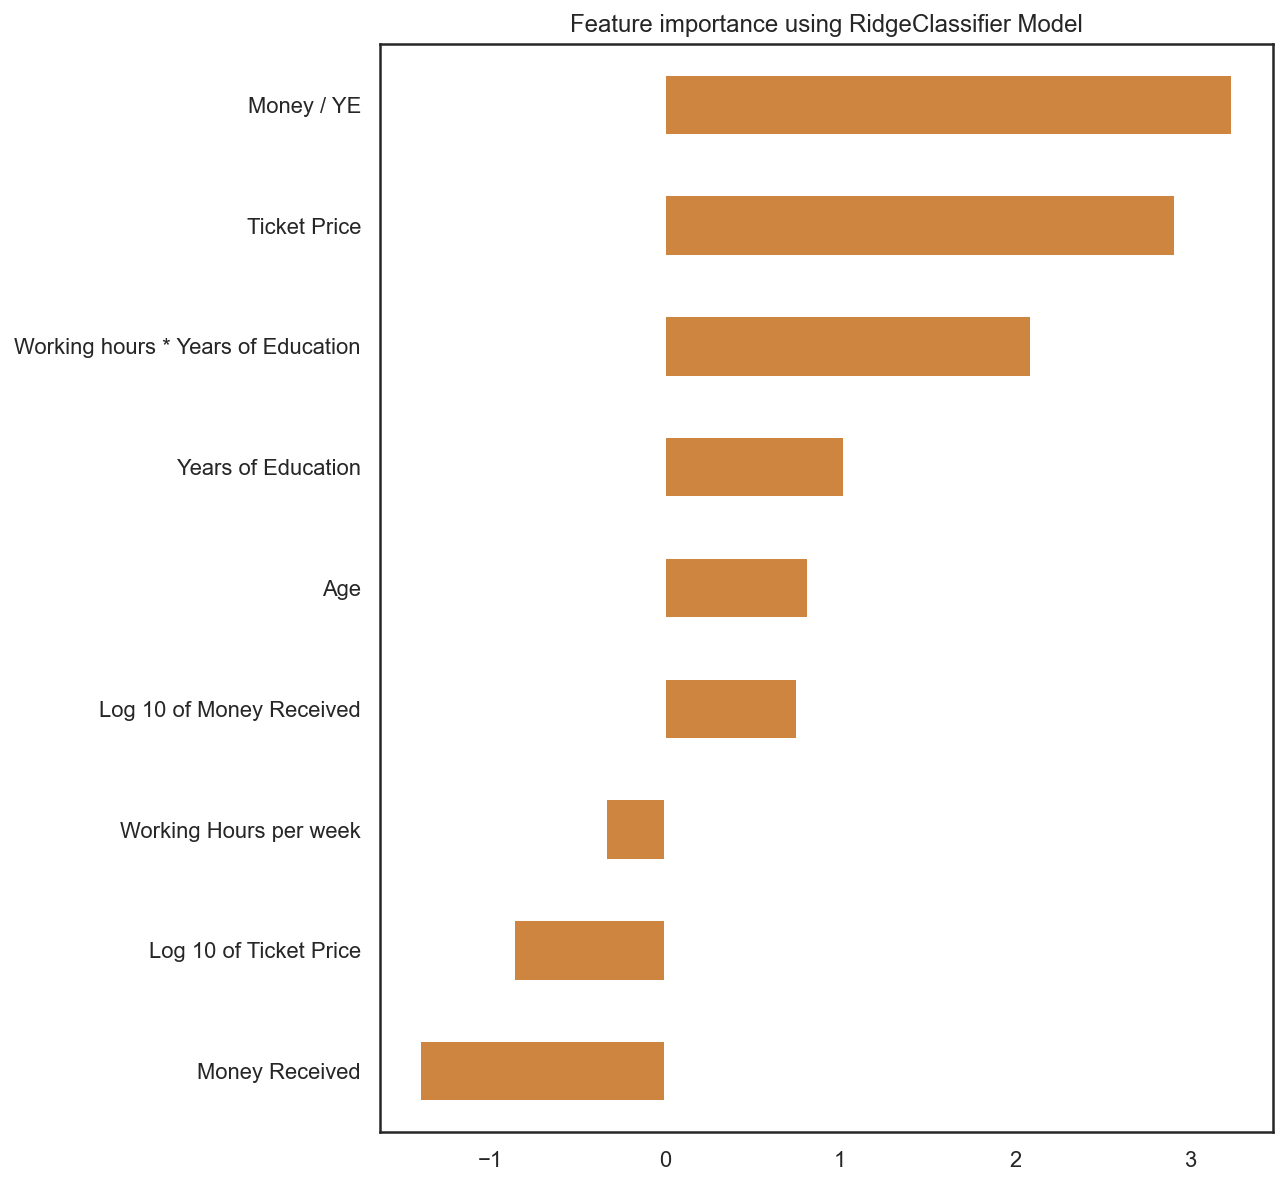

In [118]:
ridge = RidgeClassifierCV().fit(X = stand_metric,y = target)
coef_ridge = pd.Series(ridge.coef_[0], index = stand_metric.columns)

def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh", color="peru")
    plt.title("Feature importance using " + name + " Model")
    plt.show()
    
plot_importance(coef_ridge,'RidgeClassifier')

#### Sequential Forward Selection (SFS)

In [119]:
model = LogisticRegression()

In [120]:
# Stop when all features have been selected, scoring is "accuracy"
forward = SFS(model, k_features=9, forward=True, scoring="accuracy", cv = None)

forward.fit(stand_metric, target)

SequentialFeatureSelector(cv=None, estimator=LogisticRegression(), k_features=9,
                          scoring='accuracy')

In [121]:
# Checking the features added at each step
forward_table = pd.DataFrame.from_dict(forward.get_metric_dict()).T.drop(columns=['cv_scores', 'ci_bound', 'std_dev', 'std_err'])
forward_table

feature_idx avg_score  \
1                         (2,)  0.803259   
2                       (2, 3)  0.816741   
3                    (2, 3, 8)  0.816696   
4                 (2, 3, 6, 8)  0.815312   
5              (2, 3, 6, 7, 8)  0.814063   
6           (0, 2, 3, 6, 7, 8)  0.810848   
7        (0, 2, 3, 5, 6, 7, 8)  0.811786   
8     (0, 2, 3, 4, 5, 6, 7, 8)  0.814688   
9  (0, 1, 2, 3, 4, 5, 6, 7, 8)  0.813616   

                                       feature_names  
1                                  (Money Received,)  
2                     (Money Received, Ticket Price)  
3  (Money Received, Ticket Price, Log 10 of Ticke...  
4  (Money Received, Ticket Price, Money / YE, Log...  
5  (Money Received, Ticket Price, Money / YE, Log...  
6  (Years of Education, Money Received, Ticket Pr...  
7  (Years of Education, Money Received, Ticket Pr...  
8  (Years of Education, Money Received, Ticket Pr...  
9  (Years of Education, Working Hours per week, M...

In [122]:
# Iteration with the highest accuracy
forward_table_max = forward_table['avg_score'].max()
forward_table_max

0.8167410714285714

In [123]:
# Feature's names
forward_table[forward_table['avg_score']==forward_table_max]['feature_names'].values

array([('Money Received', 'Ticket Price')], dtype=object)

#### Sequential Backward Selection (SBS)

In [124]:
# Stop when only one feature remains, scoring is "accuracy"
backward = SFS(model, k_features=1, forward=False, scoring="accuracy", cv = None)

backward.fit(stand_metric, target)

SequentialFeatureSelector(cv=None, estimator=LogisticRegression(),
                          forward=False, scoring='accuracy')

In [125]:
# Checking the features removed at each step
backward_table = pd.DataFrame.from_dict(backward.get_metric_dict()).T.drop(columns=['cv_scores', 'ci_bound', 'std_dev', 'std_err'])
backward_table

feature_idx avg_score  \
9  (0, 1, 2, 3, 4, 5, 6, 7, 8)  0.813616   
8     (0, 1, 2, 3, 4, 5, 6, 8)  0.815134   
7        (0, 2, 3, 4, 5, 6, 8)  0.816116   
6           (0, 2, 3, 4, 5, 6)  0.816161   
5              (0, 2, 3, 4, 5)  0.814107   
4                 (0, 2, 4, 5)  0.808438   
3                    (0, 2, 5)  0.804241   
2                       (0, 2)  0.801741   
1                         (2,)  0.803259   

                                       feature_names  
9  (Years of Education, Working Hours per week, M...  
8  (Years of Education, Working Hours per week, M...  
7  (Years of Education, Money Received, Ticket Pr...  
6  (Years of Education, Money Received, Ticket Pr...  
5  (Years of Education, Money Received, Ticket Pr...  
4  (Years of Education, Money Received, Age, Work...  
3  (Years of Education, Money Received, Working h...  
2               (Years of Education, Money Received)  
1                                  (Money Received,)

In [126]:
# Iteration with the highest accuracy
backward_table_max = backward_table['avg_score'].max()
backward_table_max

0.8161607142857142

In [127]:
# Feature's names
backward_table[backward_table['avg_score']==backward_table_max]['feature_names'].values

array([('Years of Education', 'Money Received', 'Ticket Price', 'Age', 'Working hours * Years of Education', 'Money / YE')],
      dtype=object)

### Mixing metric and non-metric variables

In [128]:
# Drop the metric features that should not be selected
stand_metric.drop(columns=['Working Hours per week', 'Money / YE', 'Log 10 of Money Received', 
                           'Log 10 of Ticket Price'], inplace=True)

In [129]:
# Dataframe with all features of all types
all_selected_variables = pd.concat([non_metric_selected, stand_metric], axis=1)
all_selected_variables.head()

Male  Higher Education  x1_Management  x1_Professor  x2_Married  \
CITIZEN_ID                                                                    
12486          1                 1              0             0           1   
12487          1                 0              0             0           1   
12488          1                 0              0             0           1   
12489          1                 0              0             0           1   
12490          1                 1              0             1           0   

            x2_Single  x3_Bachelors  x3_Masters  x5_1  x5_3  x5_5  \
CITIZEN_ID                                                          
12486               0             0           0     0     0     0   
12487               0             0           0     0     1     0   
12488               0             0           0     0     0     0   
12489               0             0           0     0     0     0   
12490               1             0           0     0     1     0   

            Years of Education  Money Received  Ticket Price       Age  \
CITIZEN_ID                                                               
12486                 0.619048        0.000000      0.424225  0.383562   
12487                 0.571429        0.000000      0.000000  0.342466   
12488                 0.571429        0.000000      0.433184  0.301370   
12489                 0.523810        0.043862      0.000000  0.630137   
12490                 1.000000        0.000000      0.000000  0.219178   

            Working hours * Years of Education  
CITIZEN_ID                                      
12486                                 0.250120  
12487                                 0.230880  
12488                                 0.265512  
12489                                 0.195767  
12490                                 0.454545

Now we will repeat the forward and backward selection, this time with metric and non-metric variables mixed.

Forward:

In [130]:
# The model was defined above (LogisticRegression)
forward = SFS(model, k_features=16, forward=True, scoring="accuracy", cv = None)

forward.fit(all_selected_variables, target)

SequentialFeatureSelector(cv=None, estimator=LogisticRegression(),
                          k_features=16, scoring='accuracy')

In [131]:
forward_table = pd.DataFrame.from_dict(forward.get_metric_dict()).T.drop(columns=['cv_scores', 'ci_bound', 'std_dev', 'std_err'])
forward_table

feature_idx avg_score  \
1                                               (12,)  0.803259   
2                                            (12, 13)  0.816741   
3                                        (10, 12, 13)  0.811652   
4                                     (5, 10, 12, 13)  0.812054   
5                                 (5, 10, 11, 12, 13)  0.818304   
6                              (4, 5, 10, 11, 12, 13)  0.835179   
7                           (2, 4, 5, 10, 11, 12, 13)  0.838973   
8                        (2, 4, 5, 8, 10, 11, 12, 13)  0.840268   
9                    (2, 4, 5, 8, 10, 11, 12, 13, 14)  0.842098   
10                (2, 4, 5, 8, 9, 10, 11, 12, 13, 14)  0.842589   
11            (2, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15)  0.841875   
12         (2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15)  0.842589   
13      (0, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15)  0.843527   
14   (0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15)  0.843214   
15  (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...  0.843348   
16  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  0.842946   

                                        feature_names  
1                                   (Money Received,)  
2                      (Money Received, Ticket Price)  
3                (x5_5, Money Received, Ticket Price)  
4     (x2_Single, x5_5, Money Received, Ticket Price)  
5   (x2_Single, x5_5, Years of Education, Money Re...  
6   (x2_Married, x2_Single, x5_5, Years of Educati...  
7   (x1_Management, x2_Married, x2_Single, x5_5, Y...  
8   (x1_Management, x2_Married, x2_Single, x5_1, x...  
9   (x1_Management, x2_Married, x2_Single, x5_1, x...  
10  (x1_Management, x2_Married, x2_Single, x5_1, x...  
11  (x1_Management, x2_Married, x2_Single, x5_1, x...  
12  (x1_Management, x1_Professor, x2_Married, x2_S...  
13  (Male, x1_Management, x1_Professor, x2_Married...  
14  (Male, Higher Education, x1_Management, x1_Pro...  
15  (Male, Higher Education, x1_Management, x1_Pro...  
16  (Male, Higher Education, x1_Management, x1_Pro...

In [132]:
forward_table_max = forward_table['avg_score'].max()
forward_table_max

0.8435267857142857

In [133]:
forward_table[forward_table['avg_score']==forward_table_max]['feature_names'].values

array([('Male', 'x1_Management', 'x1_Professor', 'x2_Married', 'x2_Single', 'x5_1', 'x5_3', 'x5_5', 'Years of Education', 'Money Received', 'Ticket Price', 'Age', 'Working hours * Years of Education')],
      dtype=object)

Backward:

In [134]:
backward = SFS(model, k_features=1, forward=False, scoring="accuracy", cv = None) #floating=False

backward.fit(all_selected_variables, target)

SequentialFeatureSelector(cv=None, estimator=LogisticRegression(),
                          forward=False, scoring='accuracy')

In [135]:
backward_table = pd.DataFrame.from_dict(backward.get_metric_dict()).T.drop(columns=['cv_scores', 'ci_bound', 'std_dev', 'std_err'])
backward_table

feature_idx avg_score  \
16  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  0.842946   
15  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...  0.843884   
14    (0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15)  0.844018   
13       (0, 1, 2, 3, 4, 7, 8, 9, 11, 12, 13, 14, 15)  0.843973   
12          (1, 2, 3, 4, 7, 8, 9, 11, 12, 13, 14, 15)  0.843795   
11             (1, 2, 3, 4, 8, 9, 11, 12, 13, 14, 15)  0.843929   
10                 (1, 2, 3, 4, 8, 9, 11, 13, 14, 15)  0.843393   
9                      (1, 2, 3, 4, 8, 9, 11, 14, 15)  0.842768   
8                          (1, 2, 3, 4, 8, 9, 11, 15)  0.842455   
7                             (2, 3, 4, 8, 9, 11, 15)  0.841875   
6                                (2, 4, 8, 9, 11, 15)  0.840804   
5                                    (2, 4, 8, 9, 11)  0.840313   
4                                       (4, 8, 9, 11)  0.838661   
3                                          (4, 8, 11)  0.834107   
2                                             (4, 11)  0.818259   
1                                               (11,)  0.776652   

                                        feature_names  
16  (Male, Higher Education, x1_Management, x1_Pro...  
15  (Male, Higher Education, x1_Management, x1_Pro...  
14  (Male, Higher Education, x1_Management, x1_Pro...  
13  (Male, Higher Education, x1_Management, x1_Pro...  
12  (Higher Education, x1_Management, x1_Professor...  
11  (Higher Education, x1_Management, x1_Professor...  
10  (Higher Education, x1_Management, x1_Professor...  
9   (Higher Education, x1_Management, x1_Professor...  
8   (Higher Education, x1_Management, x1_Professor...  
7   (x1_Management, x1_Professor, x2_Married, x5_1...  
6   (x1_Management, x2_Married, x5_1, x5_3, Years ...  
5   (x1_Management, x2_Married, x5_1, x5_3, Years ...  
4        (x2_Married, x5_1, x5_3, Years of Education)  
3              (x2_Married, x5_1, Years of Education)  
2                    (x2_Married, Years of Education)  
1                               (Years of Education,)

In [136]:
backward_table_max = backward_table['avg_score'].max()
backward_table_max

0.8440178571428572

In [137]:
backward_table[backward_table['avg_score']==backward_table_max]['feature_names'].values

array([('Male', 'Higher Education', 'x1_Management', 'x1_Professor', 'x2_Married', 'x2_Single', 'x3_Masters', 'x5_1', 'x5_3', 'Years of Education', 'Money Received', 'Ticket Price', 'Age', 'Working hours * Years of Education')],
      dtype=object)

Mantaining the variables that appear on **both** the forward and backward selections:

In [138]:
non_metric_bf = non_metric_selected.drop(columns=['Higher Education', 'x3_Bachelors', 'x3_Masters', 'x5_5'])

In [139]:
all_selected_variables.drop(columns=['Higher Education', 'x3_Bachelors', 'x3_Masters', 'x5_5'], inplace=True)

#### Checking Point Biserial among the selected metric and non-metric variables

In [140]:
# This is done to answer the question: is there redundancy between any metric and non-metric features?
print('Point biserial between binary and metric variables:\n')
for i in non_metric_bf.columns:
    for j in stand_metric.columns:
        pb = pointbiserialr(non_metric_bf[i], stand_metric[j])
        
        if abs(pb[0]) > 0.5:
            print(i, 'and', j, ':', round(pb[0], 3))

Point biserial between binary and metric variables:

x2_Single and Age : -0.536
x5_1 and Money Received : 0.619
x5_3 and Ticket Price : -0.567


In [141]:
all_selected_variables.columns

Index(['Male', 'x1_Management', 'x1_Professor', 'x2_Married', 'x2_Single',
       'x5_1', 'x5_3', 'Years of Education', 'Money Received', 'Ticket Price',
       'Age', 'Working hours * Years of Education'],
      dtype='object')

In [142]:
# Selecting the same columns for test set
all_variables_test = pd.concat([df_test, ohc_df_test], axis=1)

test = all_variables_test[['Male', 'x1_Management', 'x1_Professor', 'x2_Married', 'x2_Single',
                           'x5_1', 'x5_3', 'Years of Education', 'Money Received', 'Ticket Price',
                           'Age', 'Working hours * Years of Education']]

## Data Partition

In [143]:
X_train, X_val, y_train, y_val = train_test_split(all_selected_variables,
                                                  target,
                                                  test_size = 0.3,
                                                  random_state = 42,
                                                  shuffle=True,
                                                  stratify=target)

## Predictive Modelling

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import time
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from collections import OrderedDict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from sklearn.svm import SVC

In [145]:
# Functions to be used in all models, to assess them

def metrics(y_train, pred_train , y_val, pred_val):
    print('_____________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train)) #true neg and true pos, false positives and false neg
    print('__________________________+_________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    
    
def avg_score(model):
    # apply kfold
    kf = KFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_val = []
    timer = []
    n_iter = []
    for train_index, val_index in kf.split(all_selected_variables):
        # get the indexes of the observations assigned for each partition
        X_train, X_val = all_selected_variables.iloc[train_index], all_selected_variables.iloc[val_index]
        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_val = model.score(X_val,y_val)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_val.append(value_val)
        timer.append(end-begin)
        n_iter.append(model.n_iter_)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)
    avg_iter = round(np.mean(n_iter),1)
    std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
           str(avg_val) + '+/-' + str(std_val), str(avg_iter) + '+/-' + str(std_iter)


def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_val, avg_iter = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_val, avg_iter
        count+=1
    return df

In [146]:
# For the models that don't have the n_iter attribute

def avg_score_1(model):
    # apply kfold
    kf = KFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_val = []
    timer = []
    n_iter = []
    for train_index, val_index in kf.split(all_selected_variables):
        # get the indexes of the observations assigned for each partition
        X_train, X_val = all_selected_variables.iloc[train_index], all_selected_variables.iloc[val_index]
        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the validation
        value_val = model.score(X_val,y_val)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_val.append(value_val)
        timer.append(end-begin)
        #n_iter.append(model.n_iter_)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)
    #avg_iter = round(np.mean(n_iter),1)
    #std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val)
#, str(avg_iter) + '+/-' + str(std_iter)


def show_results_1(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_val = avg_score_1(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_val
        count+=1
    return df

### Decision Trees

In [147]:
# Function to plot Decision Trees
def plot_tree(model_tree):
    dot_data = export_graphviz(model_tree,
                               feature_names=X_train.columns,  
                               class_names=["Income lower or equal to avg", "Income higher than avg"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())

In [148]:
# Function to calculate AUC for each parameter option defined below (max_depth, max_features, min_samples_split, etc)
def calculate_AUC(interval, x_train, x_val, y_train, y_val, parameter, max_depth = None):
    train_results = []
    val_results = []
    for value in interval:
        if (parameter == 'max_depth'):          
            dt = DecisionTreeClassifier(max_depth = value, random_state=42)
            dt.fit(x_train, y_train)
        elif (parameter == 'max_features'):  
            dt = DecisionTreeClassifier(max_features = value, max_depth = max_depth, random_state=42)
            dt.fit(x_train, y_train)
        elif (parameter == 'min_samples_split'):  
            dt = DecisionTreeClassifier(min_samples_split = value, max_depth = max_depth, random_state=42)
            dt.fit(x_train, y_train)
        elif (parameter == 'min_samples_leaf'):  
            dt = DecisionTreeClassifier(min_samples_leaf = value, max_depth = max_depth, random_state=42)
            dt.fit(x_train, y_train)
        elif (parameter == 'min_weight_fraction_leaf'):  
            dt = DecisionTreeClassifier(min_weight_fraction_leaf = value, max_depth = max_depth, random_state=42)
            dt.fit(x_train, y_train)
        elif (parameter == 'min_impurity_decrease'):  
            dt = DecisionTreeClassifier(min_impurity_decrease = value, max_depth = max_depth, random_state=42)
            dt.fit(x_train, y_train)
        train_pred = dt.predict(x_train)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        # Add auc score to previous train results
        train_results.append(roc_auc)
        y_pred = dt.predict(x_val)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        # Add auc score to previous validation results
        val_results.append(roc_auc)
    value_train = train_results.index(max(train_results))
    value_val = val_results.index(max(val_results))
    print('The best train value is ',interval[value_train])
    print('The best validation value is ',interval[value_val])
    

    import matplotlib.pyplot as plt
    from matplotlib.legend_handler import HandlerLine2D
    line1, = plt.plot(interval, train_results, 'b', label="Train AUC")
    line2, = plt.plot(interval, val_results, 'r', label="Validation AUC")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel("AUC score")
    plt.xlabel(str(parameter))
    plt.show()

*Note:* Parameters in decision trees don't really improve performance, they're meant to control overfitting.

In [149]:
dt_entropy = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)
dt_gini = DecisionTreeClassifier(criterion = 'gini').fit(X_train, y_train)

df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Gini','Entropy'])
show_results_1(df,dt_gini, dt_entropy)

Time       Train    Validation
Gini     0.037+/-0.0  0.94+/-0.0  0.826+/-0.01
Entropy  0.039+/-0.0  0.94+/-0.0  0.825+/-0.01

In [150]:
dt_random = DecisionTreeClassifier(splitter = 'random').fit(X_train, y_train)

df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['best','random'])
show_results_1(df,dt_gini, dt_random)

Time       Train    Validation
best    0.037+/-0.0  0.94+/-0.0  0.826+/-0.01
random  0.018+/-0.0  0.94+/-0.0  0.825+/-0.01

We will now check the best parameter specifications for each interval of values, thus, we will see at what point the AUC score reaches its maximum on the validation set.

The best train value is  15.0
The best validation value is  10.0


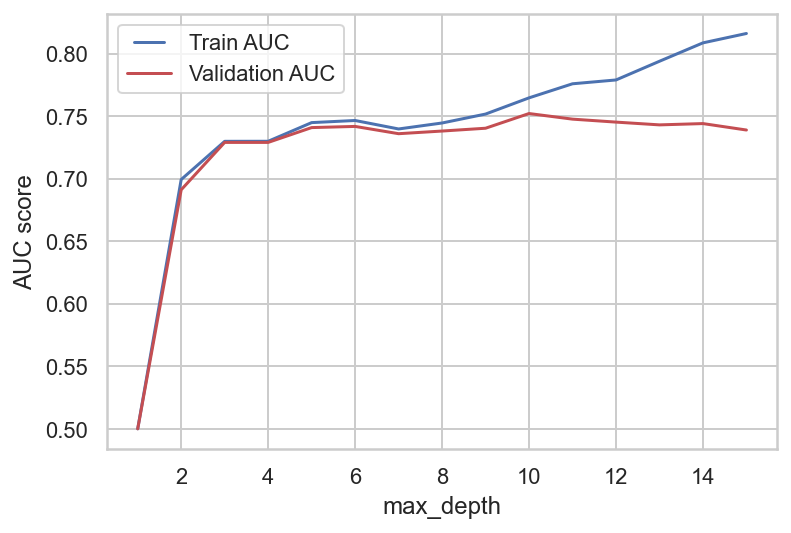

In [162]:
# First, check max_depth
max_depths = np.linspace(1, 15, 15, endpoint=True)  
calculate_AUC(max_depths, X_train, X_val, y_train, y_val, 'max_depth')

In [151]:
dt_depth10 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)
dt_depth6 = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train)

df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['full','depth10','depth6'])
show_results_1(df,dt_gini, dt_depth10,dt_depth6)

# With more depth comes more overfitting

Time        Train    Validation
full     0.038+/-0.0   0.94+/-0.0   0.826+/-0.0
depth10  0.024+/-0.0  0.871+/-0.0  0.853+/-0.01
depth6   0.018+/-0.0  0.856+/-0.0  0.854+/-0.01

The best train value is  6
The best validation value is  6


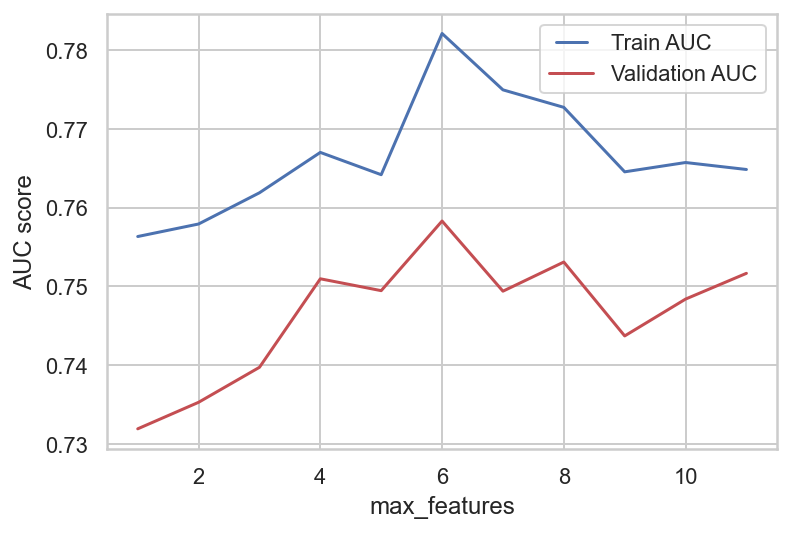

In [158]:
max_features = list(range(1,len(X_train.columns)))
calculate_AUC(max_features, X_train, X_val, y_train, y_val,'max_features', 10)

The best train value is  14
The best validation value is  17


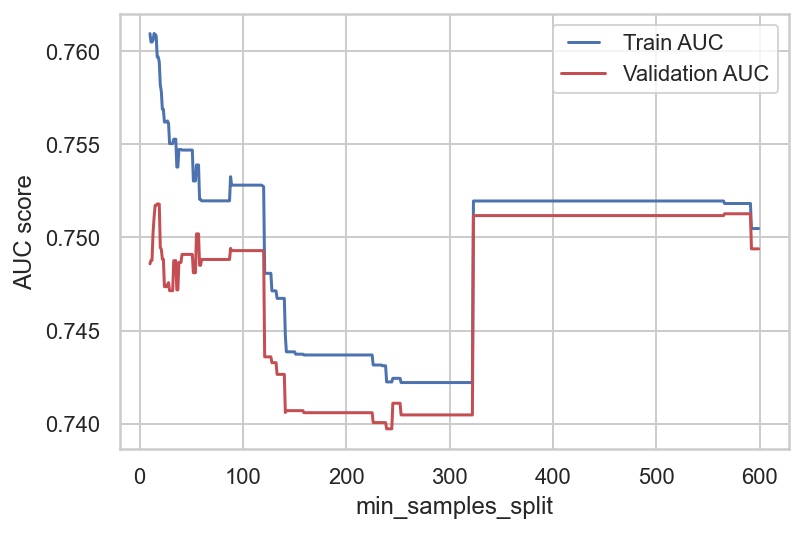

In [165]:
min_samples_split = list(range(10,600))
calculate_AUC(min_samples_split, X_train, X_val, y_train, y_val,'min_samples_split', 10)

In [152]:
dt_min17 = DecisionTreeClassifier(min_samples_split = 17).fit(X_train, y_train)
dt_min100 = DecisionTreeClassifier(min_samples_split = 100).fit(X_train, y_train)
dt_min350 = DecisionTreeClassifier(min_samples_split = 350).fit(X_train, y_train)

df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['dt_min17','dt_min100','dt_min350'])
show_results_1(df, dt_min17, dt_min100, dt_min350)

# With less min_samples_split, comes more overfitting; 350 has, in fact, less overfitting

Time        Train    Validation
dt_min17   0.034+/-0.0  0.896+/-0.0   0.84+/-0.01
dt_min100  0.031+/-0.0  0.869+/-0.0   0.85+/-0.01
dt_min350  0.029+/-0.0  0.858+/-0.0  0.852+/-0.01

The best train value is  55
The best validation value is  38


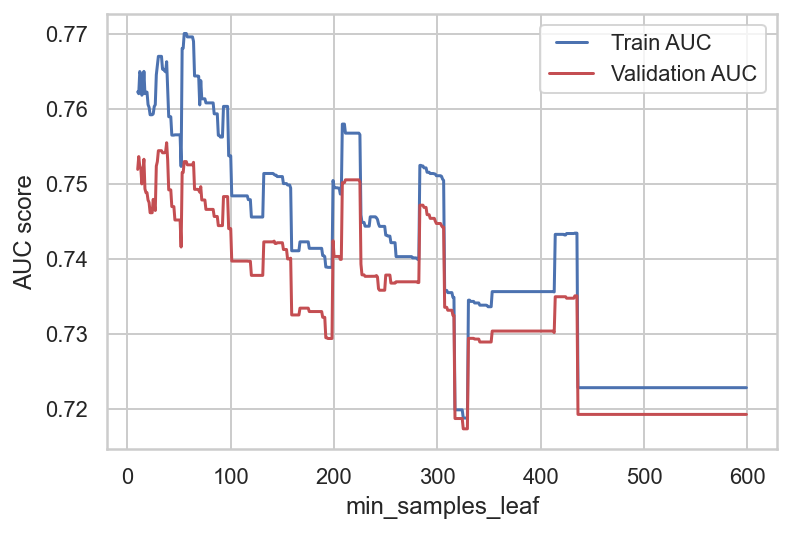

In [169]:
min_samples_leaf = list(range(10,600))
calculate_AUC(min_samples_leaf, X_train, X_val, y_train, y_val,'min_samples_leaf', 10)

In [153]:
dt_min_leaf38 = DecisionTreeClassifier(min_samples_leaf = 38).fit(X_train, y_train)
dt_min_leaf220 = DecisionTreeClassifier(min_samples_leaf = 220).fit(X_train, y_train)

df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Min leaf 1','Min leaf 38','Min leaf 220'])
show_results_1(df, dt_gini, dt_min_leaf38, dt_min_leaf220)

Time        Train    Validation
Min leaf 1    0.037+/-0.0   0.94+/-0.0  0.825+/-0.01
Min leaf 38   0.026+/-0.0  0.861+/-0.0  0.852+/-0.01
Min leaf 220   0.02+/-0.0  0.846+/-0.0  0.843+/-0.01

The best train value is  0.003614457831325301
The best validation value is  0.0024096385542168672


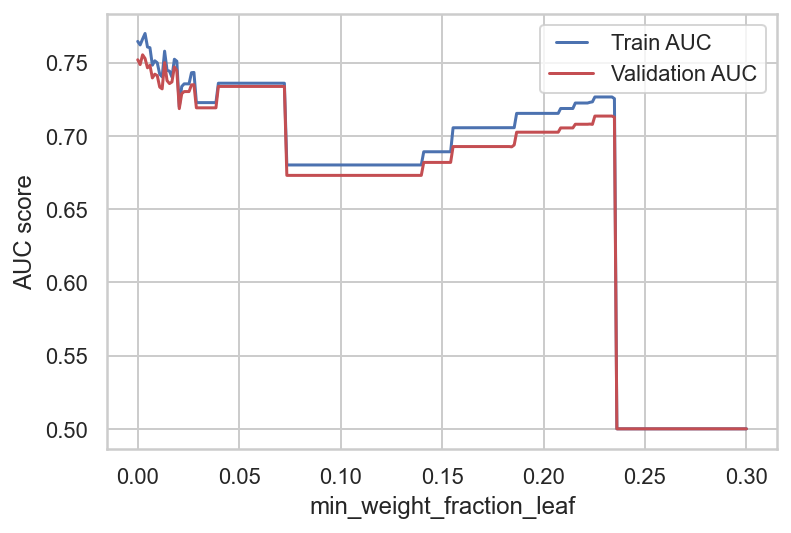

In [174]:
# More useful for imbalanced datasets!
min_weight_fraction_leaf = np.linspace(0, 0.3, 250, endpoint=True)
calculate_AUC(min_weight_fraction_leaf, X_train, X_val, y_train, y_val,'min_weight_fraction_leaf', 10)

In [173]:
dt_min_weight_1 = DecisionTreeClassifier(min_weight_fraction_leaf = 0.002).fit(X_train, y_train)
dt_min_weight_2 = DecisionTreeClassifier(min_weight_fraction_leaf = 0.05).fit(X_train, y_train)

df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Min leaf 1','Min weight small','Min weight med'])
show_results_1(df, dt_gini, dt_min_weight_1, dt_min_weight_2)

Time        Train    Validation
Min leaf 1        0.069+/-0.01   0.94+/-0.0  0.826+/-0.01
Min weight small  0.049+/-0.01  0.861+/-0.0  0.852+/-0.01
Min weight med     0.022+/-0.0  0.822+/-0.0  0.822+/-0.01

The best train value is  0.0
The best validation value is  0.0001002004008016032


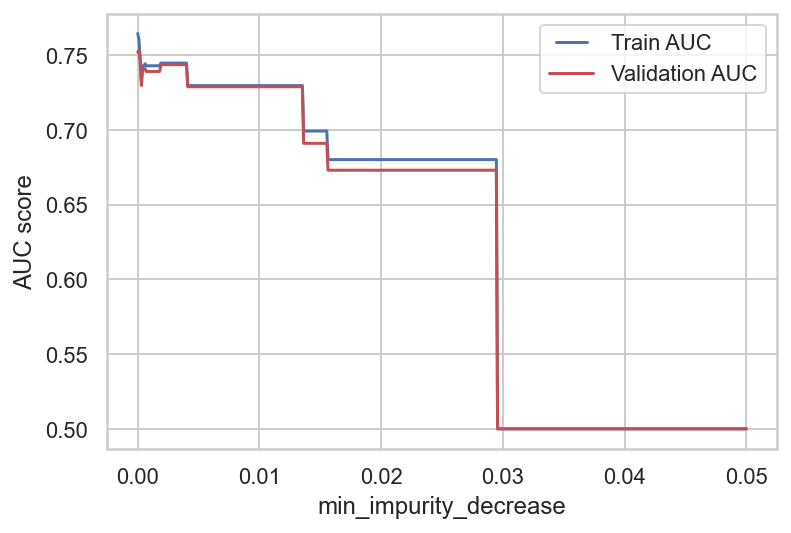

In [162]:
min_impurity_decrease = np.linspace(0, 0.05, 500, endpoint=True)
calculate_AUC(min_impurity_decrease, X_train, X_val, y_train, y_val,'min_impurity_decrease', 10)

In [154]:
dt_impurity01 = DecisionTreeClassifier(min_impurity_decrease=0.01).fit(X_train, y_train)
dt_impurity0001 = DecisionTreeClassifier(min_impurity_decrease=0.0001).fit(X_train, y_train)

df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Baseline','dt_impurity01','dt_impurity0001'])
show_results_1(df,dt_gini, dt_impurity01,dt_impurity0001)

Time        Train    Validation
Baseline         0.037+/-0.0   0.94+/-0.0  0.826+/-0.01
dt_impurity01    0.011+/-0.0  0.843+/-0.0  0.843+/-0.01
dt_impurity0001  0.022+/-0.0  0.868+/-0.0  0.856+/-0.01

Now, we will check which is the best ccp_alpha value.

In [155]:
dt_alpha = DecisionTreeClassifier(random_state=42)
path = dt_alpha.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

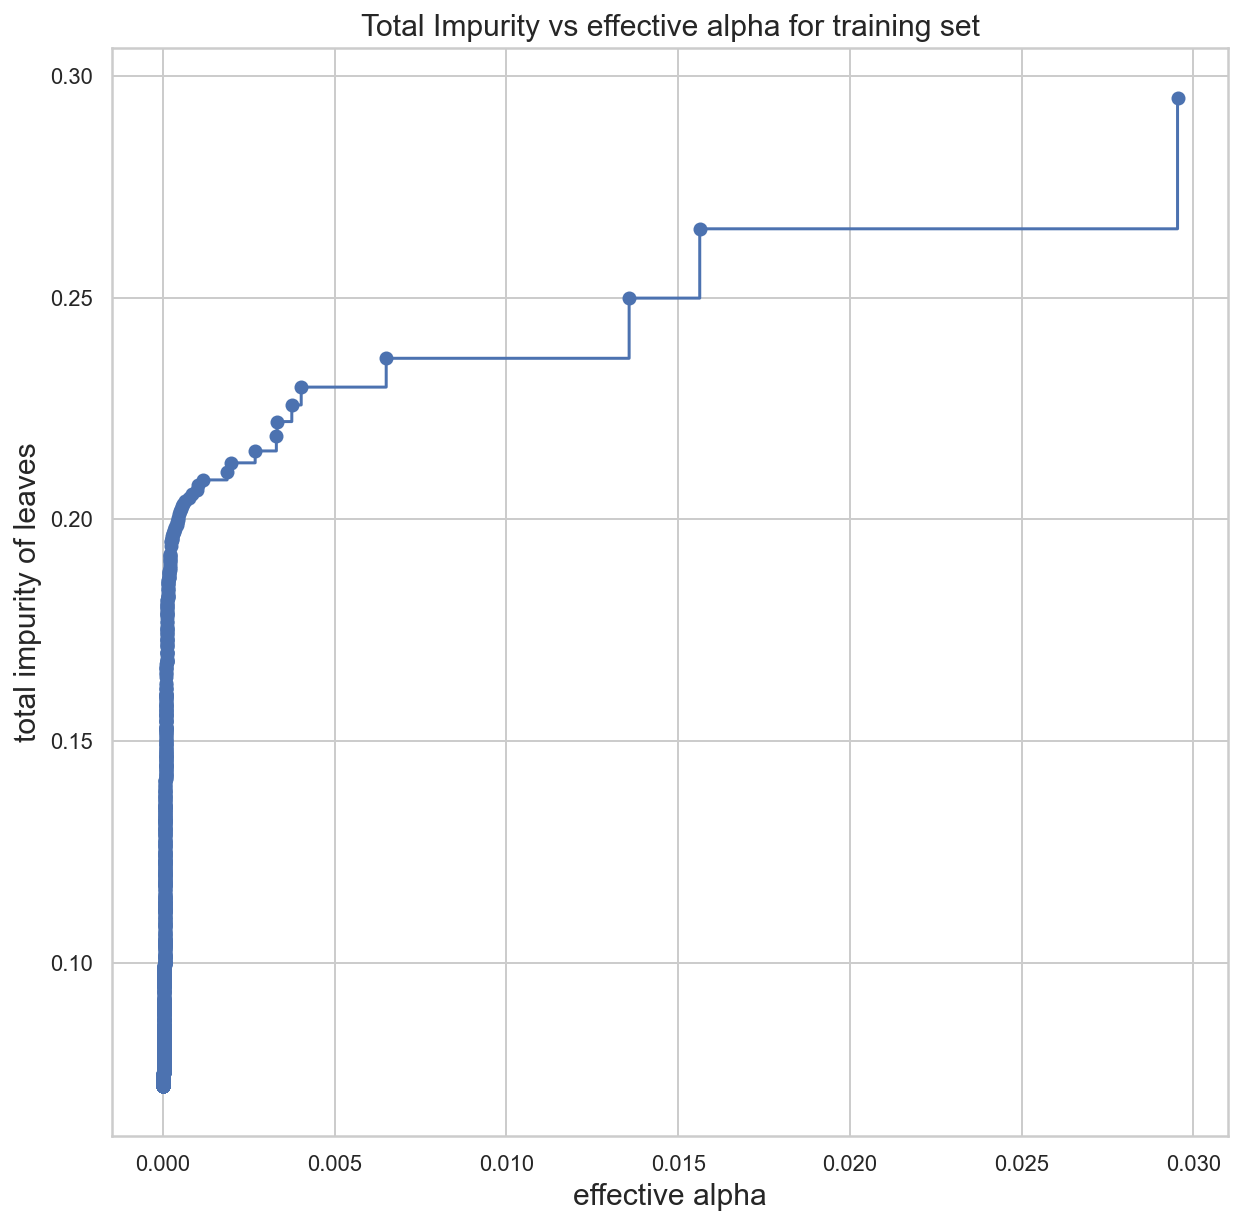

In [156]:
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha", fontsize=15)
ax.set_ylabel("total impurity of leaves", fontsize=15)
ax.set_title("Total Impurity vs effective alpha for training set", fontsize=15)

In [157]:
# The function below only accepts values higher than 0
ccp_alphas=ccp_alphas[ccp_alphas>0]

In [158]:
trees = []
for ccp_alpha in ccp_alphas:
    dt_alpha = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    trees.append(dt_alpha)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(trees[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0667089762462657


In [159]:
trees = trees[:-1]
ccp_alphas = ccp_alphas[:-1]

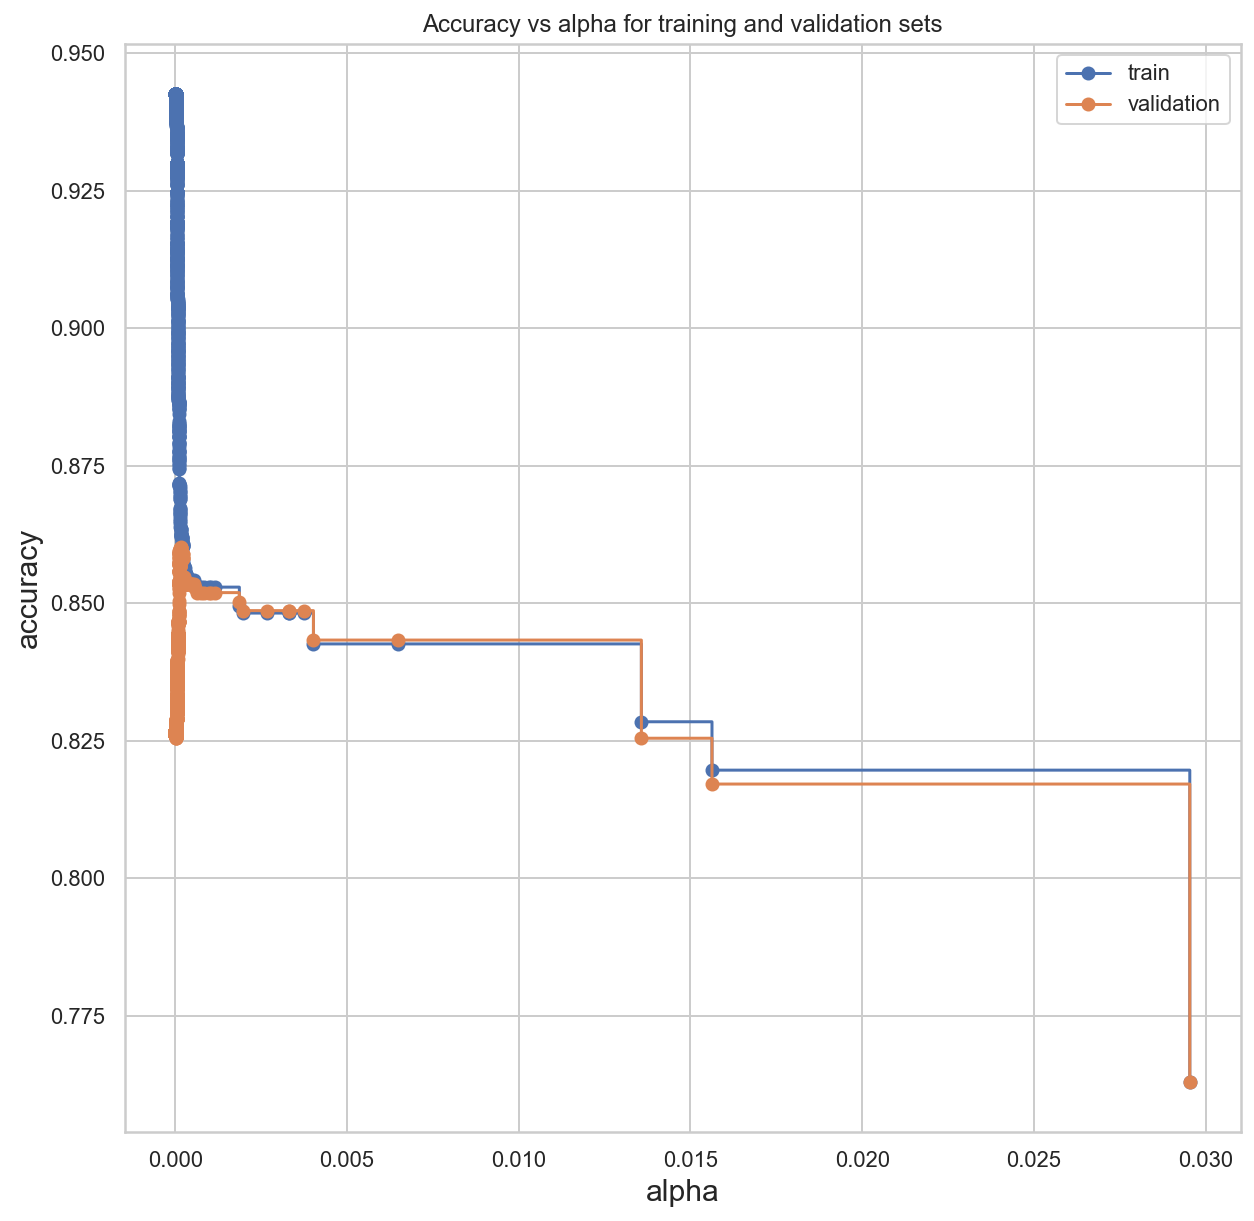

In [160]:
train_scores = [tree.score(X_train, y_train) for tree in trees]
val_scores = [tree.score(X_val, y_val) for tree in trees]

fig, ax = plt.subplots(figsize = (10,10))
ax.set_xlabel("alpha", fontsize=15)
ax.set_ylabel("accuracy", fontsize=15)
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [161]:
index_best_model = np.argmax(val_scores)
best_model = trees[index_best_model]
print('ccp_alpha of best model: ',trees[index_best_model])
print('_____________________________________________________________')
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Validation accuracy of best model: ',best_model.score(X_val, y_val))

ccp_alpha of best model:  DecisionTreeClassifier(ccp_alpha=0.00015941340116873795, random_state=42)
_____________________________________________________________
Training accuracy of best model:  0.8626913265306122
Validation accuracy of best model:  0.8602678571428571


The following cell is composed by 4 decision trees with different combinations of parameters.

In [166]:
dt_t1=DecisionTreeClassifier(min_impurity_decrease=0.0001,max_depth = 6,min_samples_split = 350,
                             min_weight_fraction_leaf = 0.002,random_state=42).fit(X_train, y_train)
dt_t2=DecisionTreeClassifier(max_depth = 6,min_weight_fraction_leaf = 0.002,random_state=42).fit(X_train, y_train)
dt_t3=DecisionTreeClassifier(min_samples_split = 350,min_weight_fraction_leaf = 0.002,
                             random_state=42).fit(X_train, y_train)
dt_t4=DecisionTreeClassifier(max_depth = 6,min_samples_split = 350,
                             min_weight_fraction_leaf = 0.002,random_state=42).fit(X_train, y_train)

In [167]:
print('Train accuracy:',dt_t1.score(X_train, y_train))
print('Validation accuracy:',dt_t1.score(X_val, y_val))

Train accuracy: 0.851594387755102
Validation accuracy: 0.8504464285714286


In [168]:
print('Train accuracy:',dt_t2.score(X_train, y_train))
print('Validation accuracy:',dt_t2.score(X_val, y_val))

Train accuracy: 0.8529336734693878
Validation accuracy: 0.8519345238095238


In [169]:
print('Train accuracy:',dt_t3.score(X_train, y_train))
print('Validation accuracy:',dt_t3.score(X_val, y_val))

Train accuracy: 0.8537627551020408
Validation accuracy: 0.8520833333333333


In [170]:
print('Train accuracy:',dt_t4.score(X_train, y_train))
print('Validation accuracy:',dt_t4.score(X_val, y_val))

Train accuracy: 0.851594387755102
Validation accuracy: 0.8504464285714286


In [200]:
# Also creating the tree with the best ccp_alpha
dt_t5=DecisionTreeClassifier(ccp_alpha=0.000159, random_state=42).fit(X_train, y_train)

print('Train accuracy:',dt_t5.score(X_train, y_train))
print('Validation accuracy:',dt_t5.score(X_val, y_val))

Train accuracy: 0.8630102040816326
Validation accuracy: 0.8601190476190477


In [196]:
# Check: does changing the threshold improve, or not, the accuracy?
threshold = 0.4

predicted_proba = dt_5.predict_proba(X_val)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_val, predicted)
accuracy

0.8550595238095238

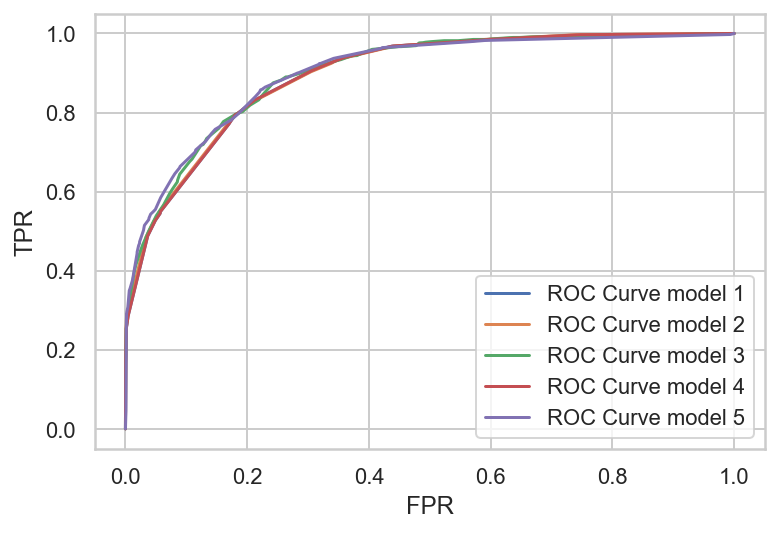

In [172]:
# To build the ROC curves
prob_model1 = dt_t1.predict_proba(X_val)
prob_model2 = dt_t2.predict_proba(X_val)
prob_model3 = dt_t3.predict_proba(X_val)
prob_model4 = dt_t4.predict_proba(X_val)
prob_model5 = dt_t5.predict_proba(X_val)

fpr_1, tpr_1, thresholds_1 = roc_curve(y_val, prob_model1[:, 1])
fpr_2, tpr_2, thresholds_2 = roc_curve(y_val, prob_model2[:, 1])
fpr_3, tpr_3, thresholds_3 = roc_curve(y_val, prob_model3[:, 1])
fpr_4, tpr_4, thresholds_4 = roc_curve(y_val, prob_model4[:, 1])
fpr_5, tpr_5, thresholds_5 = roc_curve(y_val, prob_model5[:, 1])

plt.plot(fpr_1, tpr_1, label="ROC Curve model 1")
plt.plot(fpr_2, tpr_2, label="ROC Curve model 2")
plt.plot(fpr_3, tpr_3, label="ROC Curve model 3")
plt.plot(fpr_4, tpr_4, label="ROC Curve model 4")
plt.plot(fpr_5, tpr_5, label="ROC Curve model 5")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

The best one is decision tree 5 (dt_t5).

In [165]:
labels_train = dt_t5.predict(X_train)
labels_val = dt_t5.predict(X_val) 

metrics(y_train, labels_train, y_val, labels_val)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     11962
           1       0.81      0.55      0.66      3718

    accuracy                           0.86     15680
   macro avg       0.84      0.76      0.79     15680
weighted avg       0.86      0.86      0.85     15680

[[11476   486]
 [ 1662  2056]]
__________________________+_________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5127
           1       0.80   

In [175]:
# Check the complexity of the "best" tree
print('The "best" tree has a depth of ' + str(dt_t5.get_depth()) + ', ' + str(dt_t5.tree_.node_count) + 
       ' nodes and a total of ' + str(dt_t5.get_n_leaves()) + ' leaves.')

The "best" tree has a depth of 17, 171 nodes and a total of 86 leaves.


### Random Forests

First, generate the OOB error rate against the n_estimators, to check the ideal number of trees a random forest should have, to minimize the out-of-bag error.

In [180]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='auto'",
        RandomForestClassifier(oob_score=True,
                               max_features='auto',
                               random_state=42)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(max_features='log2',
                               oob_score=True,
                               random_state=42)),
    ("RandomForestClassifier, max_features=6",
        RandomForestClassifier(max_features=6,
                               oob_score=True,
                               random_state=42)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(max_features=None,
                               oob_score=True,
                               random_state=42))
]

In [181]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of n_estimators values to explore
min_estimators = 15
max_estimators = 175 #225

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each n_estimators=i setting
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

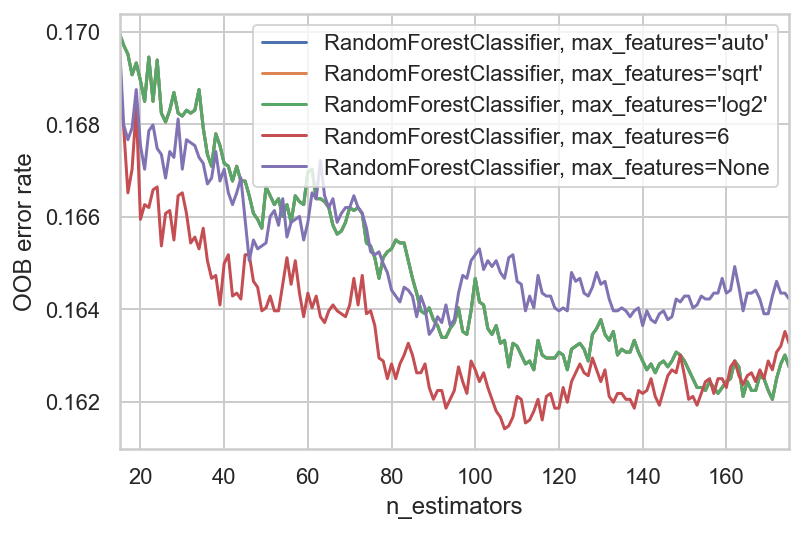

In [182]:
# Generate the "OOB error rate" vs "n_estimators" plot
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

Using the n_estimators gotten from the previous graph (110), and the other parameters from the Decision Trees section:

In [340]:
rf_1 = RandomForestClassifier(min_samples_split = 350, min_weight_fraction_leaf = 0.002,
                              random_state=42).fit(X_train, y_train)
rf_2 = RandomForestClassifier(ccp_alpha=0.000159, random_state=42).fit(X_train, y_train)
rf_3 = RandomForestClassifier(max_depth = 6, min_weight_fraction_leaf = 0.002, random_state=42).fit(X_train, y_train)
rf_4 = RandomForestClassifier(n_estimators=110, max_depth=6, random_state = 42).fit(X_train, y_train)
rf_5 = RandomForestClassifier(n_estimators=110, max_depth=6, max_features = 6, random_state = 42).fit(X_train, y_train)

In [184]:
print('Train accuracy:',rf_1.score(X_train, y_train))
print('Validation accuracy:',rf_1.score(X_val, y_val))

Train accuracy: 0.8541454081632653
Validation accuracy: 0.8540178571428572


In [341]:
print('Train accuracy:',rf_2.score(X_train, y_train))
print('Validation accuracy:',rf_2.score(X_val, y_val))

Train accuracy: 0.8790816326530613
Validation accuracy: 0.8572916666666667


In [193]:
print('Train accuracy:',rf_3.score(X_train, y_train))
print('Validation accuracy:',rf_3.score(X_val, y_val))

Train accuracy: 0.8533801020408164
Validation accuracy: 0.8519345238095238


In [195]:
print('Train accuracy:',rf_4.score(X_train, y_train))
print('Validation accuracy:',rf_4.score(X_val, y_val))

Train accuracy: 0.8551658163265307
Validation accuracy: 0.8517857142857143


In [200]:
print('Train accuracy:',rf_5.score(X_train, y_train))
print('Validation accuracy:',rf_5.score(X_val, y_val))

Train accuracy: 0.8557397959183674
Validation accuracy: 0.8529761904761904


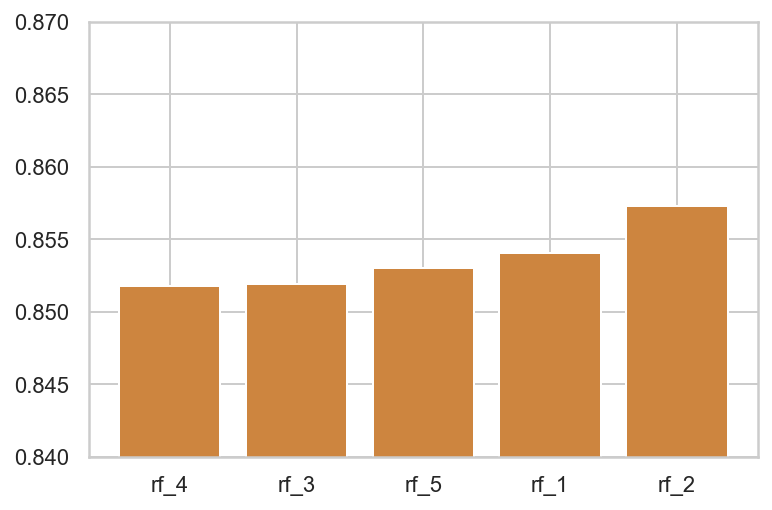

In [201]:
# Plot the models' accuracies
models = ['rf_1', 'rf_2', 'rf_3','rf_4','rf_5']

accuracies = [rf_1.score(X_val, y_val), rf_2.score(X_val, y_val), rf_3.score(X_val, y_val), 
              rf_4.score(X_val, y_val),rf_5.score(X_val, y_val)]

data_tuples = list(zip(models,accuracies))

data = pd.DataFrame(data_tuples)
data = data.sort_values(1)

plt.bar(data[0], data[1], color='peru')
plt.ylim(0.84, 0.87)
plt.show()

The best one is random forest 2 (rf_2).

In [343]:
labels_train = rf_2.predict(X_train)
labels_val = rf_2.predict(X_val) 

metrics(y_train, labels_train, y_val, labels_val)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     11962
           1       0.82      0.63      0.71      3718

    accuracy                           0.88     15680
   macro avg       0.86      0.79      0.82     15680
weighted avg       0.88      0.88      0.87     15680

[[11454   508]
 [ 1388  2330]]
__________________________+_________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5127
           1       0.77   

In [198]:
# Changing the threshold does not seem to improve the accuracy of the best random forest!
threshold = 0.4

predicted_proba = rf_2.predict_proba(X_val)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_val, predicted)
accuracy

0.8571428571428571

In [344]:
# Also check f1-score micro
f1_score(y_val, labels_val, average='micro')

0.8572916666666667

### Logistic Regression

In [152]:
# Defining the model
log_model = LogisticRegression(random_state=4)

In [243]:
# Fit model to our train data
log_model.fit(X_train,y_train)

LogisticRegression(random_state=4)

In [244]:
# Predict class labels for samples in X_train
labels_train = log_model.predict(X_train)
log_model.score(X_train, y_train)

0.8422831632653062

In [246]:
# Predict class labels for samples in X_val
labels_val = log_model.predict(X_val) 
log_model.score(X_val, y_val)

0.8450892857142858

In [156]:
pred_prob = log_model.predict_proba(X_val) 
pred_prob

array([[0.77539968, 0.22460032],
       [0.98820754, 0.01179246],
       [0.48078694, 0.51921306],
       ...,
       [0.77977821, 0.22022179],
       [0.2111217 , 0.7888783 ],
       [0.92778066, 0.07221934]])

In [157]:
X_train.columns

Index(['Male', 'x1_Management', 'x1_Professor', 'x2_Married', 'x2_Single',
       'x5_1', 'x5_3', 'Years of Education', 'Money Received', 'Ticket Price',
       'Age', 'Working hours * Years of Education'],
      dtype='object')

In [158]:
log_model.coef_
# Since we don't have the residuals, we cannot use the OLS, not applied to logistic regression

array([[ 0.20713477,  0.79360677,  0.49667638,  2.15371552, -0.46836093,
         4.25245138, -0.42555478,  4.23855478,  2.37394443,  1.86944684,
         1.59418237,  4.05710623]])

In [247]:
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['Raw'])
show_results(df, log_model)

Time        Train    Validation  Iterations
Raw  0.112+/-0.02  0.843+/-0.0  0.843+/-0.01  58.9+/-5.4

In [159]:
# Check the metrics on the logistic regression
metrics(y_train, labels_train, y_val, labels_val)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11962
           1       0.73      0.53      0.62      3718

    accuracy                           0.84     15680
   macro avg       0.80      0.74      0.76     15680
weighted avg       0.83      0.84      0.83     15680

[[11225   737]
 [ 1736  1982]]
__________________________+_________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      5127
           1       0.74   

### Gaussian Naive Bayes

In [155]:
# Initialize the model
modelNB = GaussianNB(var_smoothing=0.001)
# Fit it to the train data
modelNB.fit(X = X_train, y = y_train)
# Make the predictions
labels_train = modelNB.predict(X_train)
labels_val = modelNB.predict(X_val)
modelNB.predict_proba(X_val)

array([[9.99697778e-01, 3.02222484e-04],
       [9.99999301e-01, 6.98977699e-07],
       [8.15278926e-01, 1.84721074e-01],
       ...,
       [9.99936666e-01, 6.33343805e-05],
       [2.75805861e-01, 7.24194139e-01],
       [9.99962068e-01, 3.79321579e-05]])

In [173]:
print("train score:", modelNB.score(X_train, y_train))
print("validation score:",modelNB.score(X_val, y_val))

train score: 0.8199617346938776
validation score: 0.8242559523809524


In [ ]:
print(modelNB.class_prior_)
print(modelNB.class_count_)

In [255]:
df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Raw'])
show_results_1(df, modelNB)

Time       Train   Validation
Raw  0.01+/-0.0  0.82+/-0.0  0.82+/-0.01

In [175]:
# Check metrics on GNB
metrics(y_train, labels_train, y_val, labels_val)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     11962
           1       0.72      0.39      0.51      3718

    accuracy                           0.82     15680
   macro avg       0.78      0.67      0.70     15680
weighted avg       0.81      0.82      0.80     15680

[[11393   569]
 [ 2254  1464]]
__________________________+_________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      5127
           1       0.74   

### Neural Networks

In [302]:
model = MLPClassifier(random_state=4)
model.fit(X_train, y_train)
labels_train = model.predict(X_train)
labels_val = model.predict(X_val)

In [303]:
metrics(y_train, labels_train, y_val, labels_val)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11962
           1       0.75      0.58      0.65      3718

    accuracy                           0.85     15680
   macro avg       0.81      0.76      0.78     15680
weighted avg       0.85      0.85      0.85     15680

[[11222   740]
 [ 1556  2162]]
__________________________+_________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5127
           1       0.74   

In [304]:
labels_val

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

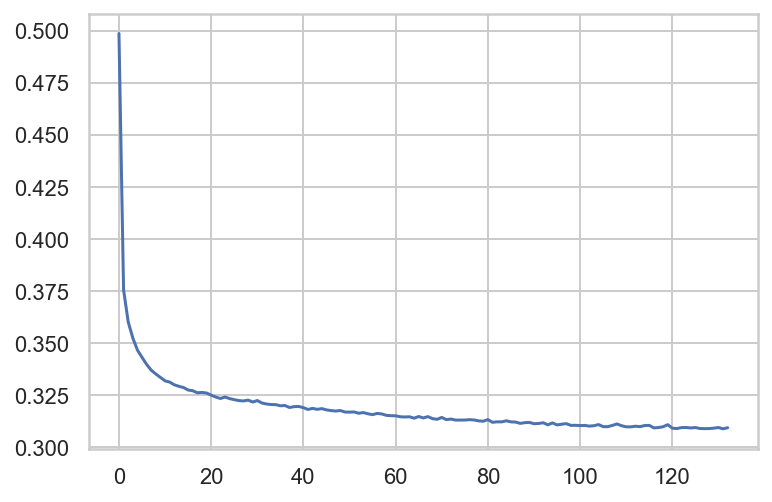

In [182]:
losses = model.loss_curve_
iterations = range(model.n_iter_)
sns.lineplot(iterations, losses)

In [183]:
model.loss_

0.3093838281848804

In [181]:
model = MLPClassifier(random_state=4)
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['Raw'])
show_results(df, model)

Time        Train          Val    Iterations
Raw  20.237+/-2.57  0.855+/-0.0  0.85+/-0.01  142.9+/-17.3

In [189]:
model_1 = MLPClassifier(hidden_layer_sizes=(1),random_state=4)
model_2 = MLPClassifier(hidden_layer_sizes=(3),random_state=4)
model_3 = MLPClassifier(hidden_layer_sizes=(9),random_state=4)
model_4 = MLPClassifier(hidden_layer_sizes=(3, 3),random_state=4)
model_5 = MLPClassifier(hidden_layer_sizes=(5, 5),random_state=4)
model_6 = MLPClassifier(hidden_layer_sizes=(3, 3, 3),random_state=4) # 3 layers each one with 3 units

In [190]:
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['M_1','M_2','M_3', 'M_4','M_5','M_6'])
show_results(df, model_1, model_2, model_3, model_4, model_5, model_6)

Time        Train           Val    Iterations
M_1  3.916+/-0.22  0.843+/-0.0  0.843+/-0.01   139.0+/-5.7
M_2   3.94+/-0.43  0.844+/-0.0  0.844+/-0.01  123.3+/-13.8
M_3  4.535+/-0.55  0.846+/-0.0  0.847+/-0.01  126.2+/-13.5
M_4   7.552+/-0.6  0.846+/-0.0  0.846+/-0.01  175.3+/-12.8
M_5  9.747+/-0.87   0.85+/-0.0  0.848+/-0.01  193.1+/-11.3
M_6    8.23+/-1.6  0.848+/-0.0  0.847+/-0.01  149.4+/-30.5

In [191]:
model_7 = MLPClassifier(hidden_layer_sizes=(4, 4)+,random_state=4)
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['M_7'])
show_results(df, model_7)

Time        Train           Val    Iterations
M_7  8.547+/-0.55  0.848+/-0.0  0.847+/-0.01  188.8+/-10.0

In [192]:
model_logistic = MLPClassifier(activation = 'logistic',random_state=4)
model_tanh = MLPClassifier(activation = 'tanh',random_state=4)
model_relu = MLPClassifier(activation = 'relu',random_state=4)

In [193]:
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['logistic','tanh','relu'])
show_results(df, model_logistic, model_tanh,model_relu)

Time        Train           Val    Iterations
logistic   7.009+/-0.87  0.844+/-0.0  0.843+/-0.01    71.1+/-6.5
tanh      22.838+/-0.82   0.85+/-0.0  0.849+/-0.01   200.0+/-0.0
relu      23.397+/-2.82  0.855+/-0.0   0.85+/-0.01  142.9+/-17.3

Logistic is better: same score in less iterations

Logistic provides a nomalized output between 0 and 1

In [194]:
model_lbfgs = MLPClassifier(solver = 'lbfgs',random_state=4) # Low dim and sparse data
model_sgd = MLPClassifier(solver = 'sgd',random_state=4) # Accuracy > processing time
model_adam = MLPClassifier(solver = 'adam',random_state=4) # Big dataset but might fail to converge

In [196]:
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['lbfgs','sgd','adam'])
show_results(df, model_lbfgs, model_sgd, model_adam)

Time        Train           Val    Iterations
lbfgs  24.185+/-0.81  0.853+/-0.0  0.848+/-0.01   200.0+/-0.0
sgd    30.834+/-1.94  0.843+/-0.0  0.842+/-0.01  189.8+/-10.1
adam   24.194+/-3.53  0.855+/-0.0   0.85+/-0.01  142.9+/-17.3

In [197]:
model_constant = MLPClassifier(solver = 'sgd', learning_rate = 'constant',random_state=4)
model_invscaling = MLPClassifier(solver = 'sgd', learning_rate = 'invscaling',random_state=4)
model_adaptive = MLPClassifier(solver = 'sgd', learning_rate = 'adaptive',random_state=4)

In [198]:
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['constant','invscaling','adaptive'])
show_results(df, model_constant, model_invscaling, model_adaptive)

Time        Train           Val    Iterations
constant    32.217+/-2.34  0.843+/-0.0  0.842+/-0.01  189.8+/-10.1
invscaling    3.437+/-0.3  0.763+/-0.0  0.763+/-0.01    20.0+/-0.0
adaptive    32.341+/-1.68  0.843+/-0.0  0.842+/-0.01   200.0+/-0.0

Constant is the best

In [199]:
model_a = MLPClassifier(solver = 'adam', learning_rate_init = 0.5,random_state=4)
model_b = MLPClassifier(solver = 'adam', learning_rate_init = 0.1,random_state=4)
model_c = MLPClassifier(solver = 'adam', learning_rate_init = 0.01,random_state=4)
model_d = MLPClassifier(solver = 'adam', learning_rate_init = 0.001,random_state=4)

In [200]:
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['M_a','M_b','M_c', "M_d"])
show_results(df, model_a, model_b, model_c, model_d)

Time         Train           Val    Iterations
M_a   3.602+/-0.96  0.842+/-0.01  0.841+/-0.01    22.0+/-5.5
M_b   5.775+/-0.95  0.847+/-0.01  0.849+/-0.01    37.7+/-6.0
M_c   13.97+/-4.13   0.855+/-0.0    0.85+/-0.0  100.0+/-25.0
M_d  20.178+/-2.68   0.855+/-0.0   0.85+/-0.01  142.9+/-17.3

The best is 0.1 or 0.01, so we'll test them

In [201]:
model_e = MLPClassifier(solver = 'adam', learning_rate_init = 0.005,random_state=4)
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ["M_e"])
show_results(df, model_e)

Time        Train           Val    Iterations
M_e  18.101+/-4.15  0.856+/-0.0  0.852+/-0.01  120.1+/-28.1

In [202]:
model_batch20 = MLPClassifier(solver = 'sgd', batch_size = 20,random_state=4)
model_batch50 = MLPClassifier(solver = 'sgd', batch_size = 50,random_state=4)
model_batch100 = MLPClassifier(solver = 'sgd', batch_size = 100,random_state=4)
model_batch200 = MLPClassifier(solver = 'sgd', batch_size = 200,random_state=4)
model_batch500 = MLPClassifier(solver = 'sgd', batch_size = 500,random_state=4)

In [203]:
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['batch 20','batch 50','batch 100', 'batch 200', 'batch 500'])
show_results(df, model_batch20, model_batch50, model_batch100,  model_batch200, model_batch500)

Time        Train           Val    Iterations
batch 20     60.46+/-2.85  0.848+/-0.0  0.846+/-0.01   193.9+/-9.8
batch 50   52.394+/-10.32  0.845+/-0.0  0.844+/-0.01  183.1+/-34.6
batch 100   27.726+/-1.79  0.844+/-0.0  0.843+/-0.01   151.3+/-7.7
batch 200   25.611+/-1.59  0.843+/-0.0  0.842+/-0.01  189.8+/-10.1
batch 500   20.813+/-0.49  0.838+/-0.0  0.837+/-0.01   200.0+/-0.0

The best one is batch 50

In [204]:
model_maxiter_50 = MLPClassifier(max_iter = 50,random_state=4)
model_maxiter_100 = MLPClassifier(max_iter = 100,random_state=4)
model_maxiter_200 = MLPClassifier(max_iter = 200,random_state=4)
model_maxiter_300 = MLPClassifier(max_iter = 300,random_state=4)

In [205]:
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['max iter 50','max iter 100','max iter 200', 'max iter 300'])
show_results(df, model_maxiter_50, model_maxiter_100, model_maxiter_200, model_maxiter_300)

Time        Train           Val    Iterations
max iter 50    6.779+/-0.13  0.851+/-0.0  0.849+/-0.01    50.0+/-0.0
max iter 100   13.894+/-0.4  0.854+/-0.0   0.85+/-0.01   100.0+/-0.0
max iter 200  19.708+/-2.41  0.855+/-0.0   0.85+/-0.01  142.9+/-17.3
max iter 300  19.896+/-2.42  0.855+/-0.0   0.85+/-0.01  142.9+/-17.3

In [206]:
model_maxiter_150 = MLPClassifier(max_iter = 150,random_state=4)
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['max iter 150'])
show_results(df, model_maxiter_150)

Time        Train          Val    Iterations
max iter 150  19.374+/-2.42  0.854+/-0.0  0.85+/-0.01  138.6+/-13.2

In [207]:
model_all=MLPClassifier(hidden_layer_sizes=(9),activation = 'logistic',solver = 'adam',learning_rate_init = 0.1,batch_size = 50,random_state=4)
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['Raw'])
show_results(df, model_all)

Time        Train           Val   Iterations
Raw  3.596+/-1.49  0.845+/-0.0  0.842+/-0.01  33.0+/-13.4

In [160]:
model_grid=model_all=MLPClassifier(activation= 'logistic', batch_size= 100, hidden_layer_sizes=(9), learning_rate_init= 0.02102040816326531, max_iter= 150, solver= 'adam',random_state=4)
df = pd.DataFrame(columns = ['Time','Train','Validation','Iterations'], index = ['Raw'])
show_results(df, model_grid)

Time        Train           Val   Iterations
Raw  6.953+/-0.97  0.851+/-0.0  0.842+/-0.01  71.6+/-10.3

In [208]:
# parameter_space1 = {
#     'hidden_layer_sizes': [(9),(5,5),(3, 3, 3)],
#     'activation': ['logistic','relu'],
#     'solver': ['lbfgs', 'adam'],
#     'learning_rate_init': [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01],
#     'batch_size': [(20),(50)], 
#     'max_iter': [(150),(200)],
# }
# clf1 = GridSearchCV(model, parameter_space1,n_jobs=-1)
# clf1.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(random_state=4), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'batch_size': [20, 50],
                         'hidden_layer_sizes': [9, (5, 5), (3, 3, 3)],
                         'learning_rate_init': [0.001, 0.002, 0.003, 0.004,
                                                0.005, 0.006, 0.007, 0.008,
                                                0.009, 0.01],
                         'max_iter': [150, 200], 'solver': ['lbfgs', 'adam']})

In [209]:
# clf1.best_params_

{'activation': 'relu',
 'batch_size': 20,
 'hidden_layer_sizes': (5, 5),
 'learning_rate_init': 0.004,
 'max_iter': 150,
 'solver': 'adam'}

In [337]:
modelNN_best=MLPClassifier(activation= 'relu',batch_size= 20, hidden_layer_sizes= (5, 5),learning_rate_init= 0.004,max_iter= 150,solver= 'adam')
df= pd.DataFrame(columns = ['Time','Train','Val', 'Iterations'], index = ['Raw'])
show_results(df, modelNN_best)

Time       Train           Val   Iterations
Raw  43.549+/-9.55  0.85+/-0.0  0.849+/-0.01  88.3+/-20.7

In [212]:
# # Best parameter set
# print('------------------------------------------------------------------------------------------------------------------------')
# print('Best parameters found:\n', clf1.best_params_)
# print('------------------------------------------------------------------------------------------------------------------------')

# # All results
# means = clf1.cv_results_['mean_test_score']
# stds = clf1.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf1.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'activation': 'relu', 'batch_size': 20, 'hidden_layer_sizes': (5, 5), 'learning_rate_init': 0.004, 'max_iter': 150, 'solver': 'adam'}
------------------------------------------------------------------------------------------------------------------------
0.848 (+/-0.005) for {'activation': 'logistic', 'batch_size': 20, 'hidden_layer_sizes': 9, 'learning_rate_init': 0.001, 'max_iter': 150, 'solver': 'lbfgs'}
0.844 (+/-0.008) for {'activation': 'logistic', 'batch_size': 20, 'hidden_layer_sizes': 9, 'learning_rate_init': 0.001, 'max_iter': 150, 'solver': 'adam'}
0.849 (+/-0.006) for {'activation': 'logistic', 'batch_size': 20, 'hidden_layer_sizes': 9, 'learning_rate_init': 0.001, 'max_iter': 200, 'solver': 'lbfgs'}
0.844 (+/-0.009) for {'activation': 'logistic', 'batch_size': 20, 'hidden_layer_sizes': 9, 'learning_rate_init': 0.001, 'max_iter': 

In [338]:
# Model with best accuracy
labels_train = modelNN_best.predict(X_train)
labels_val = modelNN_best.predict(X_val)
metrics(y_train, labels_train, y_val, labels_val)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     11962
           1       0.80      0.46      0.58      3718

    accuracy                           0.84     15680
   macro avg       0.83      0.71      0.74     15680
weighted avg       0.84      0.84      0.83     15680

[[11537   425]
 [ 2012  1706]]
__________________________+_________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      5127
           1       0.81   

In [339]:
# Check f1-score micro
f1_score(y_val, labels_val, average='micro')

0.8495535714285715

### K-Nearest Neighbors

The number K is typically chosen as the square root of the total number of points in the training data set. Thus, in this case, N is 15680, so K = 125.

Text(0, 0.5, 'Validation Accuracy')

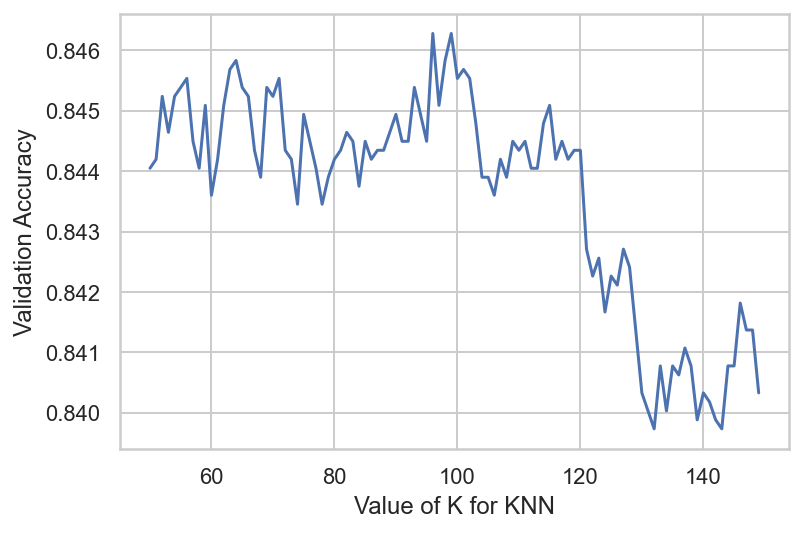

In [199]:
# Try K=50 through K=150 and record validation accuracy
k_range = range(50, 150)

scores = []

# We use a loop through the range
# We append the scores in the list
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    scores.append(accuracy_score(y_val, y_pred))

# Plot the relationship between K and validation accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Validation Accuracy')

Now, testing many different combinations of parameters.

In [215]:
modelKNN1 = KNeighborsClassifier().fit(X = X_train, y = y_train)

In [216]:
print("train score:", modelKNN1.score(X_train, y_train))
print("validation score:",modelKNN1.score(X_val, y_val))

train score: 0.8746173469387755
validation score: 0.8373511904761904


In [217]:
modelKNN2 = KNeighborsClassifier(n_neighbors=100).fit(X = X_train, y = y_train)

In [218]:
print("train score:", modelKNN2.score(X_train, y_train))
print("validation score:",modelKNN2.score(X_val, y_val))

train score: 0.8450255102040817
validation score: 0.8455357142857143


In [219]:
# From the available algorithms (excluding the default), this was the best one
modelKNN3 = KNeighborsClassifier(n_neighbors=100, algorithm='ball_tree').fit(X = X_train, y = y_train)

In [220]:
print("train score:", modelKNN3.score(X_train, y_train))
print("validation score:",modelKNN3.score(X_val, y_val))

train score: 0.8452806122448979
validation score: 0.8459821428571429


In [221]:
modelKNN4 = KNeighborsClassifier(n_neighbors=100, p=1).fit(X = X_train, y = y_train)

In [222]:
print("train score:", modelKNN4.score(X_train, y_train))
print("validation score:",modelKNN4.score(X_val, y_val))

train score: 0.8454081632653061
validation score: 0.8464285714285714


In [223]:
modelKNN5 = KNeighborsClassifier(n_neighbors=100, weights='distance').fit(X = X_train, y = y_train)

In [224]:
print("train score:", modelKNN5.score(X_train, y_train))
print("validation score:",modelKNN5.score(X_val, y_val))

train score: 0.9426658163265306
validation score: 0.8369047619047619


In [225]:
modelKNN6 = KNeighborsClassifier(n_neighbors=100, algorithm='ball_tree', p=1).fit(X = X_train, y = y_train)

In [226]:
print("train score:", modelKNN6.score(X_train, y_train))
print("validation score:",modelKNN6.score(X_val, y_val))

train score: 0.8454081632653061
validation score: 0.846875


In [256]:
df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['modelKNN1', 'modelKNN2', 'modelKNN3', 'modelKNN4', 'modelKNN5', 'modelKNN6'])
show_results_1(df, modelKNN1, modelKNN2, modelKNN3, modelKNN4, modelKNN5, modelKNN6)

Time        Train    Validation
modelKNN1  0.391+/-0.06  0.874+/-0.0  0.833+/-0.01
modelKNN2  0.394+/-0.06  0.846+/-0.0  0.842+/-0.01
modelKNN3  0.321+/-0.05  0.846+/-0.0  0.842+/-0.01
modelKNN4  0.367+/-0.02  0.848+/-0.0  0.845+/-0.01
modelKNN5  0.345+/-0.02   0.94+/-0.0  0.833+/-0.01
modelKNN6  0.317+/-0.02  0.848+/-0.0  0.845+/-0.01

In [293]:
# Model with best accuracy
labels_train = modelKNN6.predict(X_train)
labels_val = modelKNN6.predict(X_val)
metrics(y_train, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11962
           1       0.72      0.57      0.63      3718

    accuracy                           0.85     15680
   macro avg       0.80      0.75      0.77     15680
weighted avg       0.84      0.85      0.84     15680

[[11150   812]
 [ 1612  2106]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

### Passive Aggressive Classifier

In [ ]:
# Creating and fitting model
pac_basic = PassiveAggressiveClassifier(random_state=42)
pac_basic.fit(X_train, y_train)

pac_1 = PassiveAggressiveClassifier(C=0.001, fit_intercept=True, tol=1e-2, loss='squared_hinge',random_state=42)
pac_1.fit(X_train, y_train)

pac_2 = PassiveAggressiveClassifier(C=0.001, tol=1e-2, loss='squared_hinge',random_state=42)
pac_2.fit(X_train, y_train)

pac_3 = PassiveAggressiveClassifier(C=0.001, tol=1e-2, random_state=42)
pac_3.fit(X_train, y_train)

In [193]:
# Making prediction on the validation set 
val_pred_basic = pac_basic.predict(X_val)
val_pred_1 = pac_1.predict(X_val)
val_pred_2 = pac_2.predict(X_val)
val_pred_3 = pac_3.predict(X_val)

In [257]:
df = pd.DataFrame(columns = ['Time','Train','Validation','Iterations'], index = ['PAC_Basic','PAC_1','PAC_2','PAC_3'])
show_results(df, pac_basic, pac_1, pac_2, pac_3)

Time         Train    Validation  Iterations
PAC_Basic  0.033+/-0.01  0.734+/-0.08  0.736+/-0.08  11.5+/-3.7
PAC_1      0.026+/-0.01   0.841+/-0.0  0.841+/-0.01   7.6+/-0.5
PAC_2      0.025+/-0.01   0.841+/-0.0  0.841+/-0.01   7.6+/-0.5
PAC_3       0.03+/-0.01   0.838+/-0.0   0.837+/-0.0   8.0+/-0.0

In [195]:
labels_train = pac_1.predict(X_train)
accuracy_score(y_train, labels_train)

labels_val = pac_1.predict(X_val)
accuracy_score(y_val, labels_val)

metrics(y_train, labels_train, y_val, labels_val)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     11962
           1       0.80      0.41      0.55      3718

    accuracy                           0.84     15680
   macro avg       0.82      0.69      0.72     15680
weighted avg       0.83      0.84      0.82     15680

[[11587   375]
 [ 2180  1538]]
__________________________+_________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      5127
           1       0.80   

### Linear Discriminant Analysis

In [155]:
modelLDA = LinearDiscriminantAnalysis()
modelLDA.fit(X = X_train, y = y_train)
labels_train = modelLDA.predict(X_train)
labels_val = modelLDA.predict(X_val)
modelLDA.predict_proba(X_val)

array([[0.82721028, 0.17278972],
       [0.99408815, 0.00591185],
       [0.47144428, 0.52855572],
       ...,
       [0.72618119, 0.27381881],
       [0.22534779, 0.77465221],
       [0.95639608, 0.04360392]])

In [156]:
print("train score:", modelLDA.score(X_train, y_train))
print("validation score:",modelLDA.score(X_val, y_val))

train score: 0.8401147959183674
validation score: 0.8425595238095238


In [158]:
# grid = dict()
# grid['shrinkage'] = [None, arange(0, 1, 0.01)]
# grid['solver']=['svd', 'lsqr', 'eigen'] # svd cannot be tested with shrinkage

# # Define search
# search = GridSearchCV(modelLDA, grid, scoring='accuracy', n_jobs=-1)
# # Perform the search
# results = search.fit(X_train, y_train)
# # Summarize
# print('Mean Accuracy: %.3f' % results.best_score_)
# print('Config: %s' % results.best_params_)

Mean Accuracy: 0.840
Config: {'shrinkage': None, 'solver': 'lsqr'}


In [159]:
modelLDA_final = LinearDiscriminantAnalysis(solver='lsqr')
modelLDA_final.fit(X = X_train, y = y_train)
labels_train = modelLDA_final.predict(X_train)
labels_val = modelLDA_final.predict(X_val)
print("train score:", modelLDA_final.score(X_train, y_train))
print("validation score:",modelLDA_final.score(X_val, y_val))

train score: 0.8401147959183674
validation score: 0.8425595238095238


In [160]:
metrics(y_train, labels_train, y_val, labels_val)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     11962
           1       0.73      0.51      0.60      3718

    accuracy                           0.84     15680
   macro avg       0.80      0.73      0.75     15680
weighted avg       0.83      0.84      0.83     15680

[[11266   696]
 [ 1811  1907]]
__________________________+_________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5127
           1       0.74   

### Quadratic Discriminant Analysis

In [161]:
modelQDA = QuadraticDiscriminantAnalysis()
modelQDA.fit(X = X_train, y = y_train)
labels_train = modelQDA.predict(X_train)
labels_val = modelQDA.predict(X_val)
modelQDA.predict_proba(X_val)

array([[9.99714494e-01, 2.85506288e-04],
       [9.99999600e-01, 3.99624824e-07],
       [9.60581659e-01, 3.94183409e-02],
       ...,
       [9.99443273e-01, 5.56726951e-04],
       [9.23887352e-01, 7.61126477e-02],
       [9.99997128e-01, 2.87230751e-06]])

In [162]:
print("train score:", modelQDA.score(X_train, y_train))
print("validation score:",modelQDA.score(X_val, y_val))

train score: 0.8095025510204081
validation score: 0.8159226190476191


In [183]:
# # Define grid
# grid = dict()
# grid['reg_param'] = arange(0, 1, 0.01)
# # Define search
# search = GridSearchCV(modelQDA, grid, scoring='accuracy', n_jobs=-1)
# # Perform the search
# results = search.fit(X_train, y_train)
# # Summarize
# print('Mean Accuracy: %.3f' % results.best_score_)
# print('Config: %s' % results.best_params_)

Mean Accuracy: 0.833
Config: {'reg_param': 0.14}


In [163]:
modelQDA_final = QuadraticDiscriminantAnalysis(reg_param=0.14)
modelQDA_final.fit(X = X_train, y = y_train)
labels_train = modelQDA_final.predict(X_train)
labels_val = modelQDA_final.predict(X_val)
print("train score:", modelQDA_final.score(X_train, y_train))
print("validation score:",modelQDA_final.score(X_val, y_val))

train score: 0.8341198979591836
validation score: 0.8394345238095238


In [164]:
metrics(y_train, labels_train, y_val, labels_val)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     11962
           1       0.72      0.49      0.58      3718

    accuracy                           0.83     15680
   macro avg       0.79      0.71      0.74     15680
weighted avg       0.82      0.83      0.82     15680

[[11274   688]
 [ 1913  1805]]
__________________________+_________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5127
           1       0.74   

### Support Vector Machine

Testing several parameter combinations.

In [414]:
modelSVM_basic = SVC().fit(X_train, y_train)
modelSVM_1 = SVC(kernel='linear').fit(X_train, y_train)
modelSVM_2 = SVC(C=750).fit(X_train, y_train)
modelSVM_3 = SVC(kernel = 'poly').fit(X_train, y_train)
modelSVM_4 = SVC(C=750, kernel = 'poly').fit(X_train, y_train)
modelSVM_5 = SVC(C=750, kernel = 'linear').fit(X_train, y_train)
modelSVM_6 = SVC(C=750, shrinking=False).fit(X_train, y_train)
modelSVM_7 = SVC(C=750, tol=1e-2).fit(X_train, y_train)

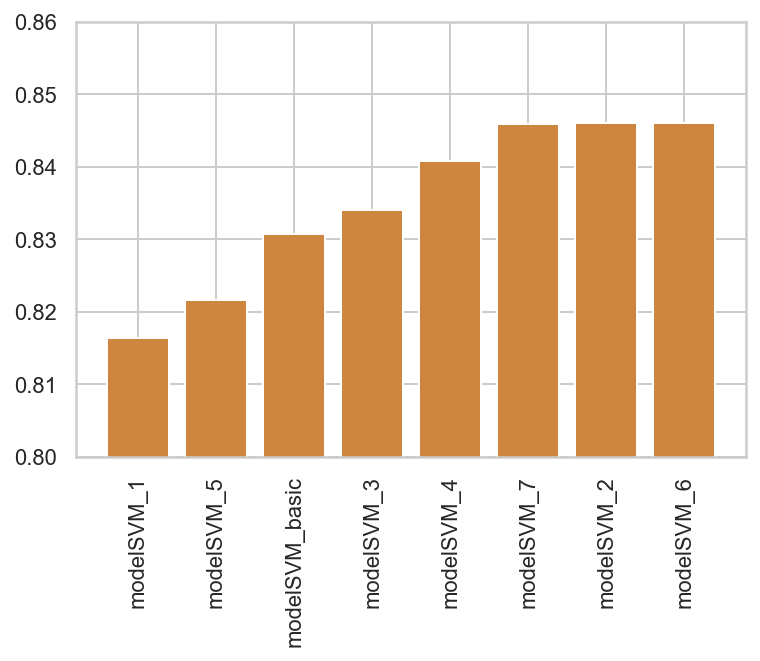

In [415]:
# Plot the model's accuracies
accuracies = [modelSVM_basic.score(X_val, y_val), modelSVM_1.score(X_val, y_val),
              modelSVM_2.score(X_val, y_val), modelSVM_3.score(X_val, y_val),
              modelSVM_4.score(X_val, y_val), modelSVM_5.score(X_val, y_val),
              modelSVM_6.score(X_val, y_val), modelSVM_7.score(X_val, y_val)]

models = ['modelSVM_basic', 'modelSVM_1', 'modelSVM_2', 'modelSVM_3', 
          'modelSVM_4', 'modelSVM_5', 'modelSVM_6', 'modelSVM_7']

data_tuples = list(zip(models,accuracies))

data = pd.DataFrame(data_tuples)

data = data.sort_values(1)

plt.bar(data[0], data[1], color='peru')
plt.xticks(rotation=90)
plt.ylim(0.80,0.86)

plt.show()

In [416]:
# Highest accuracy from the SVMs
modelSVM_6.score(X_val, y_val)

0.8460315883580014

In [417]:
# Check metrics on the best one
pred_train_svm = modelSVM_6.predict(X_train)
pred_val_svm = modelSVM_6.predict(X_val)

metrics(y_train, pred_train_svm, y_val, pred_val_svm)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     11962
           1       0.80      0.92      0.86     11525

    accuracy                           0.85     23487
   macro avg       0.86      0.85      0.85     23487
weighted avg       0.86      0.85      0.85     23487

[[ 9298  2664]
 [  908 10617]]
____________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      5127
           1       0.80   

### AdaBoost Classifier

The best train value is  87
The best val value is  87


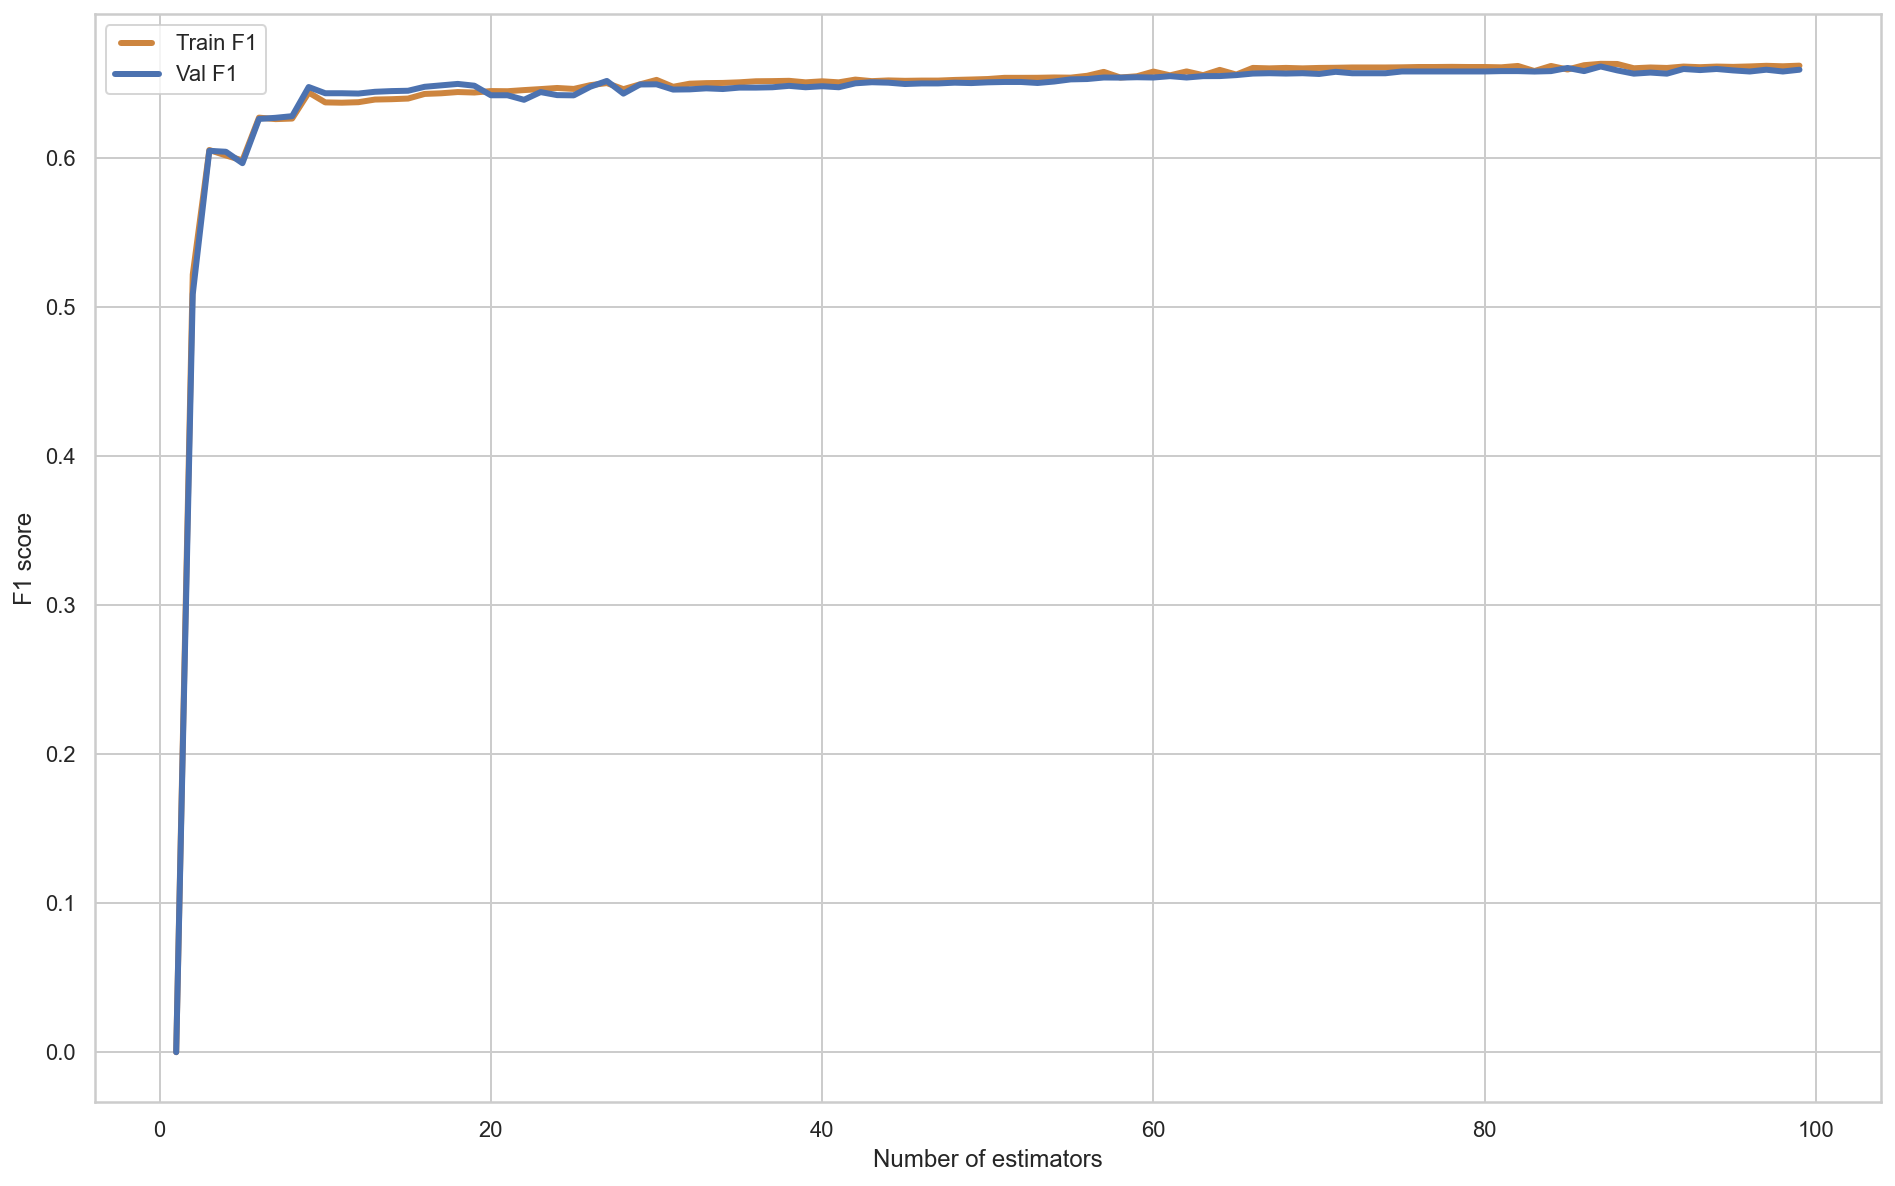

In [233]:
# Function to analyze the best parameter definitions
def calculate_f1(interval, x_train, x_val, y_train, y_val, parameter):
    train_results = []
    val_results = []
    for value in interval:
        if parameter == 'Number of estimators':
            dt = AdaBoostClassifier(n_estimators = value, random_state = 5)
        elif parameter == 'Learning Rate':
            dt = AdaBoostClassifier(learning_rate = value, random_state = 5)
        dt.fit(x_train, y_train)
        train_results.append(f1_score(y_train,dt.predict(x_train)))
        val_results.append(f1_score(y_val,dt.predict(x_val)))
    value_train = train_results.index(max(train_results))
    value_val = val_results.index(max(val_results))
    print('The best train value is ',interval[value_train])
    print('The best val value is ',interval[value_val])

    fig = plt.figure(figsize = (16,10))
    line1, = plt.plot(interval, train_results, '#515C60', label="Train F1", linewidth=3,color='peru')
    line2, = plt.plot(interval, val_results, '#C7DC1F', label="Val F1", linewidth=3,color='b')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel("F1 score")
    plt.xlabel(str(parameter))
    plt.show()
    
num_estimators = list(range(1,100))
calculate_f1(num_estimators, X_train, X_val, y_train, y_val,'Number of estimators')

The best train value is  1.26
The best val value is  1.26


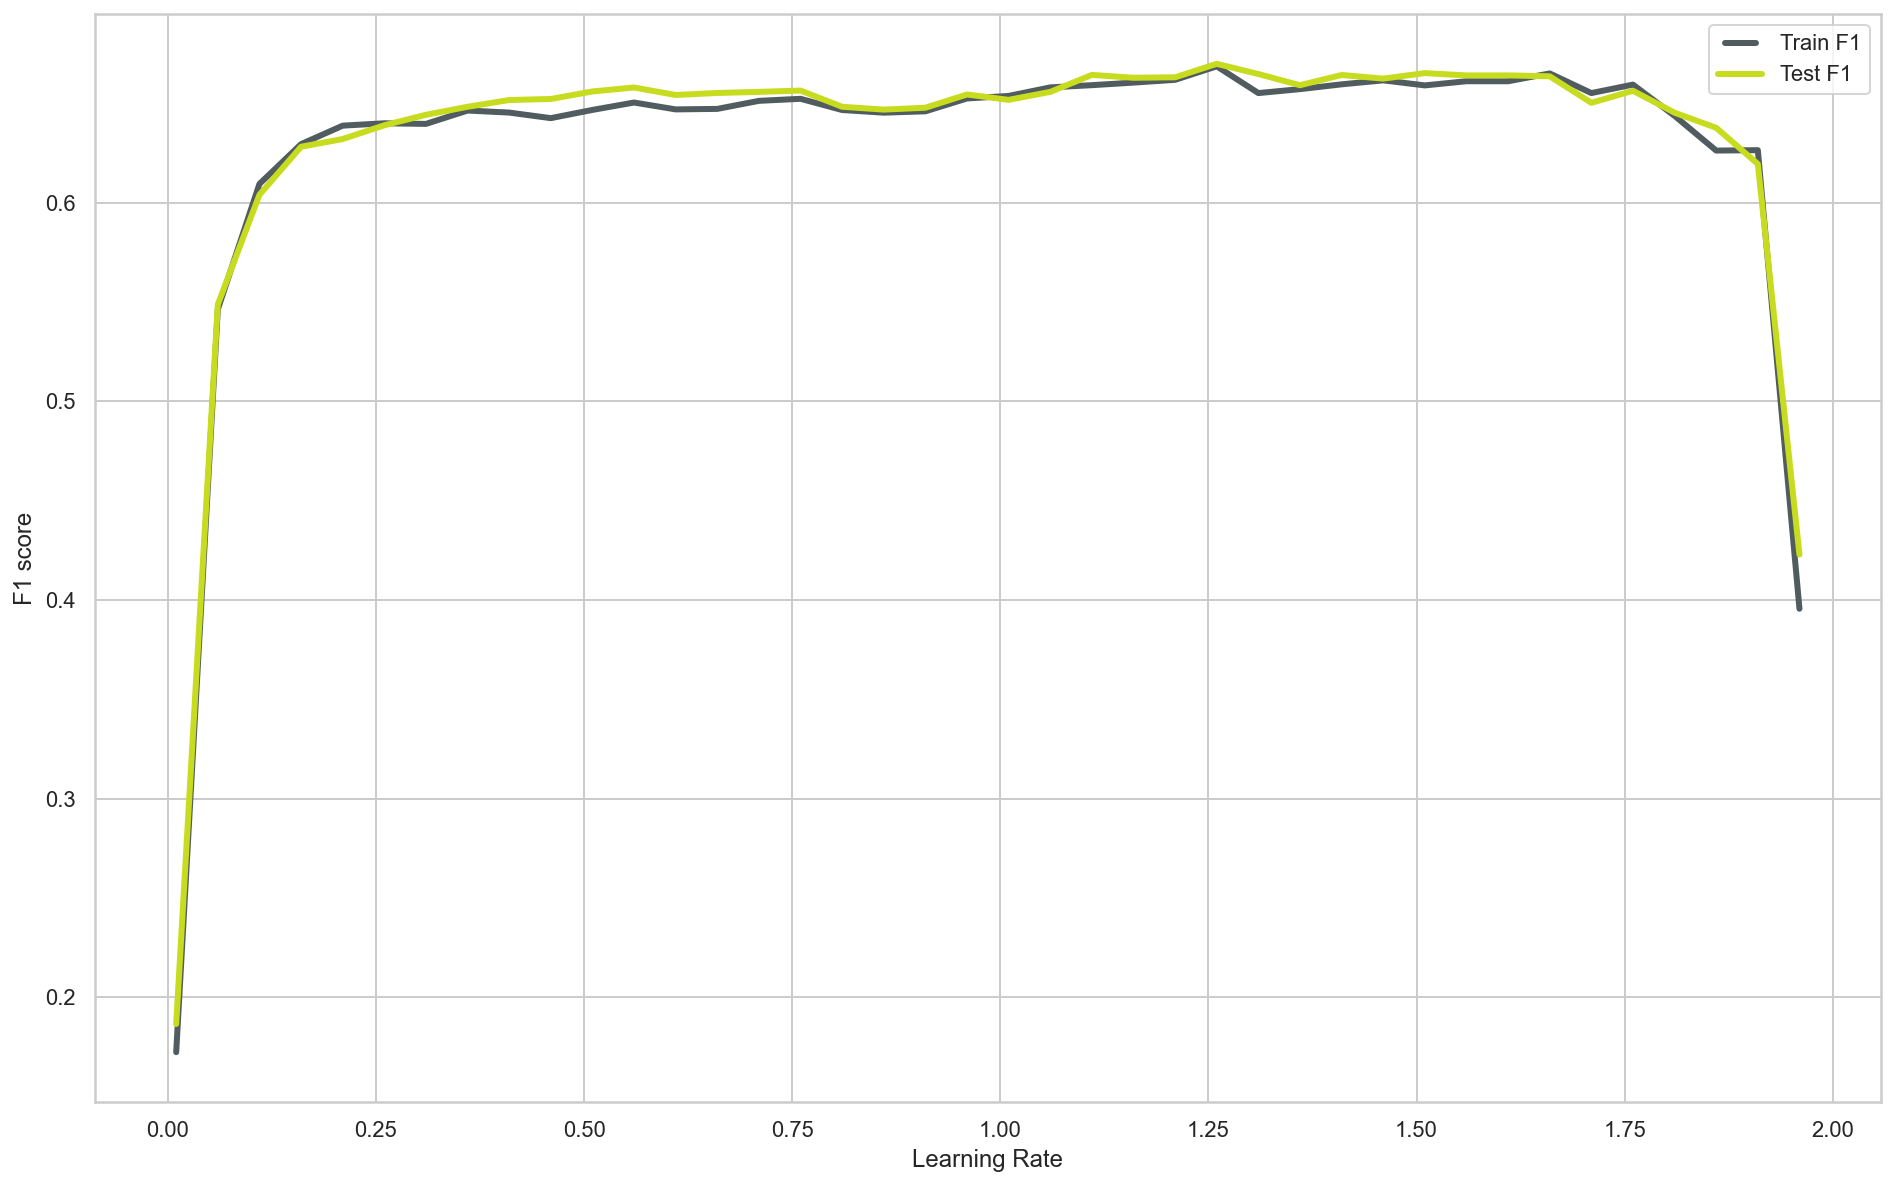

In [158]:
learning_rate = list(np.arange(0.01, 2, 0.05))
calculate_f1(learning_rate, X_train, X_val, y_train, y_val,'Learning Rate')

In [170]:
# AdaBoost = AdaBoostClassifier()

# AdaBoost_parameters = {'base_estimator' : [None, modelNB, modelQDA_final, pac_1, modelLDA_final],
#                         'n_estimators' : list(range(1,100)),
#                         'learning_rate' : np.arange(0.5, 1.5, 0.05),
#                         'algorithm' : ['SAMME', 'SAMME.R']}

# AdaBoost_grid = GridSearchCV(estimator=AdaBoost, param_grid=AdaBoost_parameters, 
#                               scoring='accuracy', verbose=1, n_jobs=-1)

# AdaBoost_grid.fit(X_train , y_train)
# AdaBoost_grid.best_params_

Fitting 5 folds for each of 19800 candidates, totalling 99000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.2000000000000006,
 'n_estimators': 98}

In [182]:
# Best AdaBoost based on the grid search
modelAdaBoost = AdaBoostClassifier(base_estimator=None, n_estimators=98, learning_rate=1.2, algorithm='SAMME.R', random_state=5)
modelAdaBoost.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1.2, n_estimators=98, random_state=5)

In [183]:
labels_train = modelAdaBoost.predict(X_train)
accuracy_score(y_train, labels_train)

0.8597576530612245

In [184]:
labels_val = modelAdaBoost.predict(X_val)
accuracy_score(y_val, labels_val)

0.8607142857142858

In [260]:
df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Raw'])
show_results_1(df, modelAdaBoost)

Time       Train    Validation
Raw  0.882+/-0.04  0.86+/-0.0  0.859+/-0.01

In [177]:
# Check the metrics on the best AdaBoost 
metrics(y_train, labels_train, y_val, labels_val)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11962
           1       0.77      0.59      0.67      3718

    accuracy                           0.86     15680
   macro avg       0.82      0.77      0.79     15680
weighted avg       0.85      0.86      0.85     15680

[[11297   665]
 [ 1534  2184]]
__________________________+_________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5127
           1       0.77   

### Gradient Boosting Classifier

In [190]:
# Function to analyze the best parameter definitions
def calculate_f1_2(interval, x_train, x_val, y_train, y_val, parameter):
    train_results = []
    val_results = []
    for value in interval:
        if parameter == 'Number of estimators':
            dt = GradientBoostingClassifier(n_estimators = value, random_state = 5)
        elif parameter == 'Learning Rate':
            dt = GradientBoostingClassifier(learning_rate = value, random_state = 5)
        dt.fit(x_train, y_train)
        train_results.append(f1_score(y_train,dt.predict(x_train)))
        val_results.append(f1_score(y_val,dt.predict(x_val)))
    value_train = train_results.index(max(train_results))
    value_val = val_results.index(max(val_results))
    print('The best train value is ',interval[value_train])
    print('The best val value is ',interval[value_val])

    fig = plt.figure(figsize = (16,10))
    line1, = plt.plot(interval, train_results, '#515C60', label="Train F1", linewidth=3,color='peru')
    line2, = plt.plot(interval, val_results, '#C7DC1F', label="Val F1", linewidth=3,color='b')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel("F1 score")
    plt.xlabel(str(parameter))
    plt.show()

The best train value is  1.1
The best val value is  0.7500000000000001


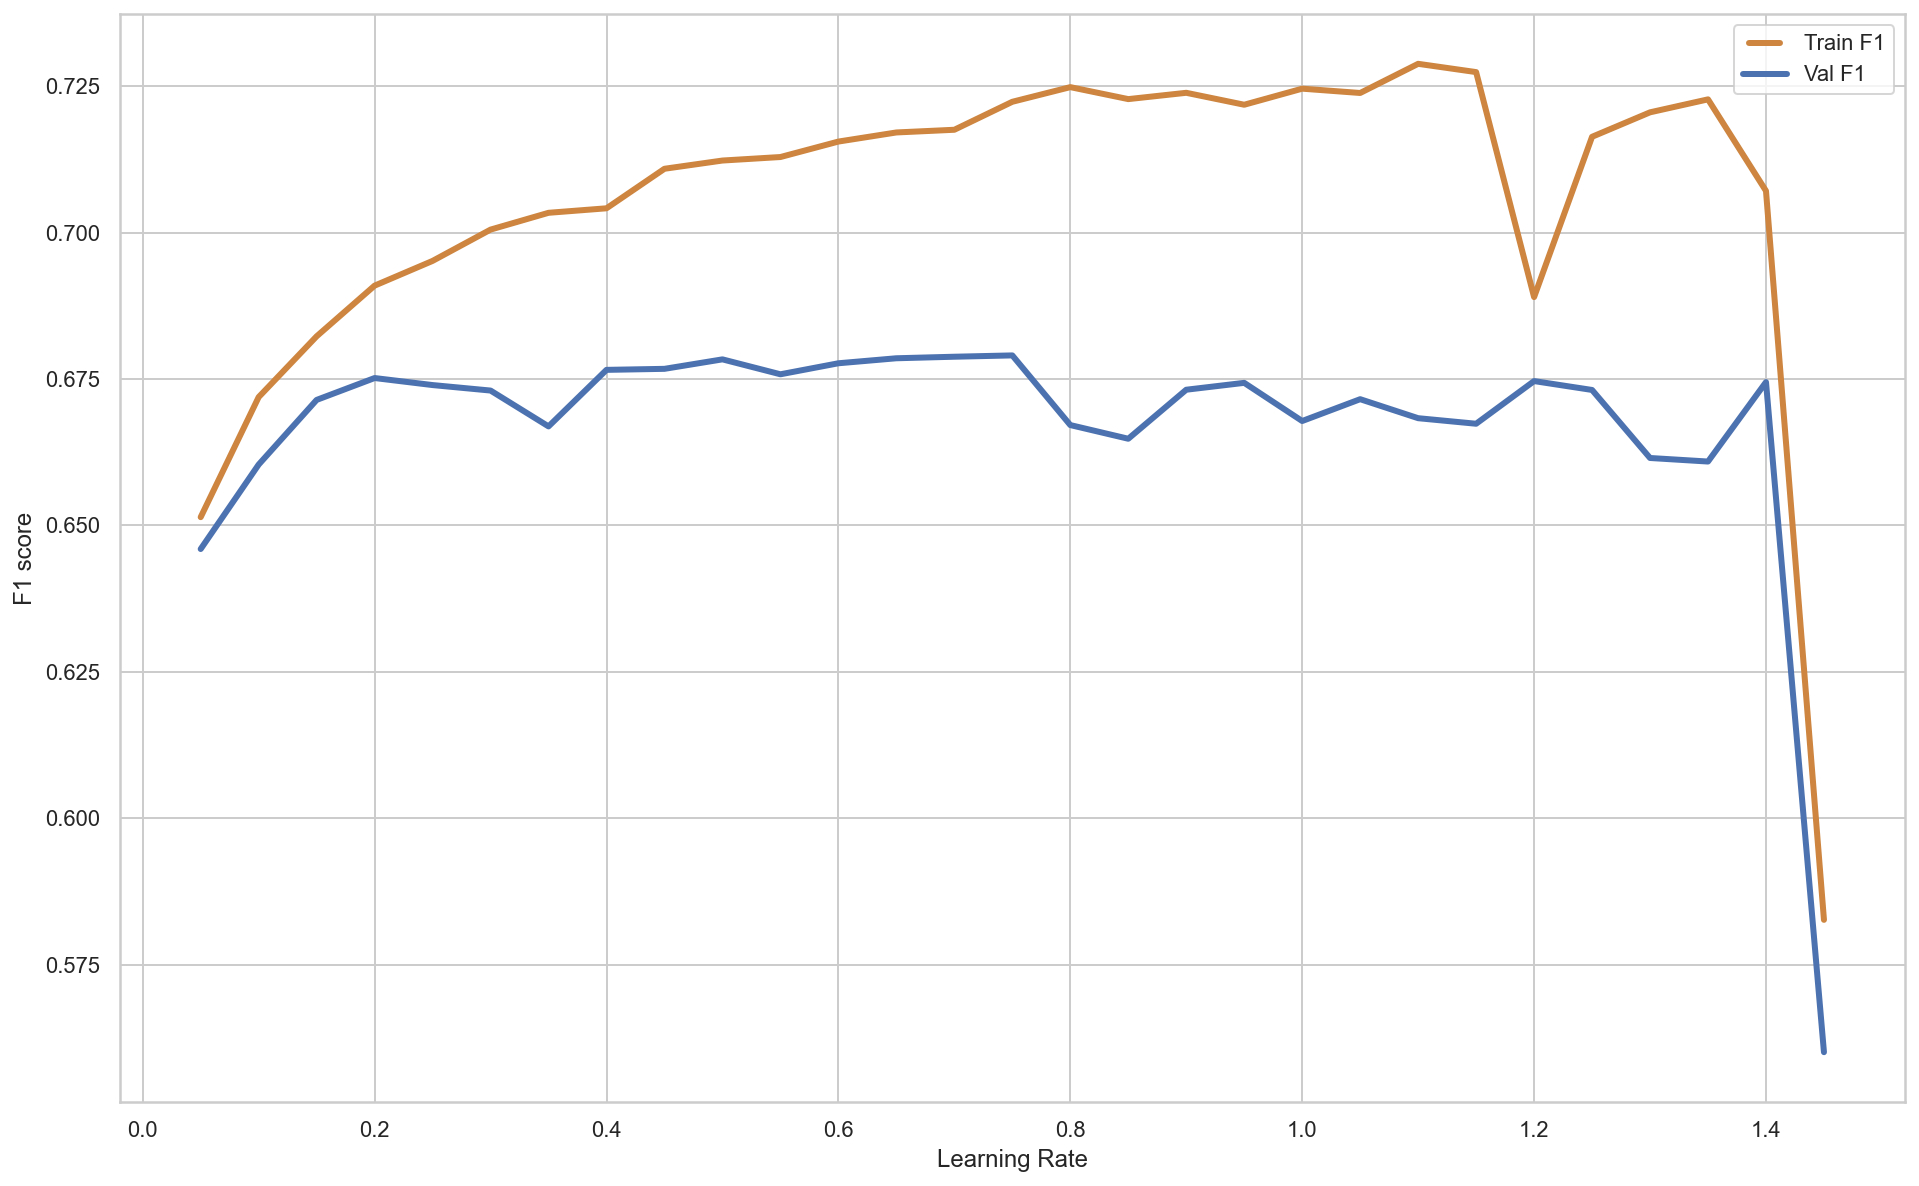

In [191]:
learning_rate = list(np.arange(0.05, 1.5, 0.05))
calculate_f1_2(learning_rate, X_train, X_val, y_train, y_val,'Learning Rate')

The best train value is  0.8
The best val value is  0.7500000000000001


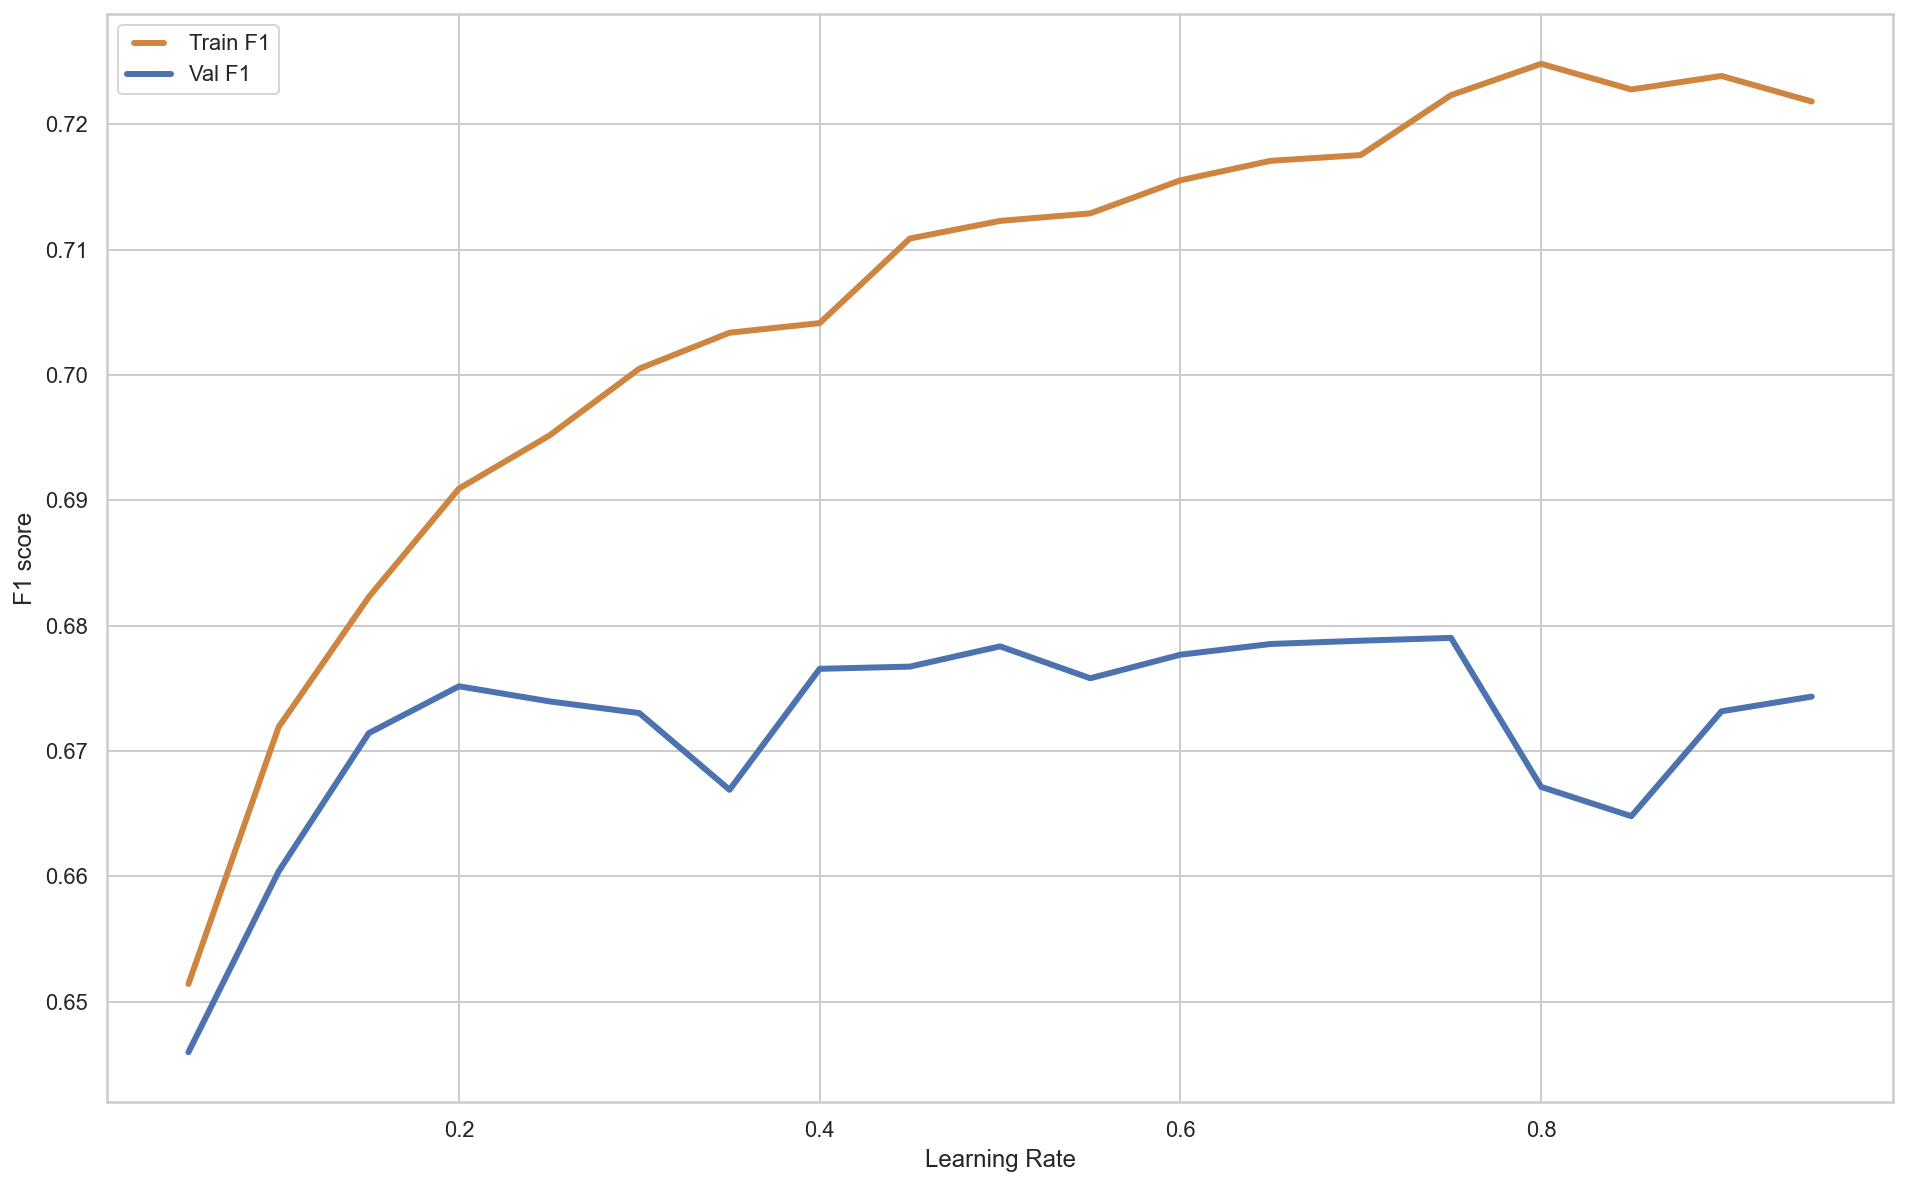

In [198]:
learning_rate = list(np.arange(0.05, 1, 0.05))
calculate_f1_2(learning_rate, X_train, X_val, y_train, y_val,'Learning Rate')

The best train value is  1.1000000000000003
The best val value is  1.5500000000000007


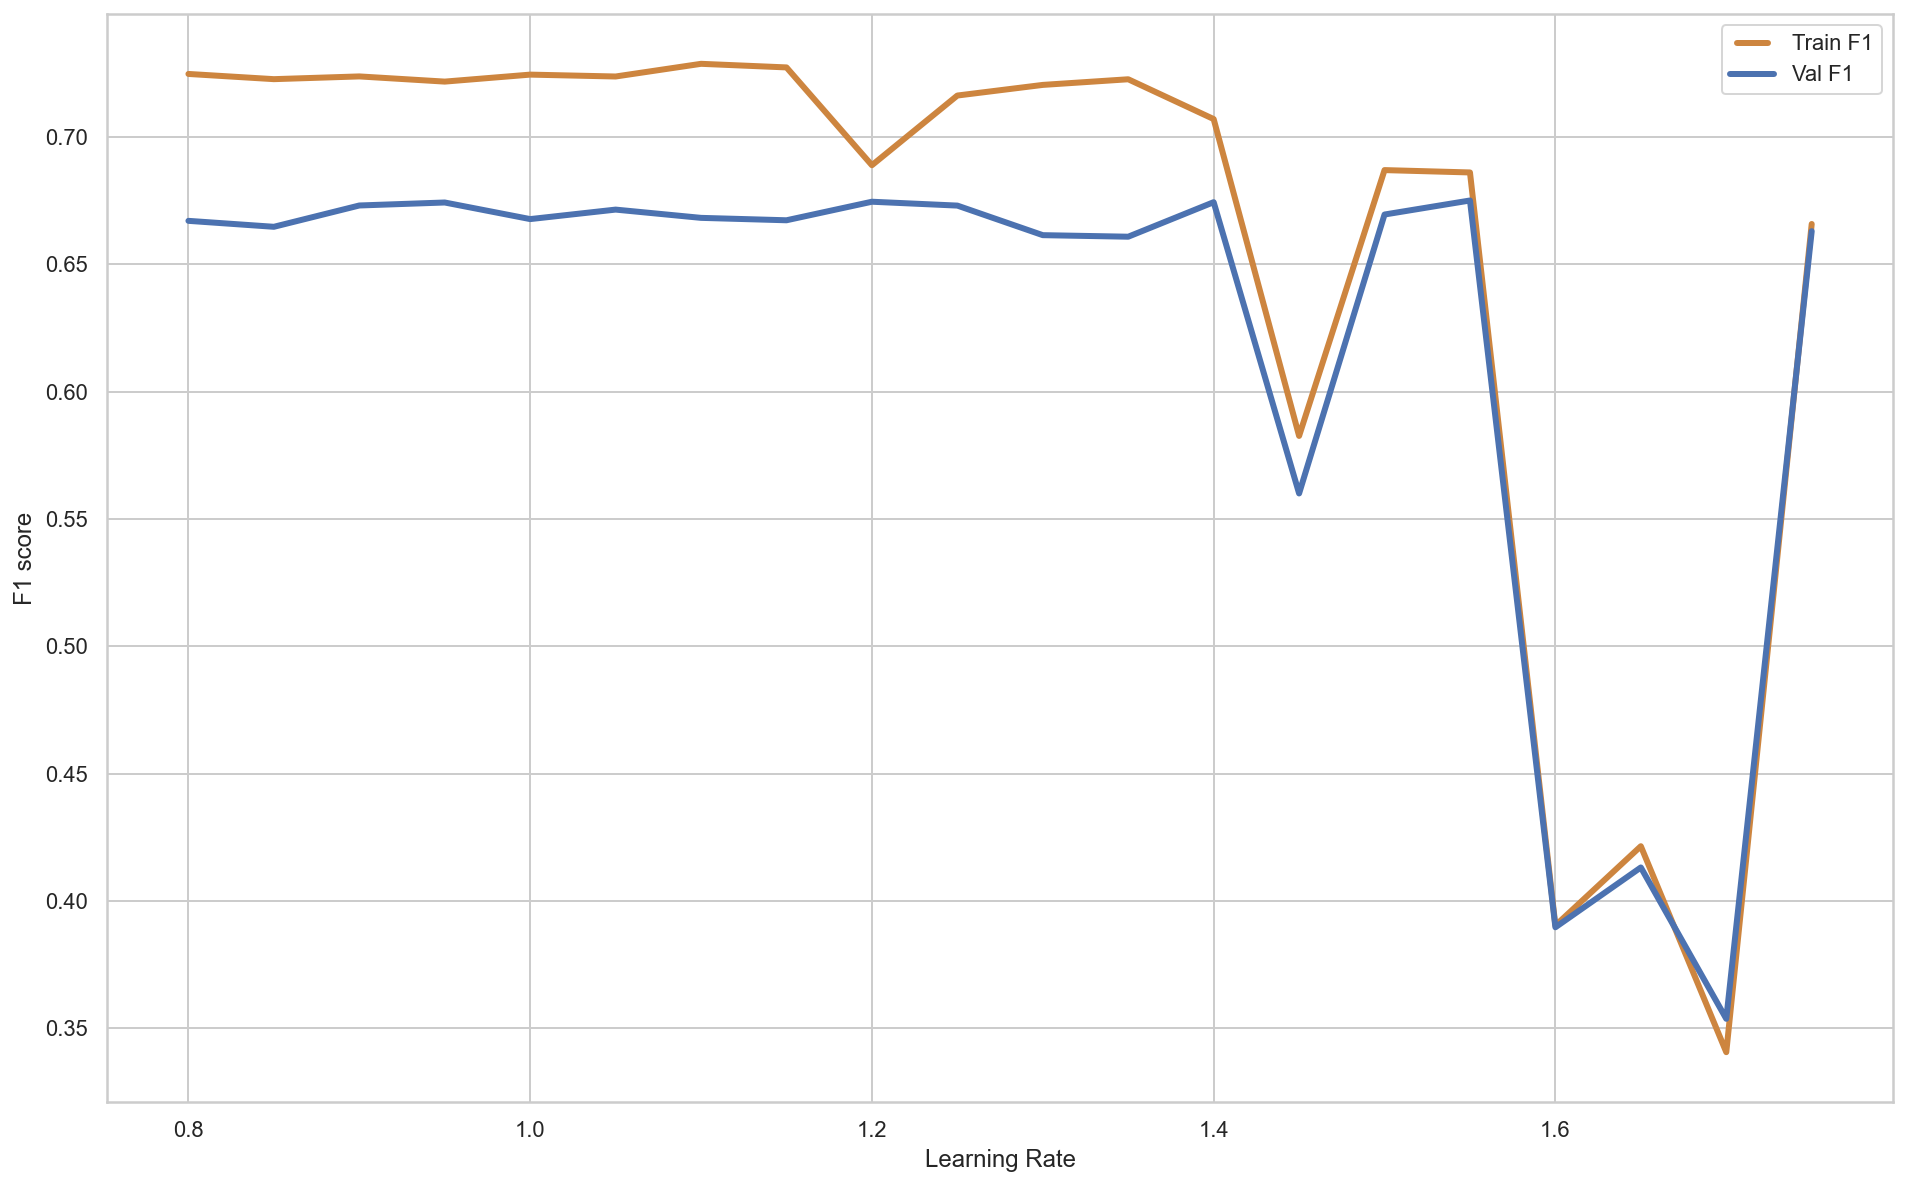

In [203]:
learning_rate = list(np.arange(0.8, 1.8, 0.05))
calculate_f1_2(learning_rate, X_train, X_val, y_train, y_val,'Learning Rate')

The best train value is  191
The best val value is  191


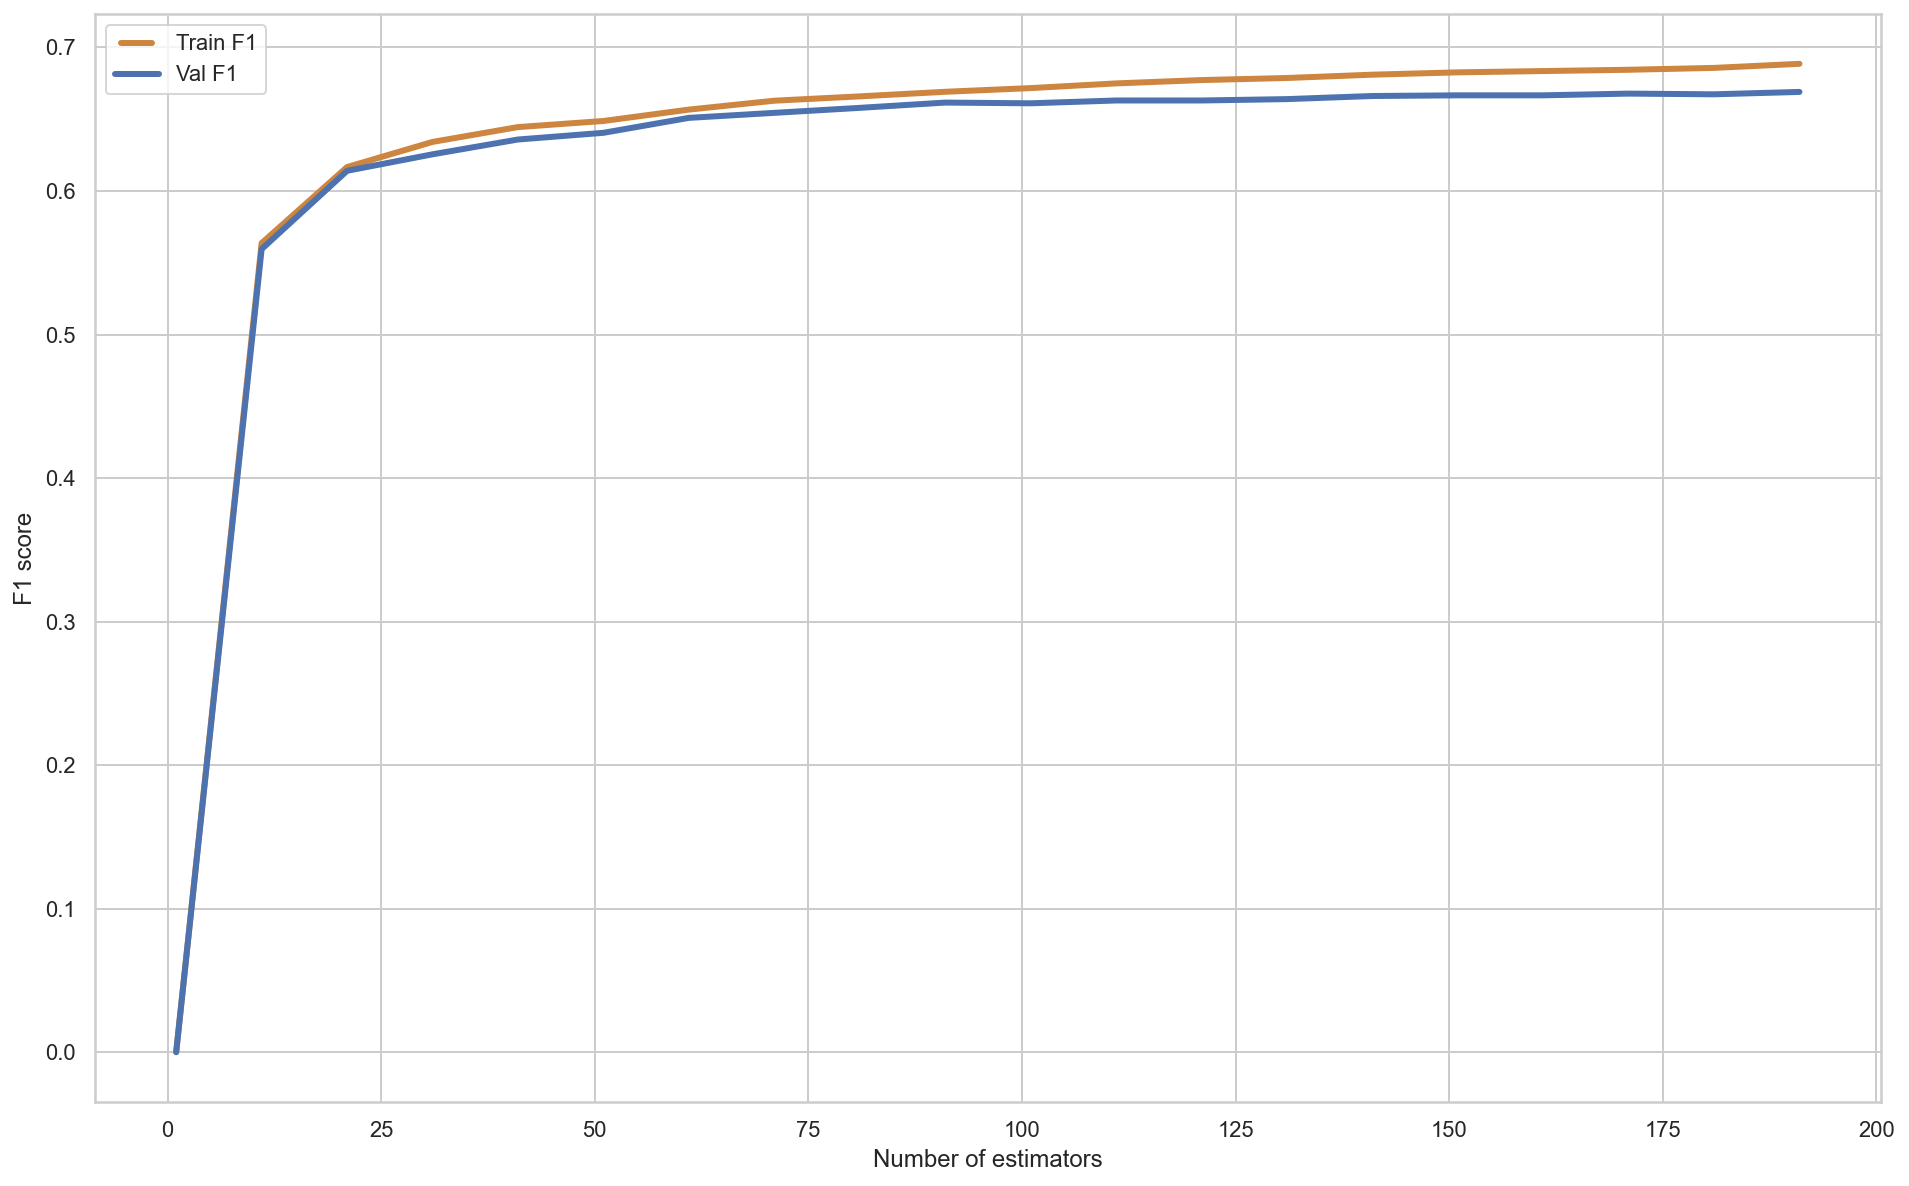

In [206]:
num_estimators = list(np.arange(1, 200, 10)) 
calculate_f1_2(num_estimators, X_train, X_val, y_train, y_val,'Number of estimators')

In [196]:
modelGBauto = GradientBoostingClassifier(max_features='auto', random_state=5)
modelGBlog = GradientBoostingClassifier(max_features='log2',random_state=5)
modelGBsqrt = GradientBoostingClassifier(max_features='sqrt',random_state=5)
modelGBnone = GradientBoostingClassifier(max_features=None,random_state=5)

In [197]:
df= pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Auto','Log2','Sqrt','None/Raw'])
show_results_1(df, modelGBauto, modelGBlog, modelGBsqrt, modelGBnone)

Time        Train    Validation
Auto      1.321+/-0.05  0.864+/-0.0   0.86+/-0.01
Log2      0.638+/-0.02  0.861+/-0.0  0.857+/-0.01
Sqrt      0.636+/-0.01  0.861+/-0.0  0.857+/-0.01
None/Raw  1.355+/-0.07  0.864+/-0.0   0.86+/-0.01

In [199]:
modelGBdev = GradientBoostingClassifier(loss='deviance', random_state=5)
modelGBexp = GradientBoostingClassifier(loss='exponential',random_state=5)

In [200]:
df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['deviance','exponential'])
show_results_1(df, modelGBdev, modelGBexp)

Time        Train   Validation
deviance      1.426+/-0.1  0.864+/-0.0  0.86+/-0.01
exponential  1.466+/-0.09  0.863+/-0.0  0.86+/-0.01

In [207]:
modelGB2 = GradientBoostingClassifier(max_depth=2, random_state=5)
modelGB3 = GradientBoostingClassifier(max_depth=3,random_state=5)
modelGB10 = GradientBoostingClassifier(max_depth=10,random_state=5)
modelGB30 = GradientBoostingClassifier(max_depth=30,random_state=5)
modelGB50 = GradientBoostingClassifier(max_depth=50,random_state=5)

In [208]:
df= pd.DataFrame(columns = ['Time','Train','Validation'], index = ['model2','model3','model10','model30','model50'])
show_results_1(df, modelGB2, modelGB3,modelGB10,modelGB30,modelGB50)

Time        Train    Validation
model2    0.996+/-0.04  0.859+/-0.0  0.857+/-0.01
model3    1.277+/-0.01  0.864+/-0.0   0.86+/-0.01
model10   5.767+/-0.17  0.922+/-0.0  0.852+/-0.01
model30  25.803+/-0.36   0.94+/-0.0  0.827+/-0.01
model50  25.752+/-0.35   0.94+/-0.0  0.828+/-0.01

In [210]:
# GB_clf = GradientBoostingClassifier()

# GB_parameters = {'loss' : [ 'exponential'],
#                    'learning_rate' : np.arange(1.0, 1.6, 0.05),
#                    'n_estimators' : np.arange(150, 200, 5),
#                    'max_depth' : np.arange(2, 10, 1),
#                    'max_features' : ['log2', None]
#                 }

# GB_grid = GridSearchCV(estimator=GB_clf, param_grid=GB_parameters, scoring='accuracy', verbose=1, n_jobs=-1)
# GB_grid.fit(X_train , y_train)
# GB_grid.best_params_

Fitting 5 folds for each of 2080 candidates, totalling 10400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 300.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 317.5min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 335.1min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 354.1min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 379.3min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 399.1min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 425.9min
[Parallel(n_jobs=-1)]: Done 10400 out o

{'learning_rate': 1.0,
 'loss': 'exponential',
 'max_depth': 2,
 'max_features': 'log2',
 'n_estimators': 170}

In [325]:
# Best GB
modelGB = GradientBoostingClassifier(learning_rate=1.0, loss='exponential', max_depth=2, max_features='log2',
                                     n_estimators=170, random_state=5)
modelGB.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, loss='exponential', max_depth=2,
                           max_features='log2', n_estimators=170,
                           random_state=5)

In [326]:
labels_train = modelGB.predict(X_train)
accuracy_score(y_train, labels_train)

0.8677295918367347

In [327]:
labels_val = modelGB.predict(X_val)
accuracy_score(y_val, labels_val)

0.8639880952380953

In [328]:
# Check f1-score micro
f1_score(y_val, labels_val, average='micro')

0.8639880952380953

In [214]:
df = pd.DataFrame(columns = ['Time','Train','Validation'], index = ['Raw'])
show_results_1(df, modelGB)

Time        Train    Validation
Raw  1.16+/-0.15  0.868+/-0.0  0.862+/-0.01

In [215]:
# Check metrics on the best GB
metrics(y_train, labels_train, y_val, labels_val)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     11962
           1       0.77      0.63      0.69      3718

    accuracy                           0.87     15680
   macro avg       0.83      0.79      0.80     15680
weighted avg       0.86      0.87      0.86     15680

[[11263   699]
 [ 1375  2343]]
__________________________+_________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5127
           1       0.76   

**Code to make the predictions on the Test dataset (modelGB was the best model):**

In [335]:
# min_max_scaler = preprocessing.MinMaxScaler()
# metric_scaled = min_max_scaler.fit_transform(test.values)
# test = pd.DataFrame(metric_scaled, columns=test.columns, index=test.index)

In [330]:
# Citizen=df_test['CITIZEN_ID']
# labels_test= modelGB.predict(test)
# prediction=pd.concat([Citizen, pd.DataFrame(labels_test)],axis=1)
# prediction['Income']=prediction[0]
# prediction.drop(columns=0,inplace=True)

In [332]:
# prediction.to_csv(r'PATH\pred.csv',index=False, header=True,sep=',')

### Voting Classifier

In [185]:
# Group of the best models on the Notebook
estimator = []
estimator.append(('GradientBoosting', GradientBoostingClassifier(learning_rate=1.0, loss='exponential', max_depth=2, 
                                                                 max_features='log2', n_estimators=170, random_state=5)))
estimator.append(('AdaBoost', AdaBoostClassifier(base_estimator=None, n_estimators=98, learning_rate=1.2, 
                                                algorithm='SAMME.R', random_state=5)))
estimator.append(('Decision Tree', DecisionTreeClassifier(ccp_alpha=0.000159, random_state=42)))
estimator.append(('Random Forest', RandomForestClassifier(ccp_alpha=0.000159, random_state=42)))
estimator.append(('SVM', SVC(C=750, shrinking=False, probability=True))) # Probability is True because it's needed for
                                                                         # the soft voting

In [183]:
# Voting Classifier with hard voting (default)
voting_hard = VotingClassifier(estimators=estimator, n_jobs=-1) 
voting_hard.fit(X_train, y_train) 
y_pred_hard = voting_hard.predict(X_val)

In [186]:
# Voting Classifier with soft voting 
voting_soft = VotingClassifier(estimators=estimator, n_jobs=-1, voting='soft') 
voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_val)

In [187]:
# Accuracy for hard voting
print("train score:", voting_hard.score(X_train, y_train))
print("validation score:", voting_hard.score(X_val, y_val))

train score: 0.8682397959183673
validation score: 0.8620535714285714


In [188]:
# Accuracy for soft voting
print("train score:", voting_soft.score(X_train, y_train))
print("validation score:", voting_soft.score(X_val, y_val))

train score: 0.870344387755102
validation score: 0.8633928571428572


In [196]:
# Metrics for hard voting
labels_train = voting_hard.predict(X_train)
metrics(y_train, labels_train, y_val, y_pred_hard)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11962
           1       0.76      0.58      0.66      3718

    accuracy                           0.86     15680
   macro avg       0.82      0.76      0.78     15680
weighted avg       0.85      0.86      0.85     15680

[[11299   663]
 [ 1568  2150]]
__________________________+_________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5127
           1       0.76   

In [197]:
# Metrics for soft voting
labels_train = voting_soft.predict(X_train)
metrics(y_train, labels_train, y_val, y_pred_soft)

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     11962
           1       0.80      0.55      0.65      3718

    accuracy                           0.86     15680
   macro avg       0.84      0.76      0.78     15680
weighted avg       0.86      0.86      0.85     15680

[[11458   504]
 [ 1664  2054]]
__________________________+_________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5127
           1       0.80   